In [1]:
import pandas as pd
import re
import datetime
import pytz
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import json

jaeha = pd.read_csv('jaeha.csv')
jiwoo = pd.read_csv('jiwoo.csv')
dongho = pd.read_csv('dongho.csv')
youngjoo = pd.read_csv('youngjoo.csv')

jaeha_stroop = pd.read_csv('BMAI_Stroop_score_Dataset - Jaeha.csv')
jiwoo_stroop = pd.read_csv('BMAI_Stroop_score_Dataset - Jiwoo.csv')
dongho_stroop = pd.read_csv('BMAI_Stroop_score_Dataset - Dongho.csv')
youngjoo_stroop = pd.read_csv('BMAI_Stroop_score_Dataset - Youngjoo.csv')

C:\Users\613ja\AppData\Local\Temp\ipykernel_35184\76896247.py:9: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  jaeha = pd.read_csv('jaeha.csv')


In [2]:

def process_plot(data,i=0,newrow=''):
  HR = data[data['Key']=='heart_rate'].reset_index(drop=True)
  # 'Value' 열에서 'bpm' 값 추출 함수
  def extract_bpm(value):
      match = re.search(r'"bpm":(\d+)', value)
      if match:
          return int(match.group(1))
      else:
          return None

  # 'bpm' 열 생성
  HR['bpm'] = HR['Value'].apply(extract_bpm)
  HR['HR_Time_KST'] = pd.to_datetime(HR['Time'], unit='s')

  # 한국 시간대로 변환 (Asia/Seoul)
  HR['HR_Time_KST'] = HR['HR_Time_KST'].dt.tz_localize('UTC').dt.tz_convert('Asia/Seoul')

  HR['bpm_z'] = (HR['bpm'] - HR['bpm'].mean()) / HR['bpm'].std()
  #print(HR['bpm_z'])
  df = HR[['HR_Time_KST','bpm','bpm_z']]
  print(df.head())

  plt.figure(figsize=(20, 6))
  # 그래프 그리기
  plt.plot(df['HR_Time_KST'], df['bpm_z'])

  # x축 레이블 설정
  plt.xlabel('Time (KST)')

  # y축 레이블 설정
  plt.ylabel('BPM')

  # 그래프 제목 설정
  plt.title('Heart Rate Over Time')

  plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # interval=1 for 1-day intervals
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

  plt.gcf().autofmt_xdate()  # Auto-format x-axis date labels for better readability
  # 그래프 표시
  plt.show()

  SR = data[data['Key']=='stress'].reset_index(drop=True)
  # 'Value' 열에서 'bpm' 값 추출 함수
  def extract_stress(value):
      match = re.search(r'"stress":(\d+)', value)
      if match:
          return int(match.group(1))
      else:
          return None

  # 'bpm' 열 생성
  SR['stress'] = SR['Value'].apply(extract_stress)
  SR['Stress_Time_KST'] = pd.to_datetime(SR['Time'], unit='s')

  # 한국 시간대로 변환 (Asia/Seoul)
  SR['Stress_Time_KST'] = SR['Stress_Time_KST'].dt.tz_localize('UTC').dt.tz_convert('Asia/Seoul')

  SR['stress_z'] = (SR['stress'] - SR['stress'].mean()) / SR['stress'].std()
  #print(HR['bpm_z'])

  df = pd.concat((SR[['stress','Stress_Time_KST','stress_z']],df),axis=1)

  print(df.head())

  plt.figure(figsize=(20, 6))
  # 그래프 그리기
  plt.plot(SR['Stress_Time_KST'], SR['stress_z'])

  # x축 레이블 설정
  plt.xlabel('Time (KST)')

  # y축 레이블 설정
  plt.ylabel('Stress')

  # 그래프 제목 설정
  plt.title('Stress Score Over Time')

  plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # interval=1 for 1-day intervals
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

  plt.gcf().autofmt_xdate()  # Auto-format x-axis date labels for better readability
  # 그래프 표시
  plt.show()

  SLP = data[data['Key']=='sleep'].reset_index(drop=True)
  SLP = SLP[SLP['Value'].str.contains('"duration"', na=False)].reset_index(drop=True)
  # 'Value' 열에서 'bpm' 값 추출 함수
  def extract_time(value):
    try:
      data = json.loads(value)
      return data.get('device_wake_up_time')
    except (json.JSONDecodeError, TypeError):
      return None
  def extract_duration(value):
    try:
      data = json.loads(value)
      return data.get('duration')
    except (json.JSONDecodeError, TypeError):
      return None

  # 'Time' 열 생성
  SLP['Duration'] = SLP['Value'].apply(extract_duration)


  # 'bpm' 열 생성
  SLP['Sleep_Time_KST'] = pd.to_datetime(SLP['Time'], unit='s')

  # 한국 시간대로 변환 (Asia/Seoul)
  SLP['Sleep_Time_KST'] = SLP['Sleep_Time_KST'].dt.tz_localize('UTC').dt.tz_convert('Asia/Seoul')
  if i==1:
    SLP = pd.concat([SLP, newrow], ignore_index=True)
    SLP = SLP.sort_values(by='Sleep_Time_KST').reset_index(drop=True)


  SLP['Duration_z'] = (SLP['Duration'] - SLP['Duration'].mean()) / SLP['Duration'].std()
  #print(HR['bpm_z'])

  #print(SLP[-10:])
  print(SLP[-8:])

  df = pd.concat((SLP[['Sleep_Time_KST','Duration','Duration_z']],df),axis=1)
  print(df.head())
  plt.figure(figsize=(20, 6))
  # 그래프 그리기
  plt.plot(SLP['Sleep_Time_KST'], SLP['Duration_z'])

  # x축 레이블 설정
  plt.xlabel('Time (KST)')

  # y축 레이블 설정
  plt.ylabel('Sleep Duration')

  # 그래프 제목 설정
  plt.title('Sleep Duration Over Time')

  plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # interval=1 for 1-day intervals
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

  plt.gcf().autofmt_xdate()  # Auto-format x-axis date labels for better readability
  # 그래프 표시
  plt.show()

  SPO = data[data['Key']=='spo2'].reset_index(drop=True)
  # 'Value' 열에서 'bpm' 값 추출 함수
  def extract_spo2(value):
      match = re.search(r'"spo2":(\d+)', value)
      if match:
          return int(match.group(1))
      else:
          return None

  # 'bpm' 열 생성
  SPO['spo2'] = SPO['Value'].apply(extract_spo2)
  SPO['Spo2_Time_KST'] = pd.to_datetime(SPO['Time'], unit='s')

  # 한국 시간대로 변환 (Asia/Seoul)
  SPO['Spo2_Time_KST'] = SPO['Spo2_Time_KST'].dt.tz_localize('UTC').dt.tz_convert('Asia/Seoul')

  SPO['spo2_z'] = (SPO['spo2'] - SPO['spo2'].mean()) / SPO['spo2'].std()

  df = pd.concat((SPO[['spo2','Spo2_Time_KST','spo2_z']],df),axis=1)

  print(df.head())

  plt.figure(figsize=(20, 6))
  # 그래프 그리기
  plt.plot(SPO['Spo2_Time_KST'], SPO['spo2_z'])

  # x축 레이블 설정
  plt.xlabel('Time (KST)')

  # y축 레이블 설정
  plt.ylabel('SPO2')

  # 그래프 제목 설정
  plt.title('SPO2 Over Time')

  plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # interval=1 for 1-day intervals
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

  plt.gcf().autofmt_xdate()  # Auto-format x-axis date labels for better readability
  # 그래프 표시
  plt.show()

  return df

                HR_Time_KST  bpm     bpm_z
0 2025-05-07 17:38:00+09:00   87  0.841916
1 2025-05-07 17:37:00+09:00   90  1.025439
2 2025-05-07 17:36:00+09:00   89  0.964265
3 2025-05-07 17:35:00+09:00   89  0.964265
4 2025-05-07 17:34:00+09:00   88  0.903090


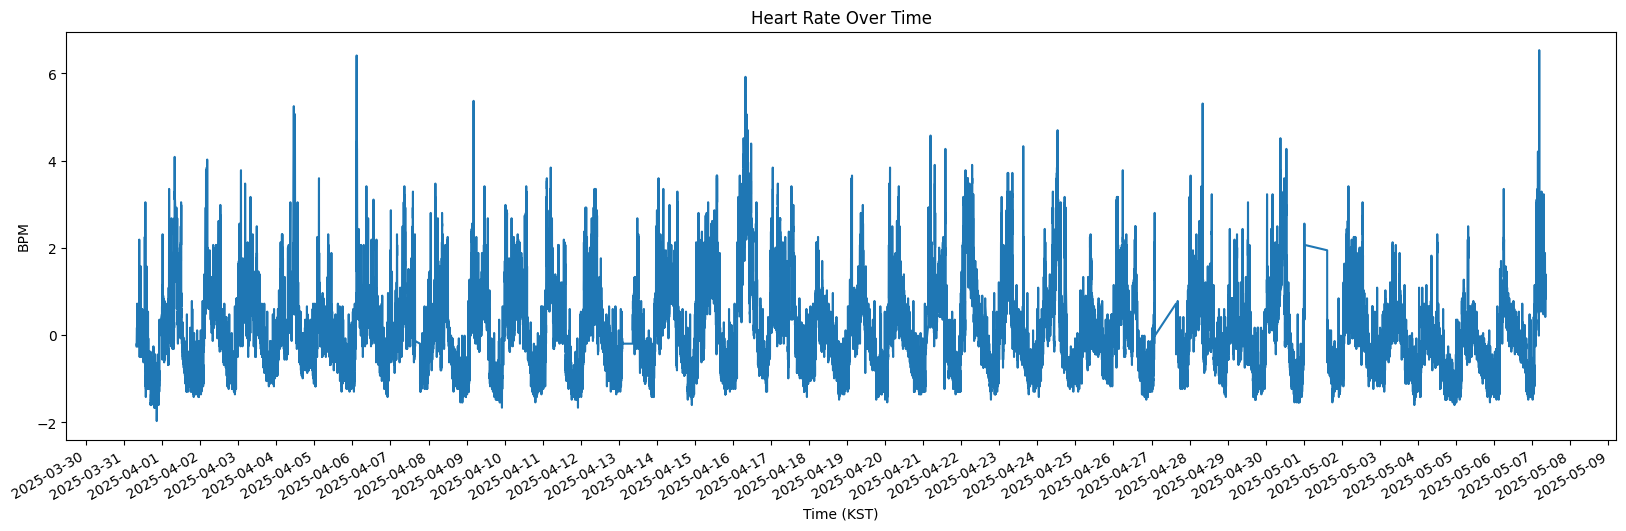

   stress           Stress_Time_KST  stress_z               HR_Time_KST  bpm  \
0    34.0 2025-05-07 17:31:00+09:00  0.825226 2025-05-07 17:38:00+09:00   87   
1    34.0 2025-05-07 17:06:00+09:00  0.825226 2025-05-07 17:37:00+09:00   90   
2    34.0 2025-05-07 16:56:00+09:00  0.825226 2025-05-07 17:36:00+09:00   89   
3    38.0 2025-05-07 16:51:00+09:00  1.228402 2025-05-07 17:35:00+09:00   89   
4    36.0 2025-05-07 16:26:00+09:00  1.026814 2025-05-07 17:34:00+09:00   88   

      bpm_z  
0  0.841916  
1  1.025439  
2  0.964265  
3  0.964265  
4  0.903090  


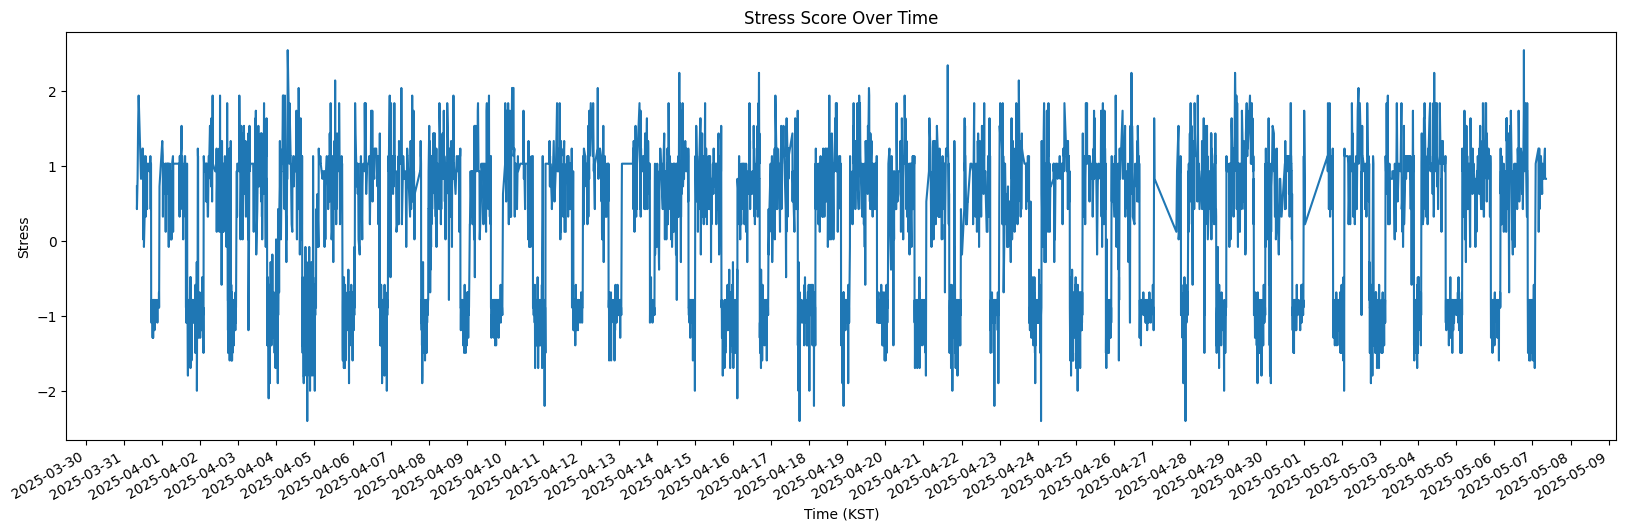

           Uid        Sid    Key        Time  \
33  6796308952  895472774  sleep  1743978000   
34  6796308952  895472774  sleep  1743902400   
35  6796308952  895472774  sleep  1743814860   
36  6796308952  895472774  sleep  1743728520   
37  6796308952  895472774  sleep  1743661920   
38  6796308952  895472774  sleep  1743633720   
39  6796308952  895472774  sleep  1743559500   
40  6796308952  895472774  sleep  1743459060   

                                                Value  UpdateTime  Duration  \
33  {"avg_breath":15,"avg_hr":61,"avg_spo2":97,"be...  1743981689       354   
34  {"avg_breath":15,"avg_hr":60,"avg_spo2":98,"be...  1743907621       493   
35  {"avg_breath":15,"avg_hr":65,"avg_spo2":97,"be...  1743818535       540   
36  {"avg_breath":15,"avg_hr":61,"avg_spo2":97,"be...  1743732197       436   
37  {"bedtime":1743660420,"sleep_deep_duration":0,...  1743665599        25   
38  {"avg_breath":15,"avg_hr":58,"avg_spo2":97,"be...  1743637383       323   
39  {"avg_brea

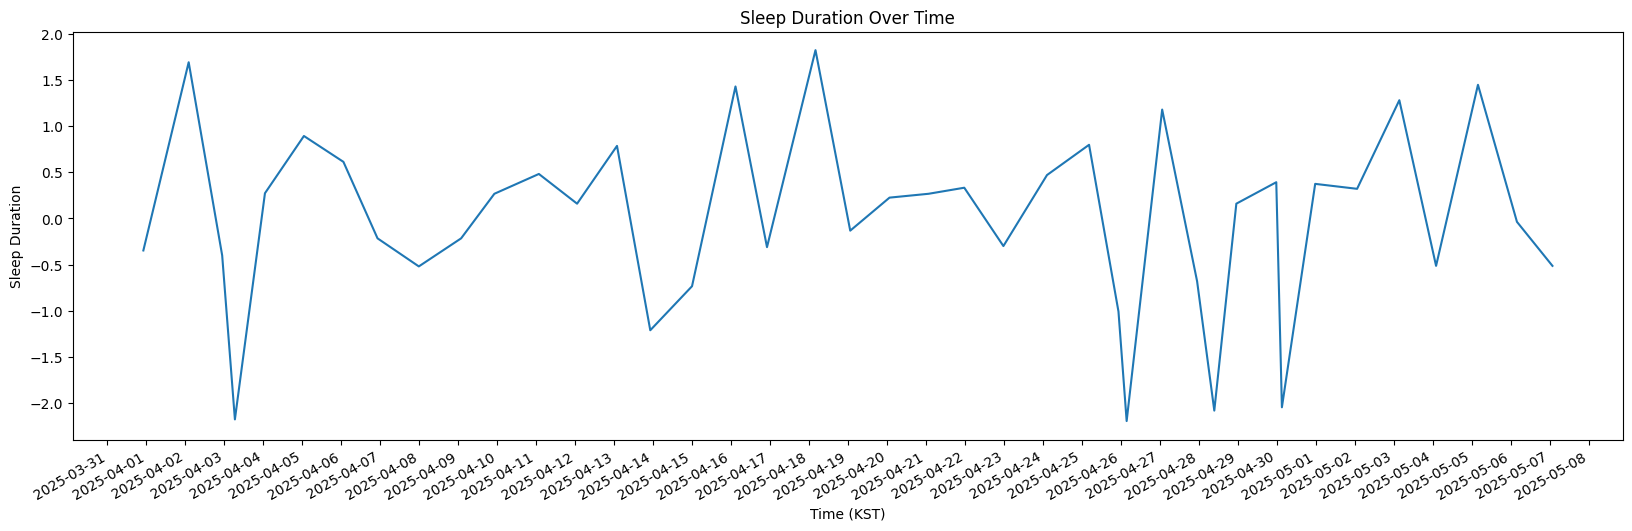

   spo2             Spo2_Time_KST    spo2_z            Sleep_Time_KST  \
0  98.0 2025-05-07 17:31:00+09:00  0.534642 2025-05-07 10:33:00+09:00   
1  96.0 2025-05-07 17:22:00+09:00 -0.881257 2025-05-06 12:42:00+09:00   
2  98.0 2025-05-07 17:11:00+09:00  0.534642 2025-05-05 12:42:00+09:00   
3  97.0 2025-05-07 17:02:00+09:00 -0.173307 2025-05-04 10:55:00+09:00   
4  95.0 2025-05-07 16:51:00+09:00 -1.589206 2025-05-03 12:18:00+09:00   

   Duration  Duration_z  stress           Stress_Time_KST  stress_z  \
0     304.0   -0.514407    34.0 2025-05-07 17:31:00+09:00  0.825226   
1     384.0   -0.037512    34.0 2025-05-07 17:06:00+09:00  0.825226   
2     633.0    1.446824    34.0 2025-05-07 16:56:00+09:00  0.825226   
3     304.0   -0.514407    38.0 2025-05-07 16:51:00+09:00  1.228402   
4     605.0    1.279911    36.0 2025-05-07 16:26:00+09:00  1.026814   

                HR_Time_KST  bpm     bpm_z  
0 2025-05-07 17:38:00+09:00   87  0.841916  
1 2025-05-07 17:37:00+09:00   90  1.025439  

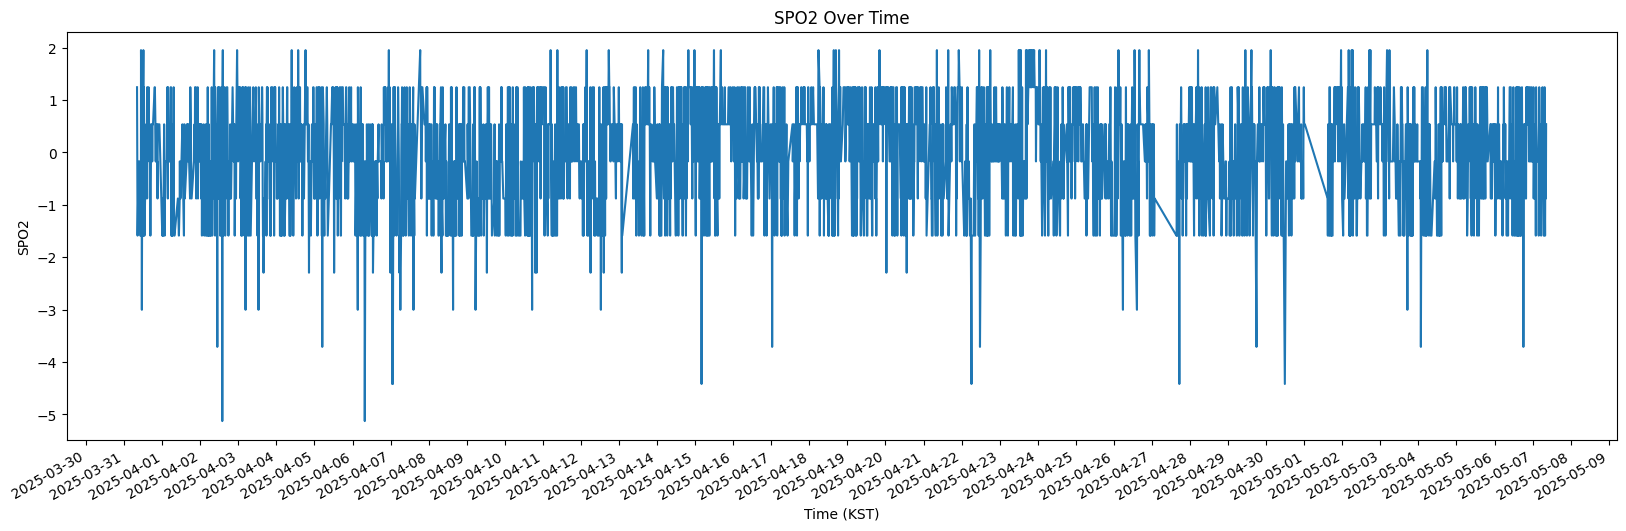

                HR_Time_KST  bpm     bpm_z
0 2025-05-06 22:31:00+09:00   77  0.414151
1 2025-05-06 22:30:00+09:00   77  0.414151
2 2025-05-06 22:29:00+09:00   79  0.541649
3 2025-05-06 22:28:00+09:00   77  0.414151
4 2025-05-06 22:27:00+09:00   81  0.669148


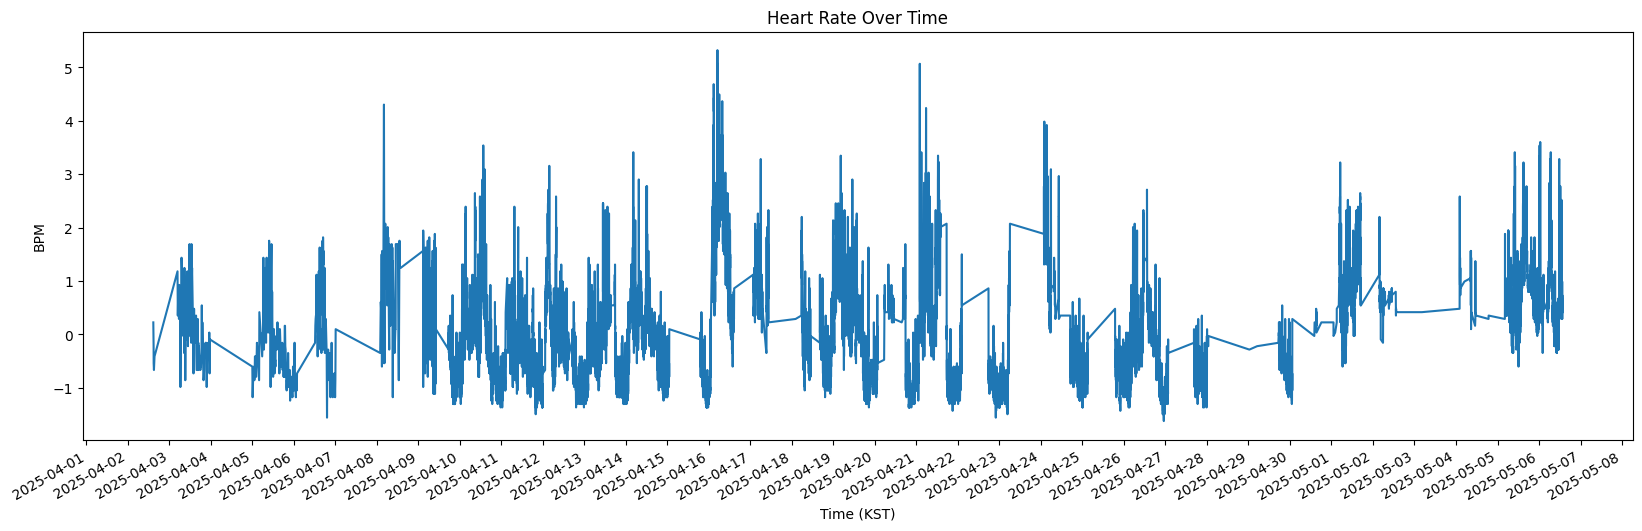

   stress           Stress_Time_KST  stress_z               HR_Time_KST  bpm  \
0    34.0 2025-05-06 22:31:00+09:00  1.084409 2025-05-06 22:31:00+09:00   77   
1    24.0 2025-05-06 22:26:00+09:00  0.037049 2025-05-06 22:30:00+09:00   77   
2    33.0 2025-05-06 22:21:00+09:00  0.979673 2025-05-06 22:29:00+09:00   79   
3    35.0 2025-05-06 22:16:00+09:00  1.189145 2025-05-06 22:28:00+09:00   77   
4    44.0 2025-05-06 22:11:00+09:00  2.131769 2025-05-06 22:27:00+09:00   81   

      bpm_z  
0  0.414151  
1  0.414151  
2  0.541649  
3  0.414151  
4  0.669148  


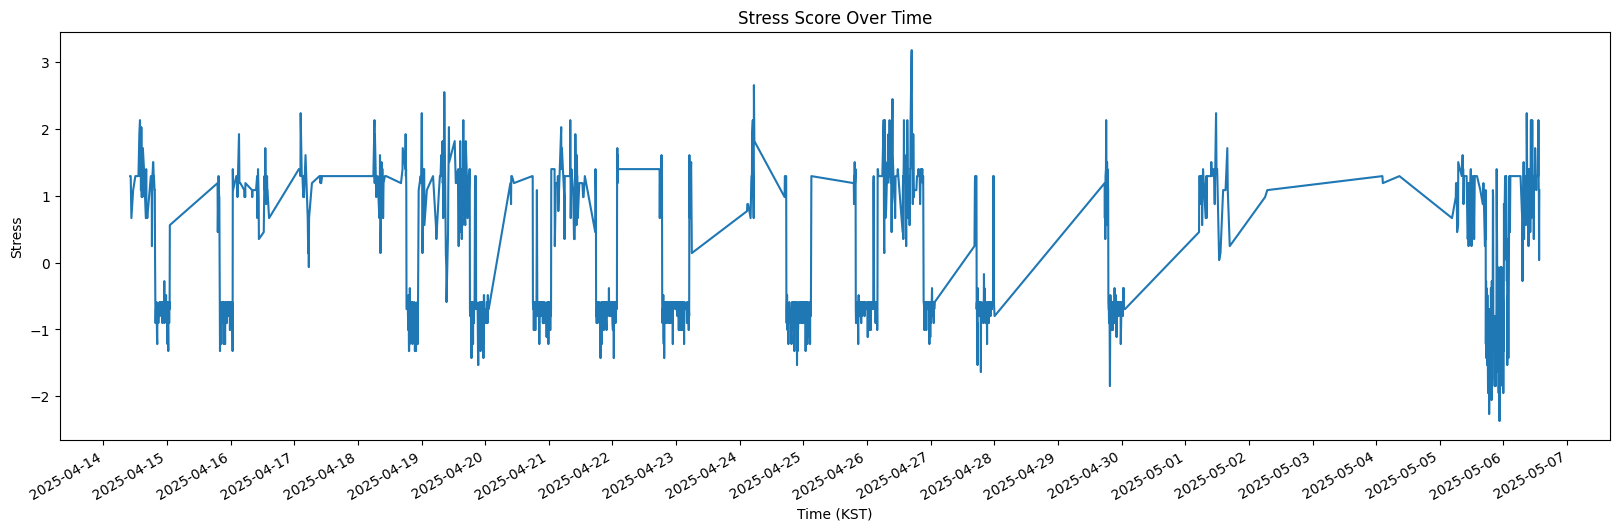

           Uid        Sid    Key        Time  \
16  6796731568  895600714  sleep  1744434780   
17  6796731568  895600714  sleep  1744416060   
18  6796731568  895600714  sleep  1744338180   
19  6796731568  895600714  sleep  1744247640   
20  6796731568  912339081  sleep  1743984780   
21  6796731568  912339081  sleep  1743904920   
22  6796731568  912339081  sleep  1743821400   
23  6796731568  912339081  sleep  1743723300   

                                                Value  UpdateTime  Duration  \
16  {"timezone":36,"max_hr":76,"wake_up_time":1744...  1744445930        28   
17  {"avg_hr":54,"items":[{"end_time":1744401960,"...  1744419723       237   
18  {"avg_breath":17,"timezone":36,"min_spo2":92,"...  1744341844       561   
19  {"min_hr":50,"sleep_deep_duration":144,"min_sp...  1744251319       434   
20  {"breath_quality":97,"avg_hr":58,"min_spo2":92...  1744184473       333   
21  {"wake_up_time":1743904920,"has_rem":true,"tim...  1744184473       389   
22  {"bedtime"

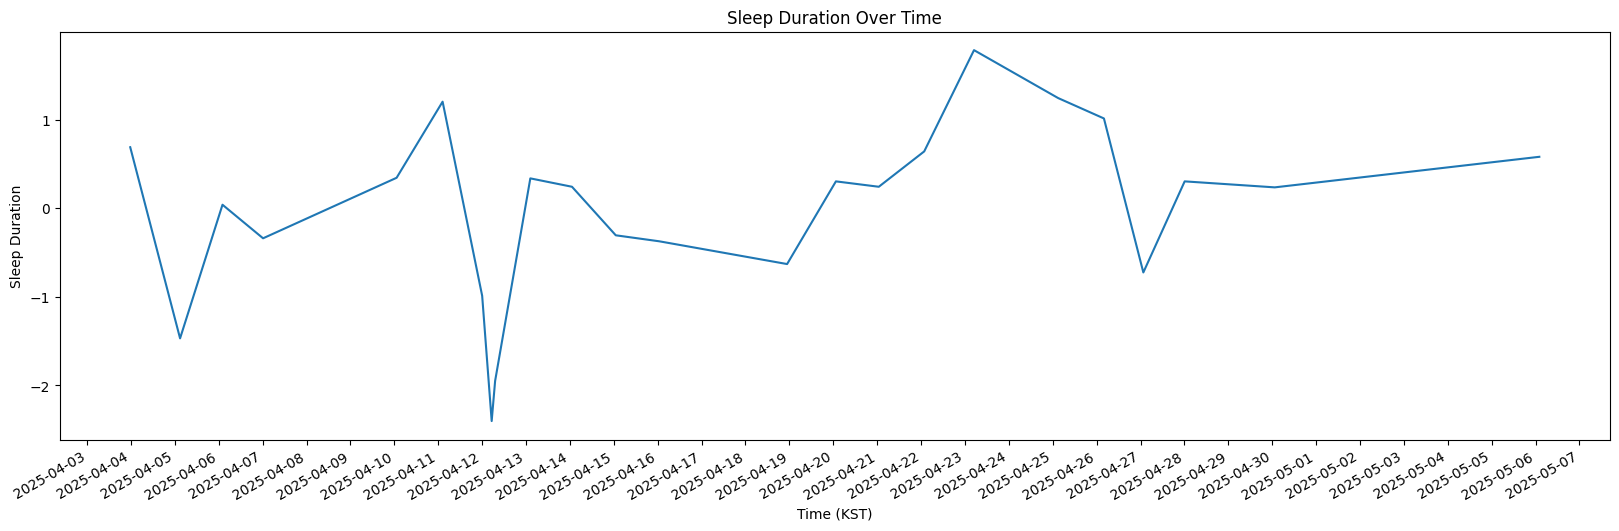

   spo2             Spo2_Time_KST    spo2_z            Sleep_Time_KST  \
0  95.0 2025-05-06 22:26:00+09:00 -0.421072 2025-05-06 11:03:00+09:00   
1  96.0 2025-05-06 22:17:00+09:00  0.041541 2025-04-30 10:23:00+09:00   
2  96.0 2025-05-06 22:08:00+09:00  0.041541 2025-04-28 09:08:00+09:00   
3  97.0 2025-05-06 21:08:00+09:00  0.504154 2025-04-27 10:32:00+09:00   
4  95.0 2025-05-06 20:52:00+09:00 -0.421072 2025-04-26 12:59:00+09:00   

   Duration  Duration_z  stress           Stress_Time_KST  stress_z  \
0     469.0    0.579805    34.0 2025-05-06 22:31:00+09:00  1.084409   
1     418.0    0.234797    24.0 2025-05-06 22:26:00+09:00  0.037049   
2     428.0    0.302446    33.0 2025-05-06 22:21:00+09:00  0.979673   
3     276.0   -0.725814    35.0 2025-05-06 22:16:00+09:00  1.189145   
4     533.0    1.012757    44.0 2025-05-06 22:11:00+09:00  2.131769   

                HR_Time_KST  bpm     bpm_z  
0 2025-05-06 22:31:00+09:00   77  0.414151  
1 2025-05-06 22:30:00+09:00   77  0.414151  

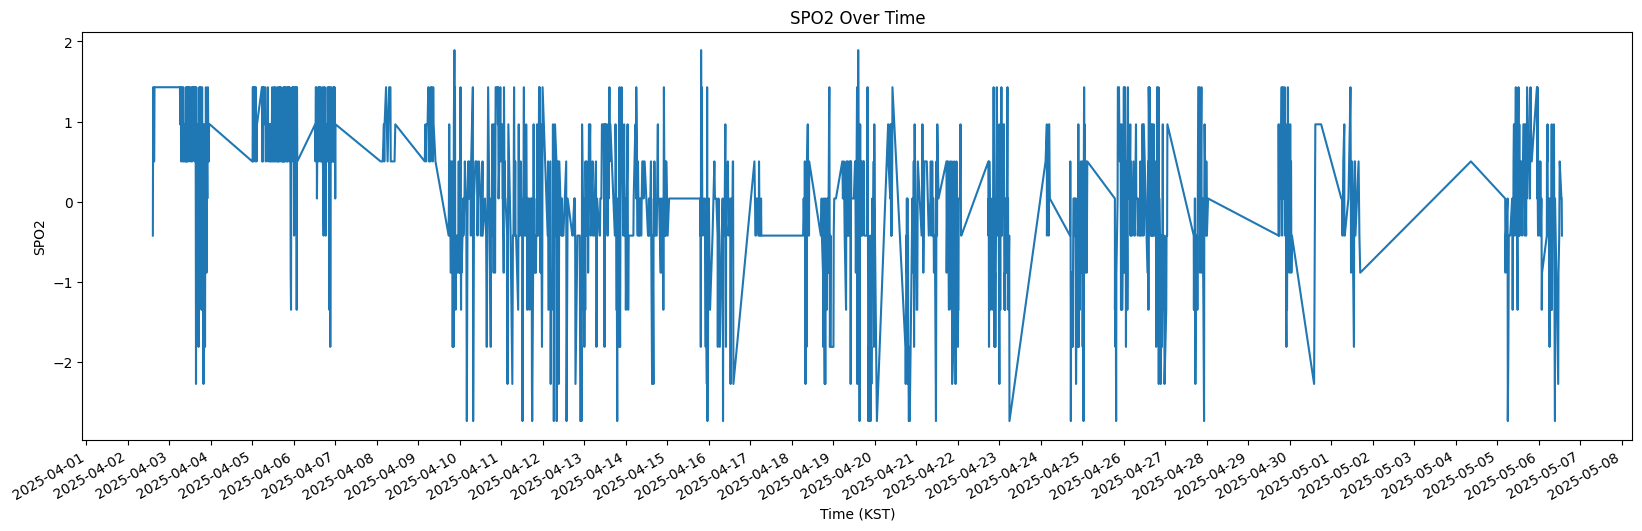

                HR_Time_KST  bpm     bpm_z
0 2025-05-05 13:14:00+09:00   66 -0.533971
1 2025-05-05 13:13:00+09:00   65 -0.592417
2 2025-05-05 13:12:00+09:00   68 -0.417079
3 2025-05-05 13:11:00+09:00   67 -0.475525
4 2025-05-05 13:10:00+09:00   70 -0.300186


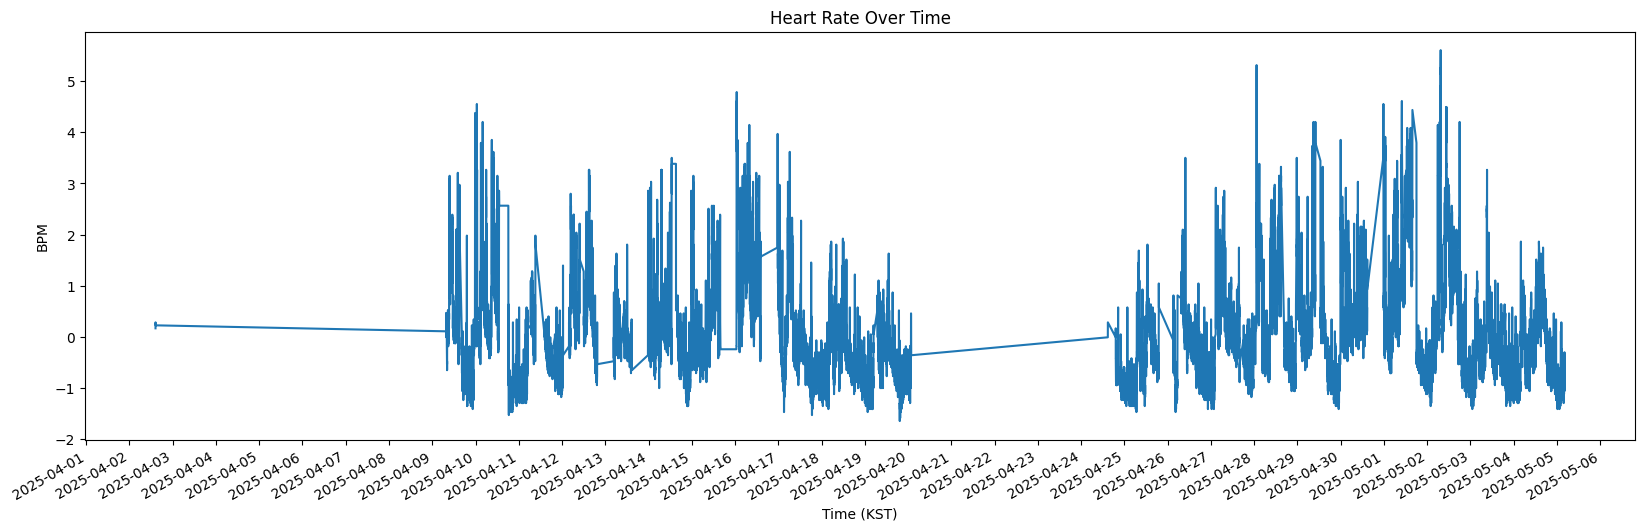

   stress           Stress_Time_KST  stress_z               HR_Time_KST  bpm  \
0    13.0 2025-05-05 13:10:00+09:00 -1.271870 2025-05-05 13:14:00+09:00   66   
1    17.0 2025-05-05 13:05:00+09:00 -0.882719 2025-05-05 13:13:00+09:00   65   
2    11.0 2025-05-05 13:00:00+09:00 -1.466446 2025-05-05 13:12:00+09:00   68   
3    15.0 2025-05-05 12:55:00+09:00 -1.077295 2025-05-05 13:11:00+09:00   67   
4    17.0 2025-05-05 12:50:00+09:00 -0.882719 2025-05-05 13:10:00+09:00   70   

      bpm_z  
0 -0.533971  
1 -0.592417  
2 -0.417079  
3 -0.475525  
4 -0.300186  


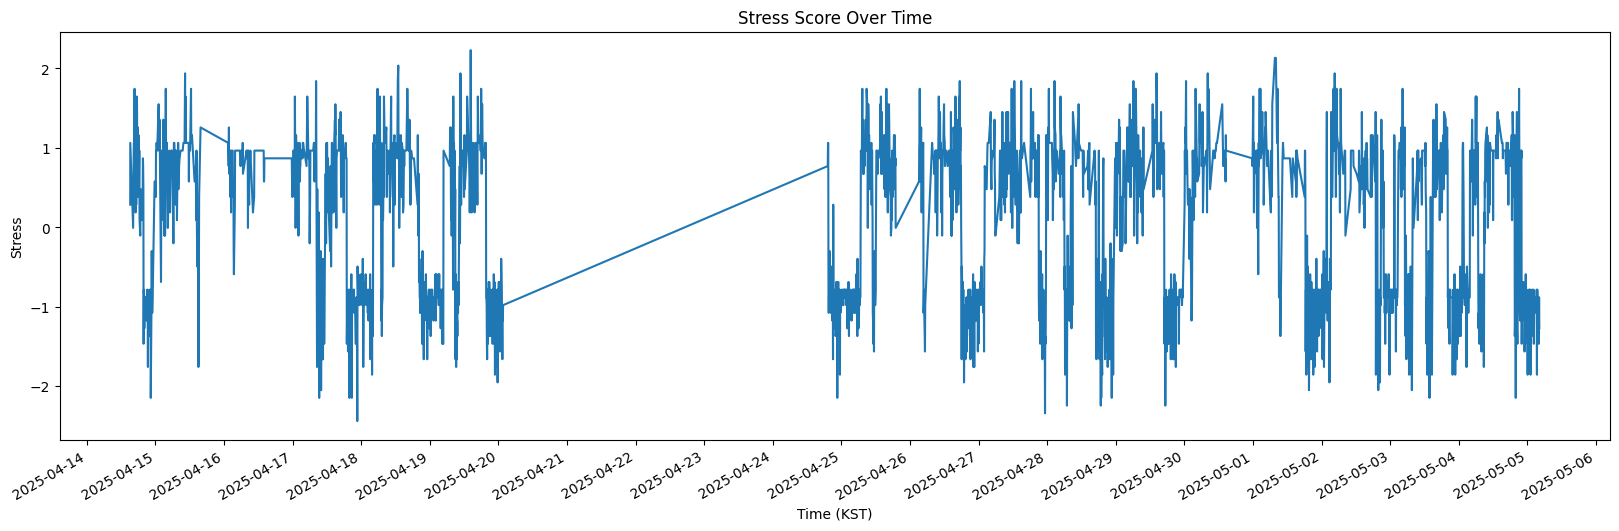

             Uid          Sid    Key          Time  \
34  6.796732e+09  895565443.0  sleep  1.746240e+09   
35  6.796732e+09  895565443.0  sleep  1.746258e+09   
36  6.796732e+09  895565443.0  sleep  1.746283e+09   
37           NaN          NaN    NaN           NaN   
38  6.796732e+09  895565443.0  sleep  1.746331e+09   
39  6.796732e+09  895565443.0  sleep  1.746349e+09   
40           NaN          NaN    NaN           NaN   
41  6.796732e+09  895565443.0  sleep  1.746418e+09   

                                                Value    UpdateTime  Duration  \
34  {"has_stage":true,"bedtime":1746211860,"wake_u...  1.746424e+09       402   
35  {"sleep_deep_duration":0,"device_wake_up_time"...  1.746424e+09       161   
36  {"sleep_rem_duration":0,"sleep_light_duration"...  1.746424e+09       129   
37                                                NaN           NaN       441   
38  {"sleep_light_duration":213,"device_bedtime":1...  1.746424e+09       441   
39  {"has_stage":false,"awa

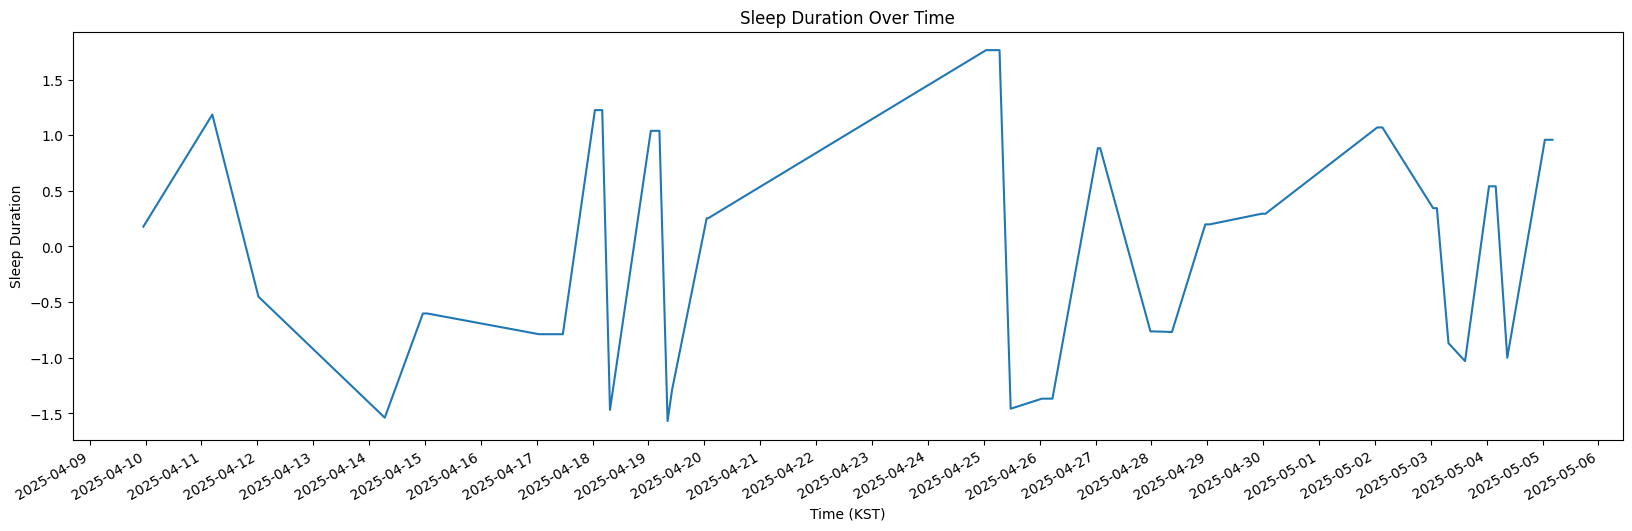

  spo2 Spo2_Time_KST spo2_z            Sleep_Time_KST  Duration  Duration_z  \
0  NaN           NaT    NaN 2025-04-10 08:03:00+09:00     369.0    0.177832   
1  NaN           NaT    NaN 2025-04-11 13:40:00+09:00     569.0    1.185105   
2  NaN           NaT    NaN 2025-04-12 09:29:00+09:00     244.0   -0.451714   
3  NaN           NaT    NaN 2025-04-14 15:44:00+09:00      28.0   -1.539569   
4  NaN           NaT    NaN 2025-04-15 08:07:00+09:00     214.0   -0.602805   

   stress           Stress_Time_KST  stress_z               HR_Time_KST  bpm  \
0    13.0 2025-05-05 13:10:00+09:00 -1.271870 2025-05-05 13:14:00+09:00   66   
1    17.0 2025-05-05 13:05:00+09:00 -0.882719 2025-05-05 13:13:00+09:00   65   
2    11.0 2025-05-05 13:00:00+09:00 -1.466446 2025-05-05 13:12:00+09:00   68   
3    15.0 2025-05-05 12:55:00+09:00 -1.077295 2025-05-05 13:11:00+09:00   67   
4    17.0 2025-05-05 12:50:00+09:00 -0.882719 2025-05-05 13:10:00+09:00   70   

      bpm_z  
0 -0.533971  
1 -0.592417  
2 

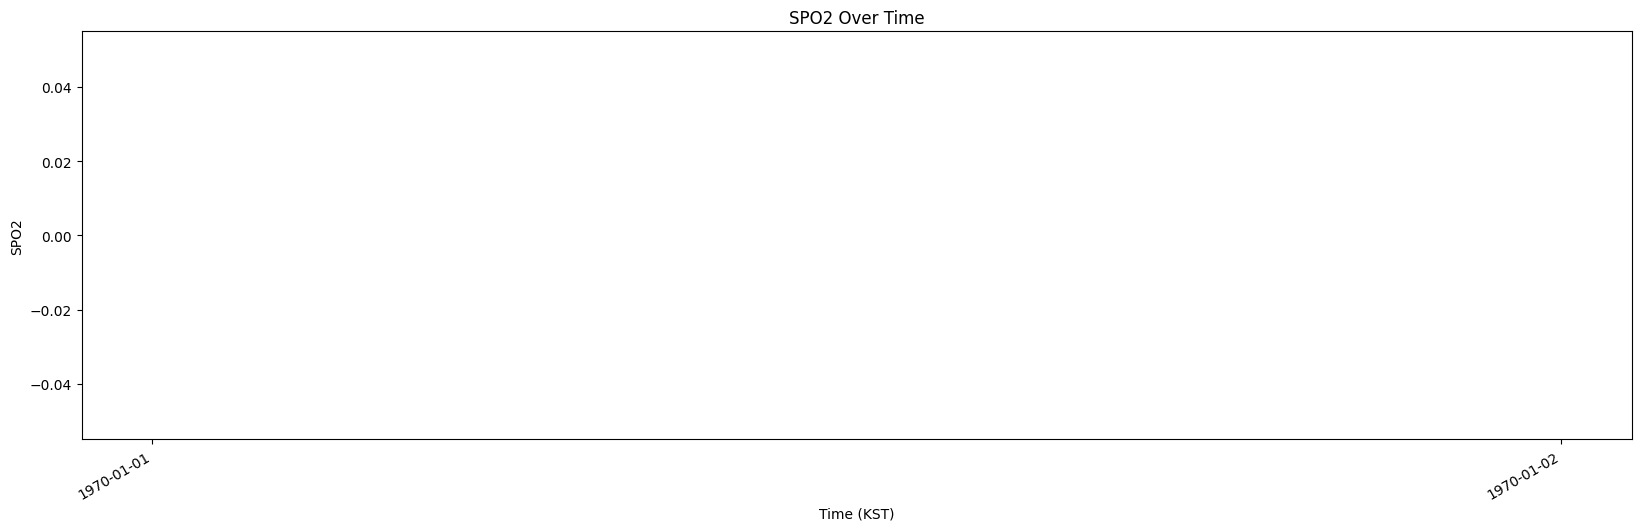

                HR_Time_KST  bpm     bpm_z
0 2025-05-04 22:58:00+09:00   81  0.334232
1 2025-05-04 22:57:00+09:00   85  0.569698
2 2025-05-04 22:56:00+09:00   81  0.334232
3 2025-05-04 22:55:00+09:00   78  0.157632
4 2025-05-04 22:54:00+09:00   75 -0.018967


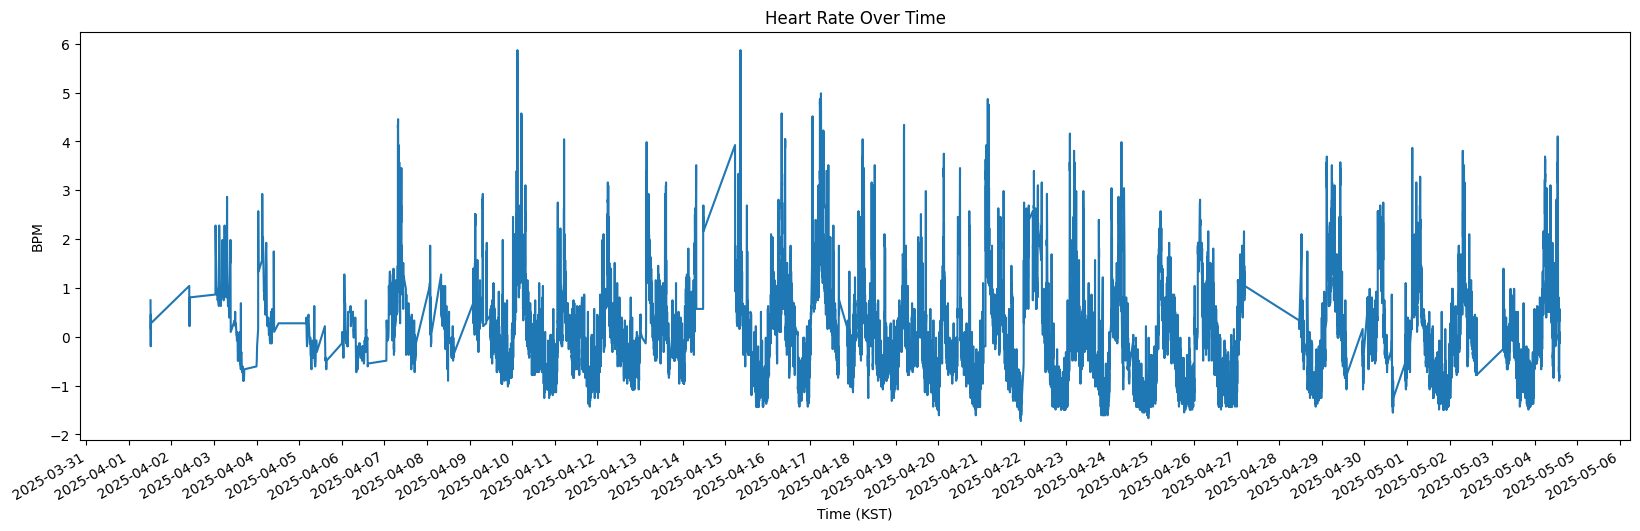

   stress           Stress_Time_KST  stress_z               HR_Time_KST  bpm  \
0    44.0 2025-05-04 22:56:00+09:00  1.645507 2025-05-04 22:58:00+09:00   81   
1    35.0 2025-05-04 22:46:00+09:00  0.708144 2025-05-04 22:57:00+09:00   85   
2    35.0 2025-05-04 22:41:00+09:00  0.708144 2025-05-04 22:56:00+09:00   81   
3    36.0 2025-05-04 22:36:00+09:00  0.812295 2025-05-04 22:55:00+09:00   78   
4    36.0 2025-05-04 22:31:00+09:00  0.812295 2025-05-04 22:54:00+09:00   75   

      bpm_z  
0  0.334232  
1  0.569698  
2  0.334232  
3  0.157632  
4 -0.018967  


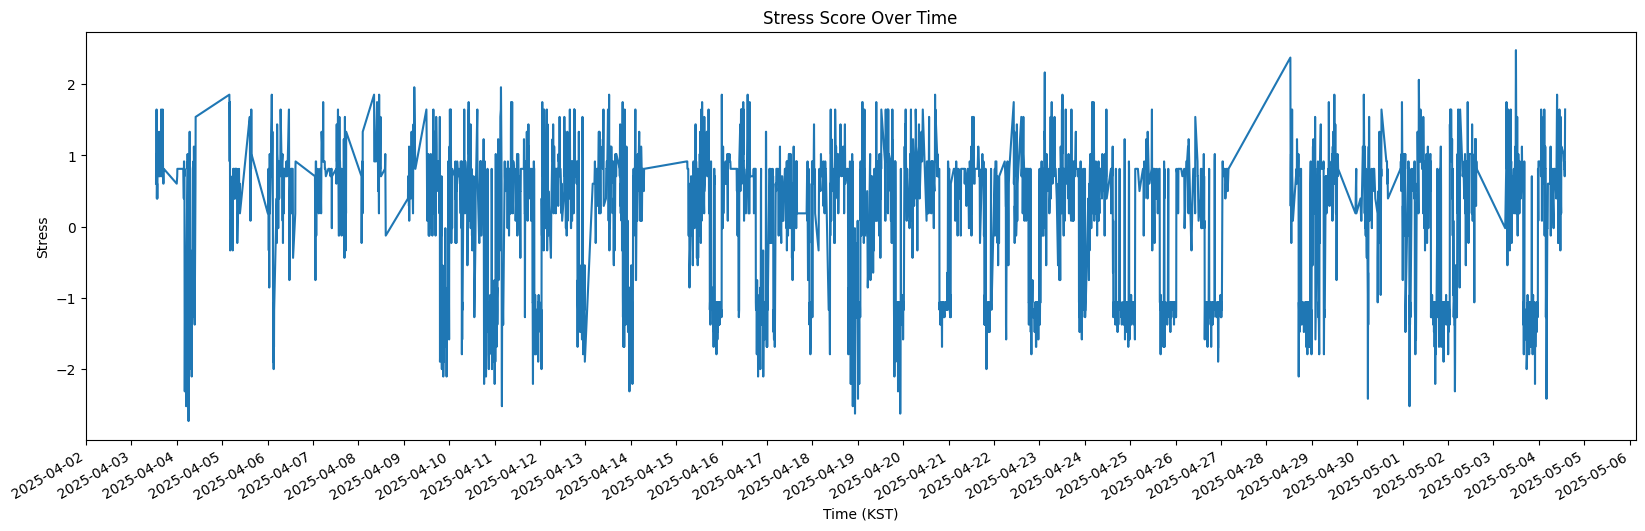

             Uid          Sid    Key          Time  \
38           NaN          NaN    NaN           NaN   
39  6.405322e+09  895582055.0  sleep  1.746073e+09   
40  6.405322e+09  895582055.0  sleep  1.746083e+09   
41  6.405322e+09  895582055.0  sleep  1.746147e+09   
42  6.405322e+09  895582055.0  sleep  1.746161e+09   
43           NaN          NaN    NaN           NaN   
44  6.405322e+09  895582055.0  sleep  1.746315e+09   
45  6.405322e+09  895582055.0  sleep  1.746332e+09   

                                                Value    UpdateTime  Duration  \
38                                                NaN           NaN       360   
39  {"sleep_rem_duration":0,"timezone":36,"sleep_l...  1.746077e+09        29   
40  {"max_hr":109,"sleep_rem_duration":0,"bedtime"...  1.746089e+09        58   
41  {"sleep_awake_duration":64,"wake_up_time":1746...  1.746154e+09       558   
42  {"sleep_awake_duration":0,"has_stage":false,"m...  1.746165e+09       122   
43                         

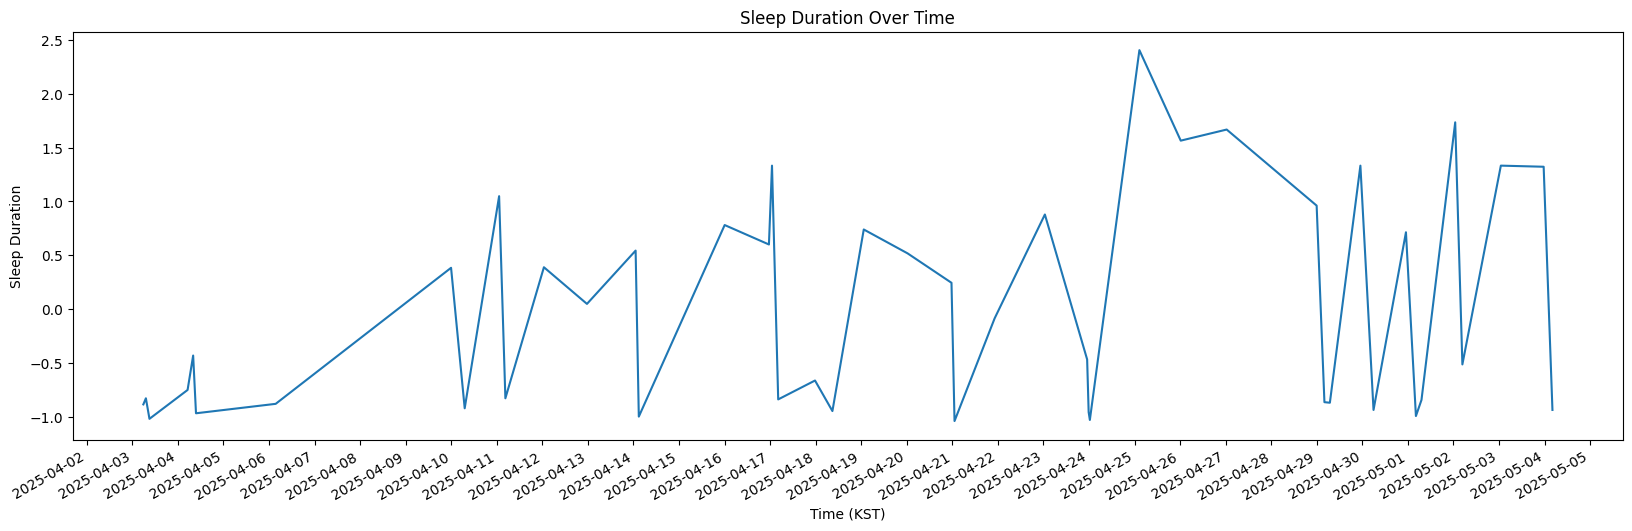

   spo2             Spo2_Time_KST   spo2_z            Sleep_Time_KST  \
0  97.0 2025-05-04 22:31:00+09:00  0.20447 2025-04-03 14:48:00+09:00   
1  97.0 2025-05-04 22:23:00+09:00  0.20447 2025-04-03 16:08:00+09:00   
2  96.0 2025-05-04 22:13:00+09:00 -0.29523 2025-04-03 18:01:00+09:00   
3  96.0 2025-05-04 22:08:00+09:00 -0.29523 2025-04-04 14:06:00+09:00   
4  99.0 2025-05-04 21:23:00+09:00  1.20387 2025-04-04 17:02:00+09:00   

   Duration  Duration_z  stress           Stress_Time_KST  stress_z  \
0      50.0   -0.887124    44.0 2025-05-04 22:56:00+09:00  1.645507   
1      61.0   -0.830325    35.0 2025-05-04 22:46:00+09:00  0.708144   
2      24.0   -1.021377    35.0 2025-05-04 22:41:00+09:00  0.708144   
3      76.0   -0.752871    36.0 2025-05-04 22:36:00+09:00  0.812295   
4     138.0   -0.432730    36.0 2025-05-04 22:31:00+09:00  0.812295   

                HR_Time_KST  bpm     bpm_z  
0 2025-05-04 22:58:00+09:00   81  0.334232  
1 2025-05-04 22:57:00+09:00   85  0.569698  
2 202

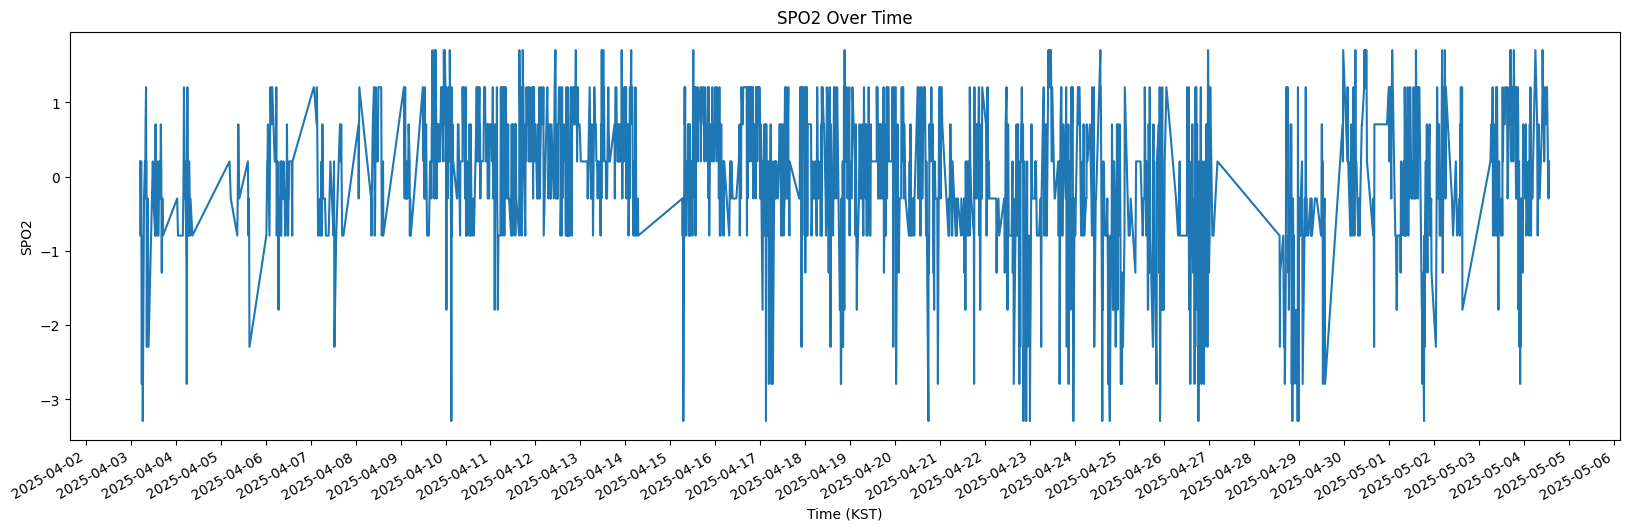

In [3]:
jaeha_p = process_plot(jaeha)
jiwoo_p = process_plot(jiwoo)

dongho_add = pd.DataFrame([
    [214, pd.Timestamp("2025-04-15 10:00", tz='Asia/Seoul')],
    [177, pd.Timestamp("2025-04-17 10:00", tz='Asia/Seoul')],
    [577, pd.Timestamp("2025-04-18 10:00", tz='Asia/Seoul')],
    [540, pd.Timestamp("2025-04-19 10:00", tz='Asia/Seoul')],
    [384, pd.Timestamp("2025-04-20 10:00", tz='Asia/Seoul')],
    [684, pd.Timestamp("2025-04-25 10:00", tz='Asia/Seoul')],
    [62, pd.Timestamp("2025-04-26 10:00", tz='Asia/Seoul')],
    [509, pd.Timestamp("2025-04-27 10:00", tz='Asia/Seoul')],
    [182, pd.Timestamp("2025-04-28 10:00", tz='Asia/Seoul')],
    [373, pd.Timestamp("2025-04-29 10:00", tz='Asia/Seoul')],
    [392, pd.Timestamp("2025-04-30 10:00", tz='Asia/Seoul')],
    [546, pd.Timestamp("2025-05-02 10:00", tz='Asia/Seoul')],
    [402, pd.Timestamp("2025-05-03 10:00", tz='Asia/Seoul')],
    [441, pd.Timestamp("2025-05-04 10:00", tz='Asia/Seoul')],
    [524, pd.Timestamp("2025-05-05 10:00", tz='Asia/Seoul')],
], columns=["Duration", "Sleep_Time_KST"])
dongho_p = process_plot(dongho,1,dongho_add)

youngjoo_add = pd.DataFrame([[480, pd.Timestamp("2025-04-17 10:00", tz='Asia/Seoul')],[480,pd.Timestamp("2025-04-30 08:00", tz='Asia/Seoul')],[360,pd.Timestamp("2025-05-01 08:00", tz='Asia/Seoul')],[480,pd.Timestamp("2025-05-03 10:00", tz='Asia/Seoul')]], columns=["Duration", "Sleep_Time_KST"])
youngjoo_p = process_plot(youngjoo,1,youngjoo_add)



In [4]:
import pandas as pd
import pytz
from datetime import datetime

# 파일 불러오기
def test_caf(df):
  df_c = pd.concat([df['Caffeine'],df['Caffeine_time']],axis=1)
  df_c = df_c.dropna()
  # 필요한 열만 선택
  df = df.drop(['Caffeine','Caffeine_time'],axis=1)

  # KST 타임존 설정
  kst = pytz.timezone('Asia/Seoul')
  year = 2025  # 연도 가정

  # Caffeine_time KST로 변환
  df_c['Caffeine_time_KST'] = pd.to_datetime(
      df_c['Caffeine_time'], format='%m/%d/%Y %H:%M:%S'
  ).dt.tz_localize(kst)

  # Test_time_UTC → UTC로 해석 후 KST로 변환
  df['Test_time_KST'] = pd.to_datetime(
      df['Test_time_UTC'], format='%d/%m/%Y %H:%M:%S'
  ).dt.tz_localize('UTC').dt.tz_convert(kst).dt.floor('min')

  # 저장
  print(df.head())
  print(df_c[:7])
  plt.figure(figsize=(20, 6))
    # 그래프 그리기
  plt.plot(jaeha_p['HR_Time_KST'], jaeha_p['bpm_z'])
  #plt.plot(df['Caffeine_time_KST'], df['Caffeine'])
  #plt.plot(df['Test_time_KST'], df['Testing_time'])
  plt.plot(df_c['Caffeine_time_KST'], df_c['Caffeine'],marker='o')
  plt.plot(df['Test_time_KST'], df['Testing_time'],marker='x')

  plt.legend(['HR', 'Caffeine', 'Testing Time'])
    # x축 레이블 설정
  plt.xlabel('Time (KST)')

    # y축 레이블 설정
  plt.ylabel('Data')

    # 그래프 제목 설정
  plt.title('Relation')

  plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # interval=1 for 1-day intervals
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

  plt.gcf().autofmt_xdate()  # Auto-format x-axis date labels for better readability
    # 그래프 표시
  plt.show()
  return df ,df_c

In [5]:
def plot_multi(bio,df,df_c):
  plt.figure(figsize=(20, 6))
    # 그래프 그리기
  plt.plot(bio['HR_Time_KST'], bio['bpm_z'])
  #plt.plot(df_c['Caffeine_time_KST'], df_c['Caffeine'],marker='o')
  plt.plot(df['time'], df['Stroop_score_z'],marker='x')

  plt.legend(['HR', 'Stroop Score_z'])
    # x축 레이블 설정
  plt.xlabel('Time (KST)')

    # y축 레이블 설정
  plt.ylabel('Data')

    # 그래프 제목 설정
  plt.title('Relation')

  plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # interval=1 for 1-day intervals
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

  plt.gcf().autofmt_xdate()  # Auto-format x-axis date labels for better readability
    # 그래프 표시
  plt.show()

In [6]:
from datetime import datetime
import pandas as pd
import numpy as np

# 원시 데이터 문자열
def mean_time(df):
  # 박스플롯 그리기
  fig, axes = plt.subplots(2, 4, figsize=(20, 10))
  fig.suptitle('Box Plots by Test_id')
  
  # Test_id 1에 대한 박스플롯
  df1 = df[df['Test_id'] == 1]
  df1.boxplot('Rights_1', ax=axes[0,0], showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'red', 'markeredgecolor':'red'})
  df1.boxplot('Rights_2', ax=axes[0,1], showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'red', 'markeredgecolor':'red'})
  df1.boxplot('Avg_time_1', ax=axes[0,2], showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'red', 'markeredgecolor':'red'})
  df1.boxplot('Avg_time_2', ax=axes[0,3], showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'red', 'markeredgecolor':'red'})
  
  # Test_id 2에 대한 박스플롯  
  df2 = df[df['Test_id'] == 2]
  df2.boxplot('Rights_1', ax=axes[1,0], showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'red', 'markeredgecolor':'red'})
  df2.boxplot('Rights_2', ax=axes[1,1], showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'red', 'markeredgecolor':'red'})
  df2.boxplot('Avg_time_1', ax=axes[1,2], showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'red', 'markeredgecolor':'red'})
  df2.boxplot('Avg_time_2', ax=axes[1,3], showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'red', 'markeredgecolor':'red'})

  plt.tight_layout()
  plt.show()

  # 이상치 제거
  cols_to_check = ['Rights_1', 'Rights_2', 'Avg_time_1', 'Avg_time_2']
  
  for test_id in [1, 2]:
    mask = df['Test_id'] == test_id
    for col in cols_to_check:
      Q1 = df[mask][col].quantile(0.25)
      Q3 = df[mask][col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      
      outlier_mask = (df[mask][col] < lower_bound) | (df[mask][col] > upper_bound)
      df = df[~(mask & outlier_mask)]

  # z-score 계산
  cols_to_standardize = ['Rights_1', 'Rights_2','Avg_time_1','Avg_time_2']
  for col in cols_to_standardize:
      df[f'{col}_z'] = df.groupby('Test_id')[col] \
                          .transform(lambda x: (x - x.mean()) / x.std(ddof=0))

  # 중간 시간 계산
  result = []
  score = []
  i = 0
  while i < len(df):
      current = df.iloc[i]
      if i + 1 < len(df):
          next_row = df.iloc[i + 1]
          if current['Test_id'] == 1 and next_row['Test_id'] == 2:
              midpoint = next_row['Test_time_KST']
              result.append(midpoint)
              #stroop_score = np.log(1/((current['Avg_time_1'] + current['Avg_time_2'] + next_row['Avg_time_1'] + next_row['Avg_time_2'])/4))
              stroop_score = (1-np.exp((current['Rights_1'] + current['Rights_2'] + next_row['Rights_1'] + next_row['Rights_2'])/120)) * np.log(1/((current['Avg_time_1'] + current['Avg_time_2'] + next_row['Avg_time_1'] + next_row['Avg_time_2'])/4))
              score.append(stroop_score)
              i += 2
          else:
              result.append(current['Test_time_KST'])
              #stroop_score = np.log(1/((current['Avg_time_1'] + current['Avg_time_2'])/2))
              stroop_score = (1-np.exp((current['Rights_1'] + current['Rights_2'])/60)) * np.log(1/((current['Avg_time_1'] + current['Avg_time_2'])/2))
              score.append(stroop_score)
              i += 1
      else:
          result.append(current['Test_time_KST'])
          #stroop_score = np.log(1/((current['Avg_time_1'] + current['Avg_time_2'])/2))
          stroop_score = (1-np.exp((current['Rights_1'] + current['Rights_2'])/60)) * np.log(1/((current['Avg_time_1'] + current['Avg_time_2'])/2))
          score.append(stroop_score)
          i += 1

  result_df = pd.DataFrame(list(zip(result,score)), columns=['time','Stroop_score'])
  print('########Stroop score mean and std:',result_df['Stroop_score'].mean(),result_df['Stroop_score'].std())

  result_df['Stroop_score_z'] = (result_df['Stroop_score'] - result_df['Stroop_score'].mean()) / result_df['Stroop_score'].std()
  result_df.head(10)

  return result_df

       Test_time_UTC  Test_id  Rights_1  Rights_2   PART  Min_time_1  \
0  9/4/2025 22:39:44        1        30        27  94.64         705   
1  9/4/2025 22:42:52        2        29        30  12.12         719   
2  10/4/2025 0:24:25        1        30        27  40.35         523   
3  10/4/2025 0:27:01        2        30        28  41.76         623   
4  10/4/2025 3:31:47        1        30        29  44.78         587   

   Min_time_2  Max_time_1  Max_time_2  Avg_time_1  Avg_time_2  Avg_delay_time  \
0         785        3053        6442     1204.20     2343.80         1139.60   
1         715        3697        5116     1411.30     1582.33          171.03   
2         659        1554        2671      727.70     1021.33          293.63   
3         675        1439        4746      935.33     1325.90          390.57   
4         650        1397        3861      761.60     1102.67          341.07   

   Testing_time  height  weight  caffeine_freq  caffeine_size  age  sex  \
0    

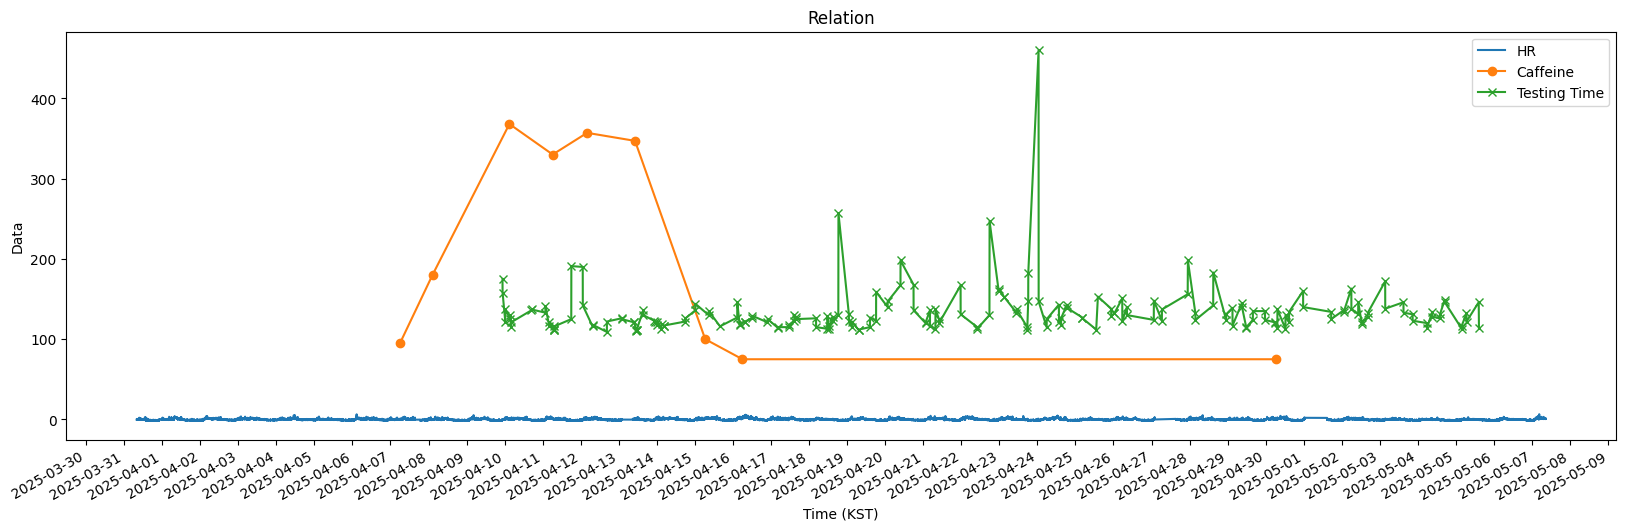

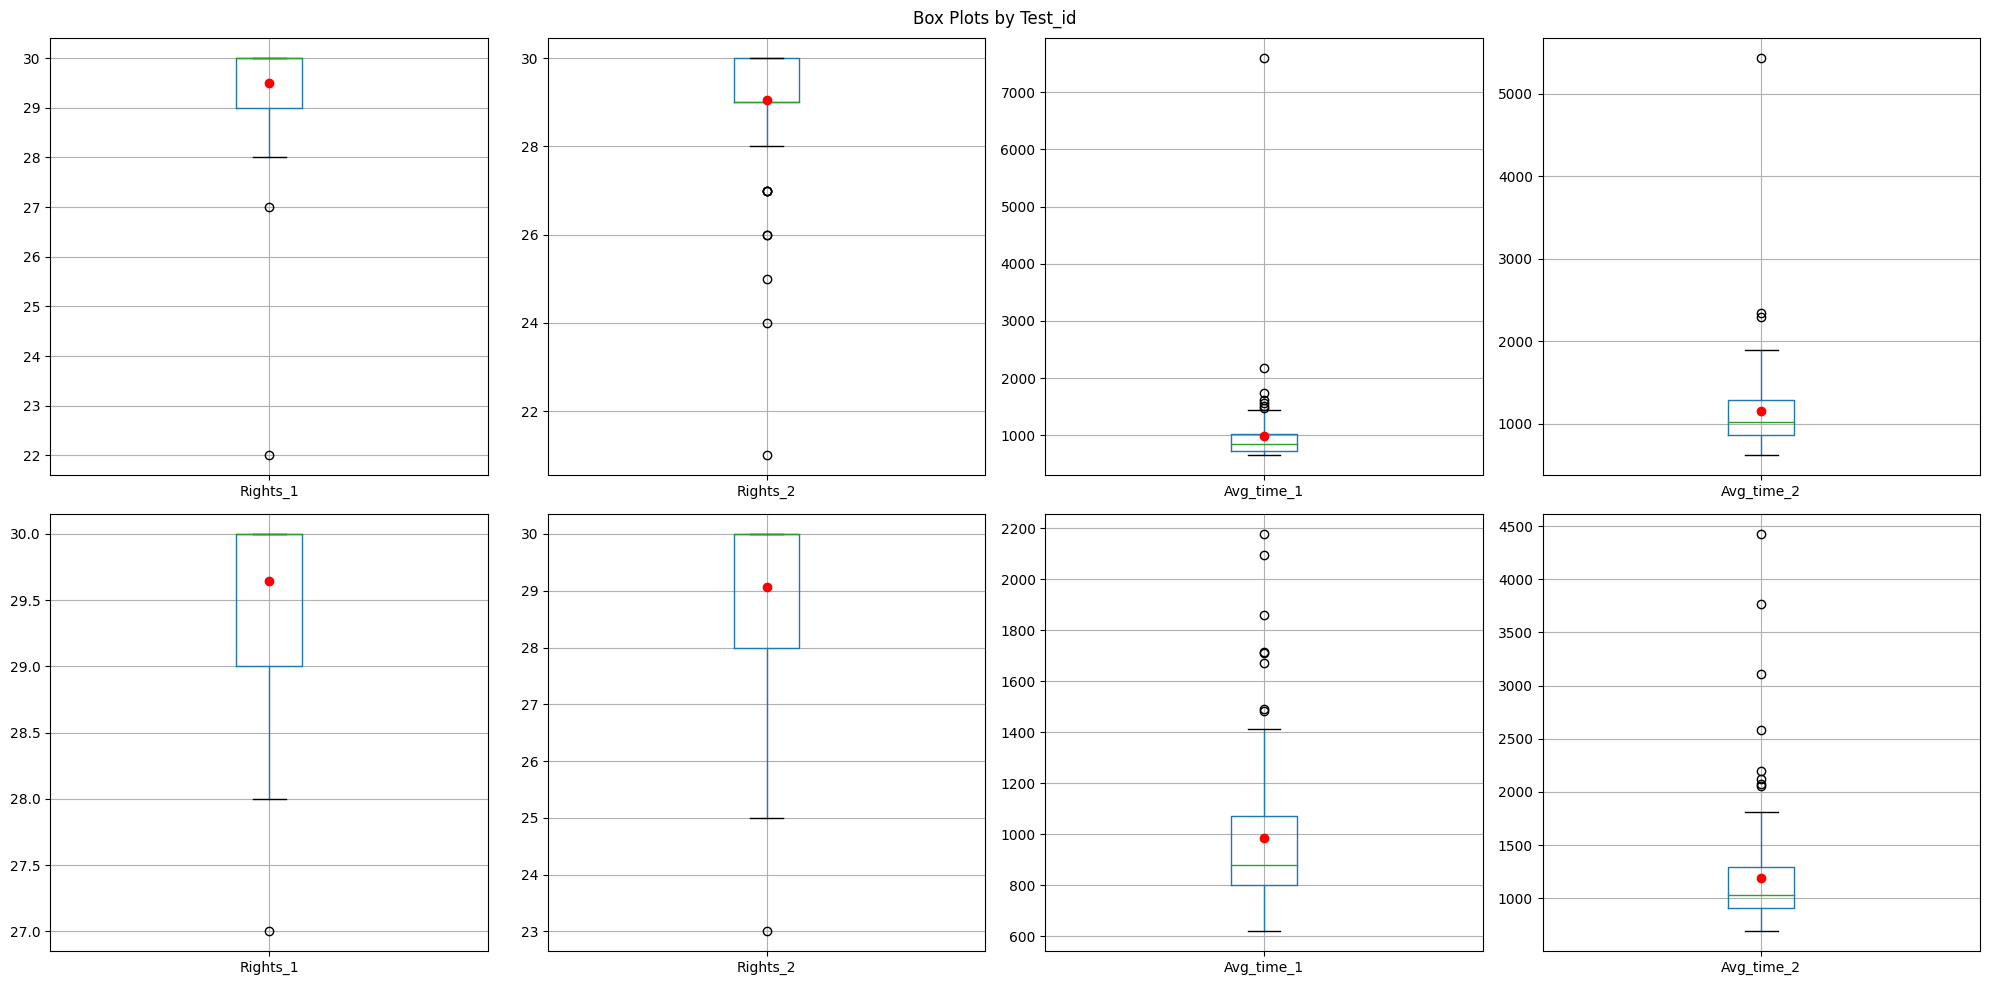

C:\Users\613ja\AppData\Local\Temp\ipykernel_35184\2815809888.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Q1 = df[mask][col].quantile(0.25)
C:\Users\613ja\AppData\Local\Temp\ipykernel_35184\2815809888.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Q3 = df[mask][col].quantile(0.75)
C:\Users\613ja\AppData\Local\Temp\ipykernel_35184\2815809888.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_mask = (df[mask][col] < lower_bound) | (df[mask][col] > upper_bound)
C:\Users\613ja\AppData\Local\Temp\ipykernel_35184\2815809888.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_mask = (df[mask][col] < lower_bound) | (df[mask][col] > upper_bound)
C:\Users\613ja\AppData\Local\Temp\ipykernel_35184\2815809888.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~(mask & outlier_mask)]
C:\Users\613ja\A

########Stroop score mean and std: 11.455690091293613 0.3640036897853199
                       time  Stroop_score  Stroop_score_z
0 2025-04-10 07:42:00+09:00     12.234039        2.138300
1 2025-04-10 09:27:00+09:00     11.453879       -0.004976
2 2025-04-10 12:34:00+09:00     11.377397       -0.215090
3 2025-04-10 13:04:00+09:00     11.366286       -0.245613
4 2025-04-11 02:00:00+09:00     11.616161        0.440851
205 96
       Test_time_UTC  Test_id  Rights_1  Rights_2    PART  Min_time_1  \
0  10/4/2025 1:21:50        1        27        25   38.91         598   
1  10/4/2025 1:24:29        2        29        29   27.72         532   
2  10/4/2025 3:40:55        1        29        25  112.51         499   
3  10/4/2025 3:43:25        2        30        30   41.23         599   
4  10/4/2025 5:16:31        1        28        30   29.28         366   

   Min_time_2  Max_time_1  Max_time_2  Avg_time_1  Avg_time_2  Avg_delay_time  \
0         749        1451      2384.0      829.60   

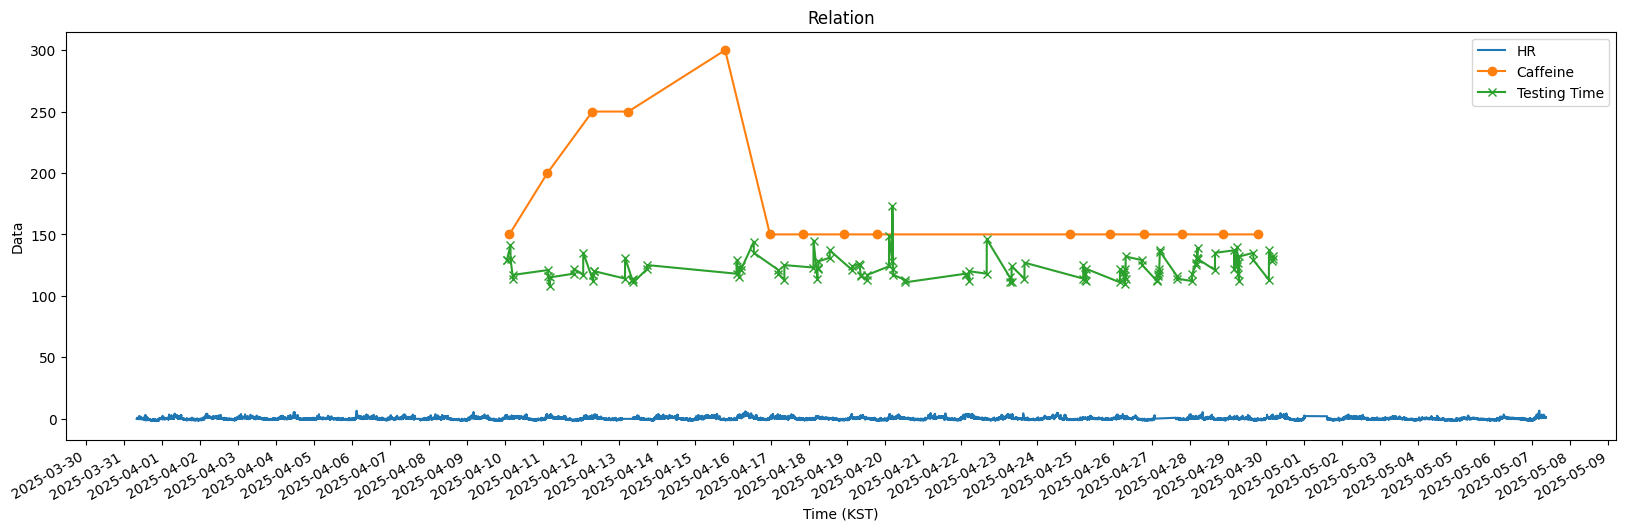

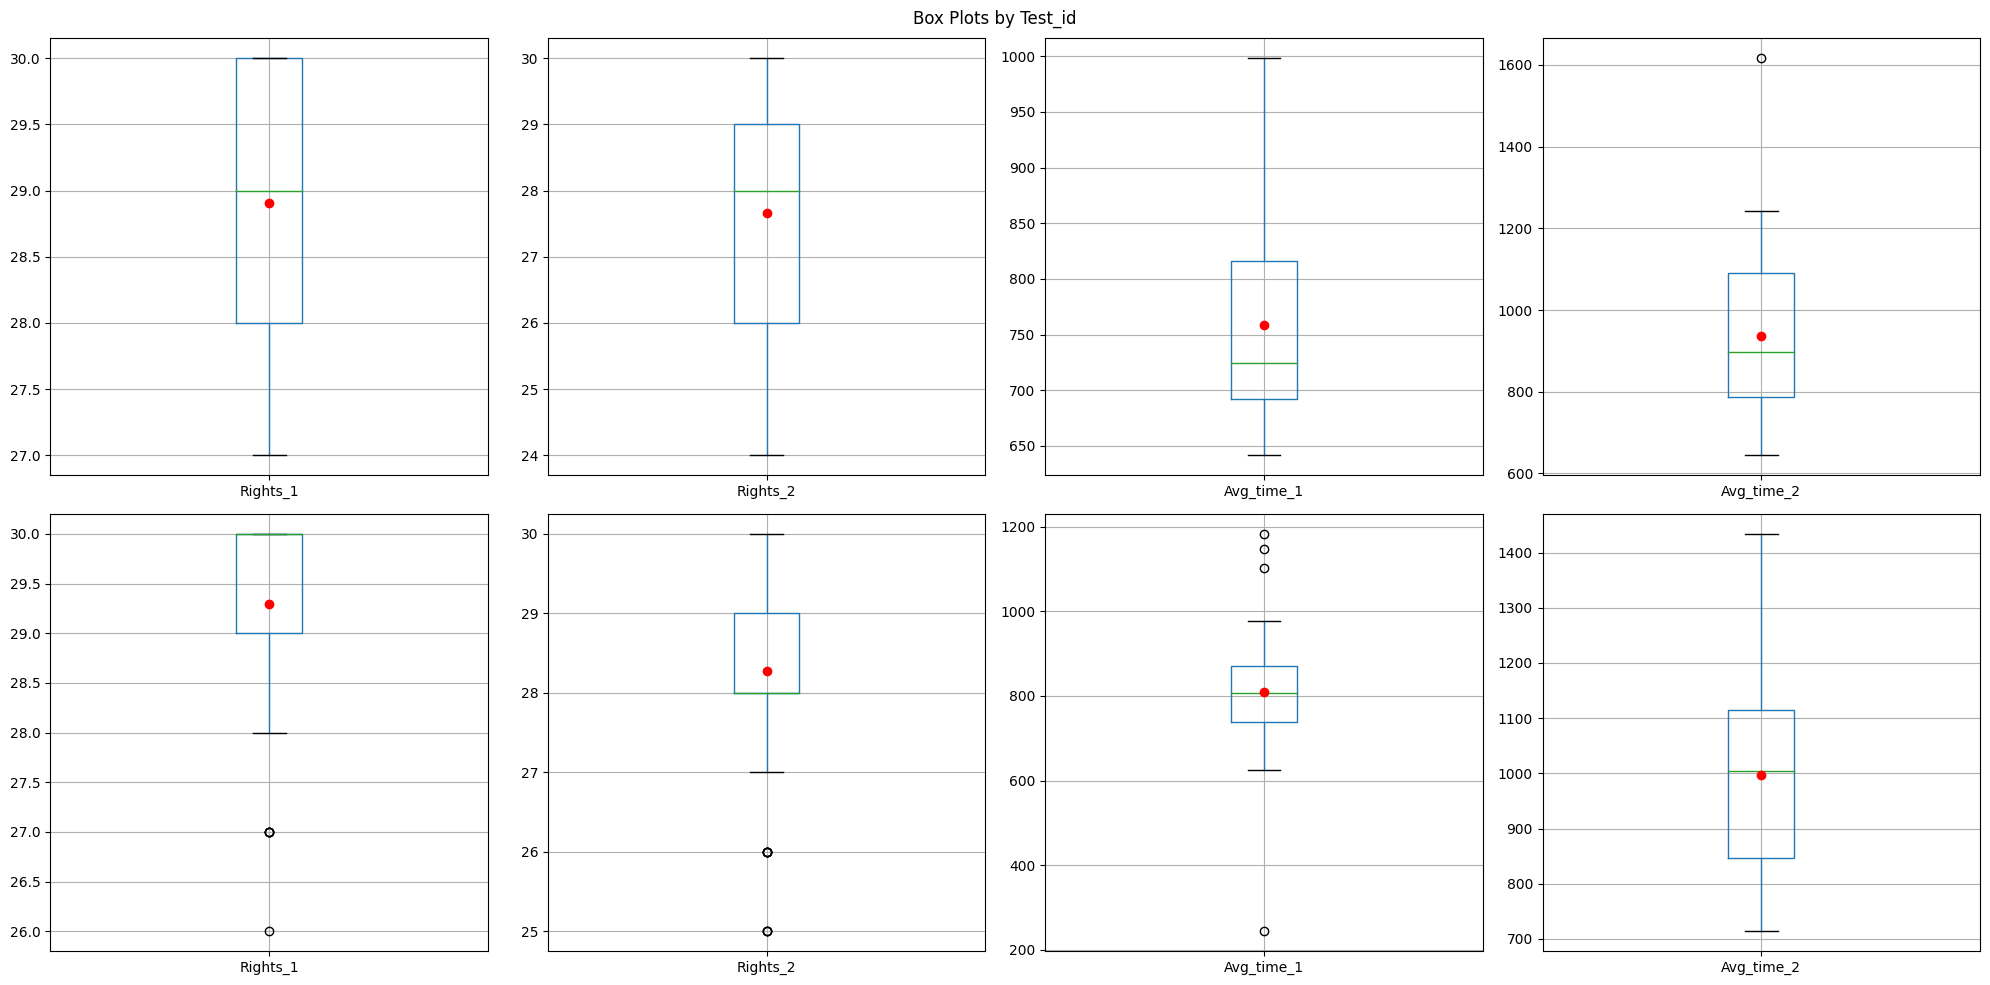

C:\Users\613ja\AppData\Local\Temp\ipykernel_35184\2815809888.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Q1 = df[mask][col].quantile(0.25)
C:\Users\613ja\AppData\Local\Temp\ipykernel_35184\2815809888.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Q3 = df[mask][col].quantile(0.75)
C:\Users\613ja\AppData\Local\Temp\ipykernel_35184\2815809888.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_mask = (df[mask][col] < lower_bound) | (df[mask][col] > upper_bound)
C:\Users\613ja\AppData\Local\Temp\ipykernel_35184\2815809888.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_mask = (df[mask][col] < lower_bound) | (df[mask][col] > upper_bound)
C:\Users\613ja\AppData\Local\Temp\ipykernel_35184\2815809888.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~(mask & outlier_mask)]
C:\Users\613ja\A

########Stroop score mean and std: 10.768515614499586 0.5097590026123578
                       time  Stroop_score  Stroop_score_z
0 2025-04-10 10:24:00+09:00     10.351953       -0.817175
1 2025-04-10 12:43:00+09:00     11.889313        2.198681
2 2025-04-10 14:18:00+09:00     10.521852       -0.483883
3 2025-04-11 12:30:00+09:00     11.066600        0.584755
4 2025-04-11 13:30:00+09:00     10.394007       -0.734677
125 63
        Test_time_UTC  Test_id  Rights_1  Rights_2   PART  Min_time_1  \
0   9/4/2025 23:16:00        1        30        30  20.91         596   
1   9/4/2025 23:17:00        2        28        29  24.41         514   
2  10/4/2025 11:43:00        1        30        30  15.10         659   
3  10/4/2025 11:46:00        2        29        29  26.25         482   
4  10/4/2025 12:24:00        1        30        29   3.80         480   

   Min_time_2  Max_time_1  Max_time_2  Avg_time_1  Avg_time_2  Avg_delay_time  \
0         646        1174        1487      739.93   

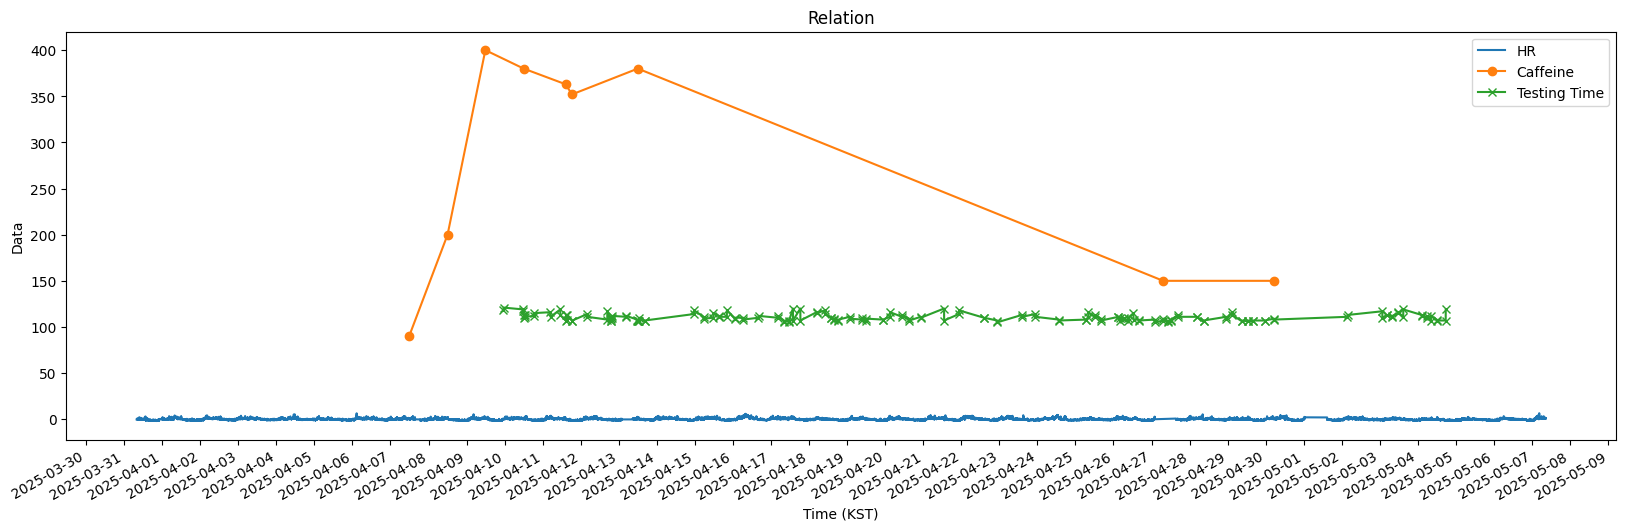

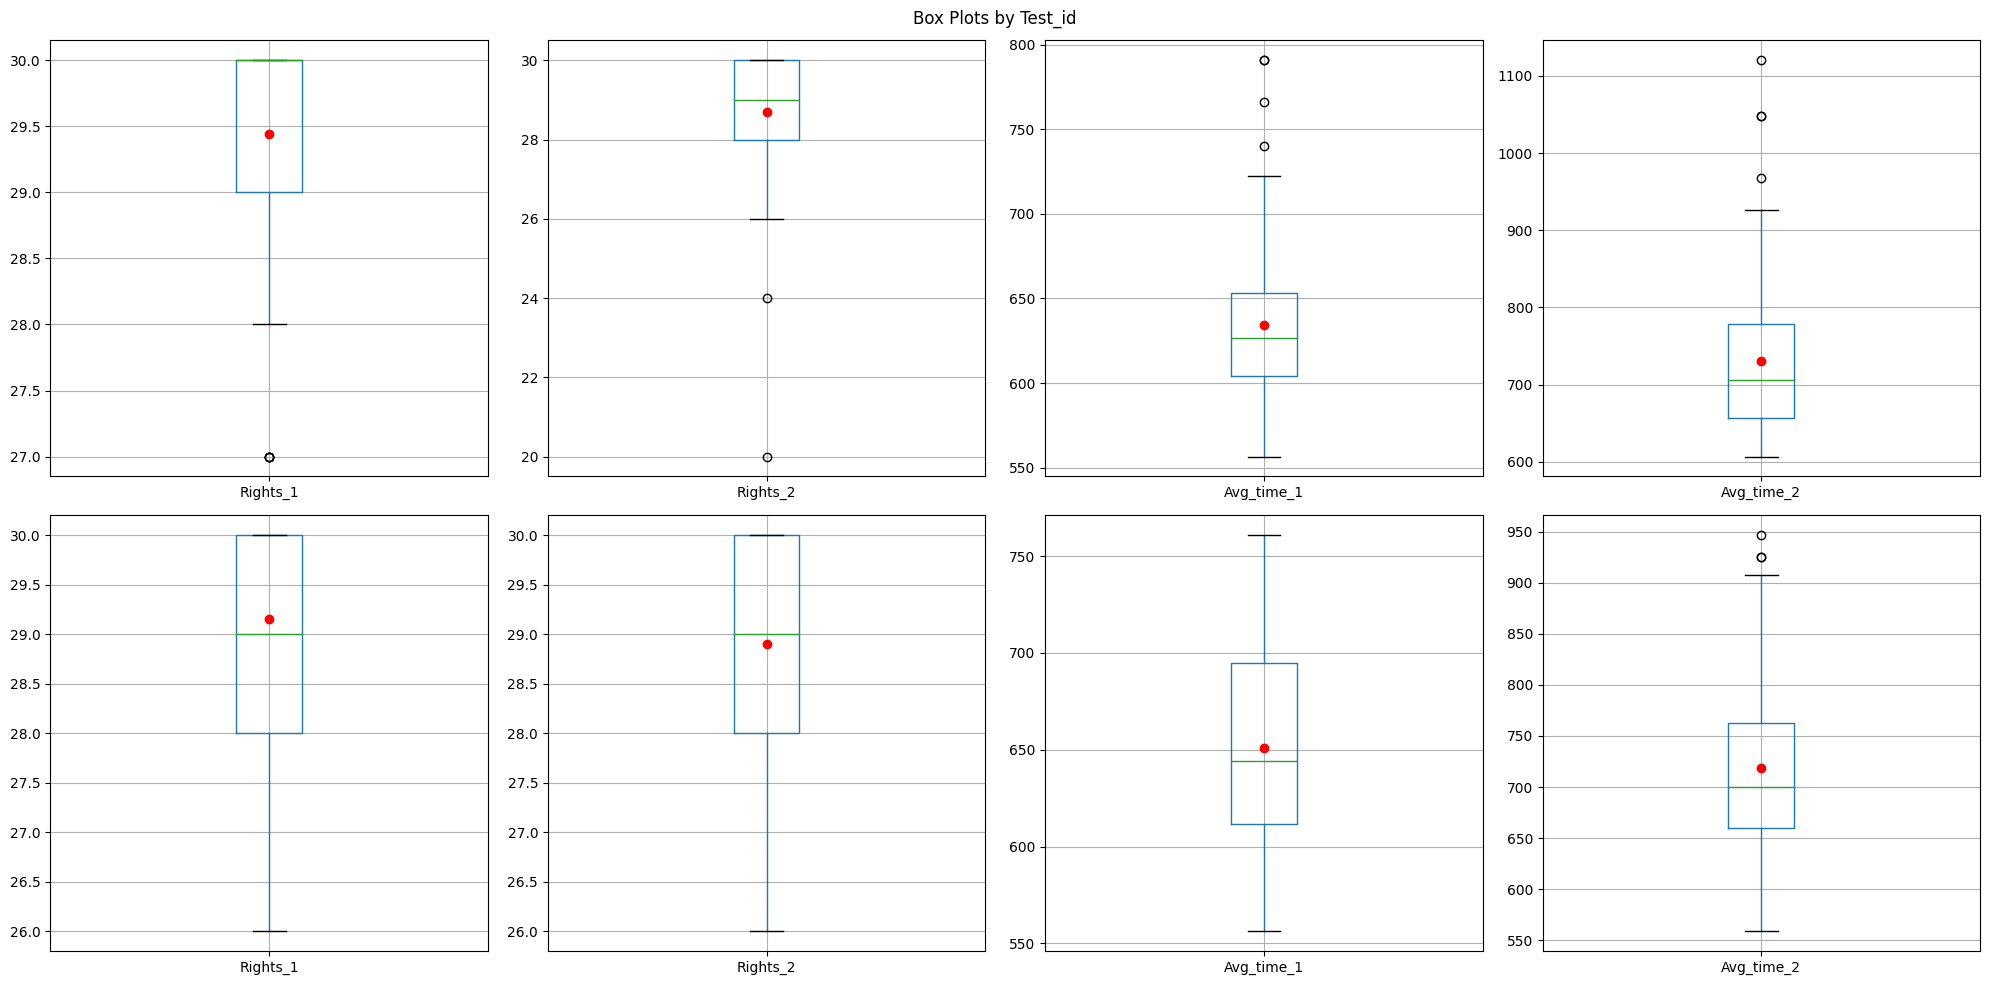

C:\Users\613ja\AppData\Local\Temp\ipykernel_35184\2815809888.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Q1 = df[mask][col].quantile(0.25)
C:\Users\613ja\AppData\Local\Temp\ipykernel_35184\2815809888.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Q3 = df[mask][col].quantile(0.75)
C:\Users\613ja\AppData\Local\Temp\ipykernel_35184\2815809888.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_mask = (df[mask][col] < lower_bound) | (df[mask][col] > upper_bound)
C:\Users\613ja\AppData\Local\Temp\ipykernel_35184\2815809888.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_mask = (df[mask][col] < lower_bound) | (df[mask][col] > upper_bound)
C:\Users\613ja\AppData\Local\Temp\ipykernel_35184\2815809888.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~(mask & outlier_mask)]
C:\Users\613ja\A

########Stroop score mean and std: 10.664824547048983 0.3449884042528964
                       time  Stroop_score  Stroop_score_z
0 2025-04-10 20:46:00+09:00     10.892479        0.659889
1 2025-04-10 21:26:00+09:00     11.097026        1.252799
2 2025-04-10 21:57:00+09:00     10.254267       -1.190063
3 2025-04-11 03:16:00+09:00     10.896479        0.671483
4 2025-04-11 13:56:00+09:00     11.041518        1.091902
176 87
       Test_time_UTC  Test_id  Rights_1  Rights_2   PART  Min_time_1  \
0  10/4/2025 0:03:51        1        30        28  54.61         682   
1  10/4/2025 0:07:25        2        30        27  41.63         632   
2  10/4/2025 5:19:17        1        30        30  13.23         565   
3  10/4/2025 5:22:41        2        29        28  15.04         633   
4  10/4/2025 5:56:00        1        28        28  51.28         565   

   Min_time_2  Max_time_1  Max_time_2  Avg_time_1  Avg_time_2  Avg_delay_time  \
0         748        1484        2647      868.27     1342

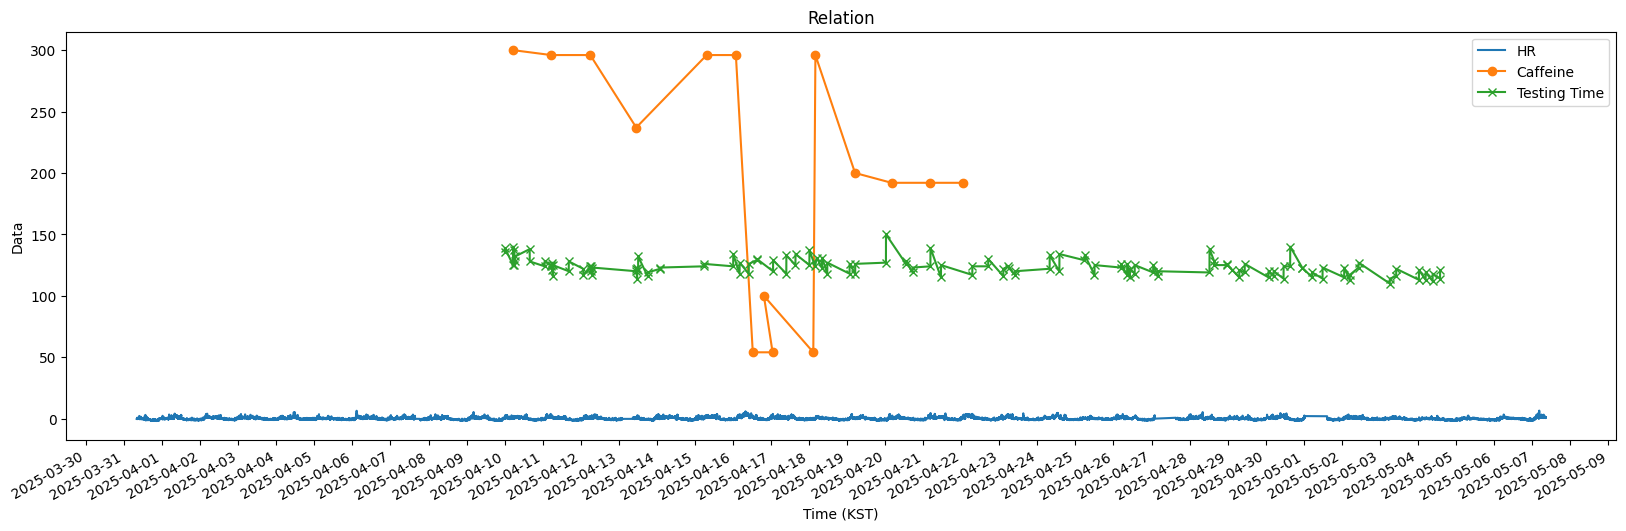

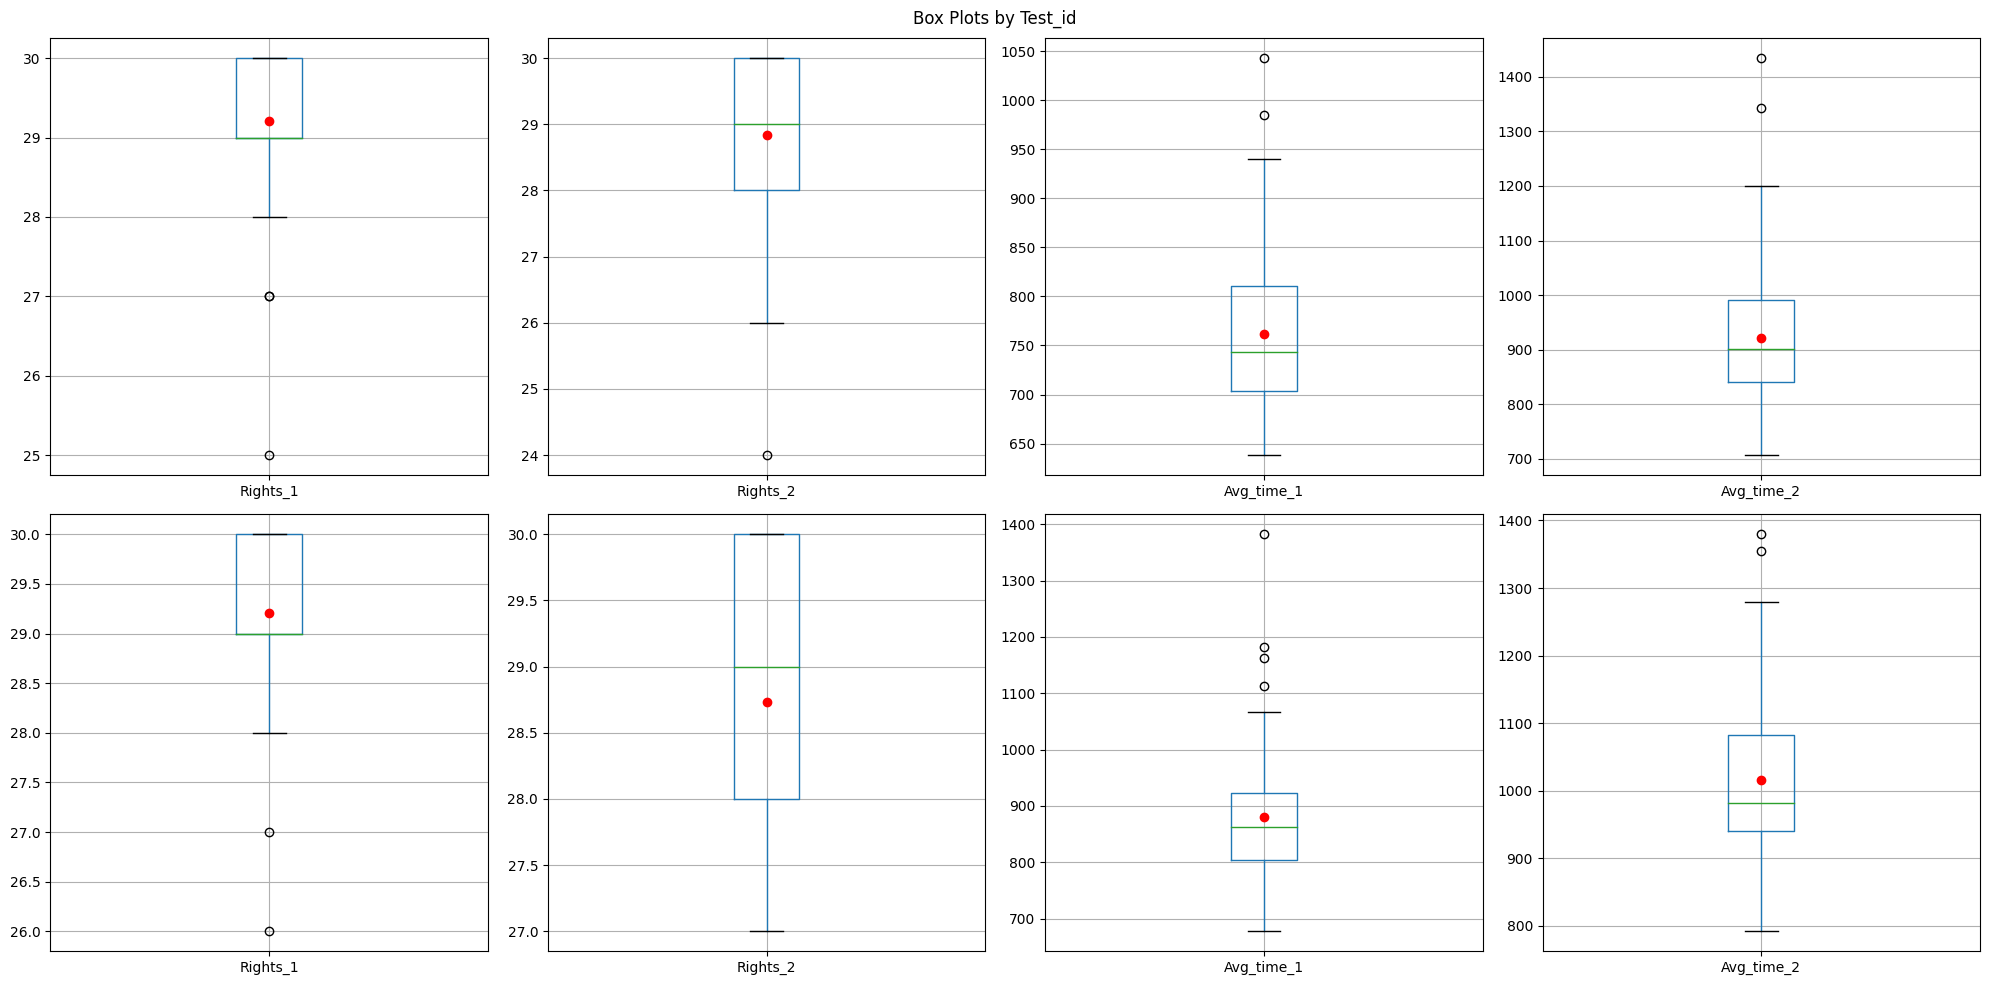

########Stroop score mean and std: 11.076492385291553 0.3366599917054856
                       time  Stroop_score  Stroop_score_z
0 2025-04-10 14:19:00+09:00     11.696488        1.841609
1 2025-04-10 14:58:00+09:00     11.272263        0.581507
2 2025-04-10 15:31:00+09:00     11.402156        0.967338
3 2025-04-11 00:50:00+09:00     11.506182        1.276331
4 2025-04-11 10:15:00+09:00     10.997650       -0.234189
149 71


C:\Users\613ja\AppData\Local\Temp\ipykernel_35184\2815809888.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Q1 = df[mask][col].quantile(0.25)
C:\Users\613ja\AppData\Local\Temp\ipykernel_35184\2815809888.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Q3 = df[mask][col].quantile(0.75)
C:\Users\613ja\AppData\Local\Temp\ipykernel_35184\2815809888.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_mask = (df[mask][col] < lower_bound) | (df[mask][col] > upper_bound)
C:\Users\613ja\AppData\Local\Temp\ipykernel_35184\2815809888.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_mask = (df[mask][col] < lower_bound) | (df[mask][col] > upper_bound)
C:\Users\613ja\AppData\Local\Temp\ipykernel_35184\2815809888.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~(mask & outlier_mask)]
C:\Users\613ja\A

In [7]:
jaeha_stroop_t,jaeha_c = test_caf(jaeha_stroop)
jaeha_stroop_m = mean_time(jaeha_stroop_t)
print(jaeha_stroop_m.head())
print(len(jaeha_stroop_t['Test_time_KST']),len(jaeha_stroop_m['time']))

jiwoo_stroop_t,jiwoo_c = test_caf(jiwoo_stroop)
jiwoo_stroop_m = mean_time(jiwoo_stroop_t)
print(jiwoo_stroop_m.head())
print(len(jiwoo_stroop_t['Test_time_KST']),len(jiwoo_stroop_m['time']))

dongho_stroop_t,dongho_c = test_caf(dongho_stroop)
dongho_stroop_m = mean_time(dongho_stroop_t)
print(dongho_stroop_m.head())
print(len(dongho_stroop_t['Test_time_KST']),len(dongho_stroop_m['time']))

youngjoo_stroop_t,youngjoo_c = test_caf(youngjoo_stroop)
youngjoo_stroop_m = mean_time(youngjoo_stroop_t)
print(youngjoo_stroop_m.head())
print(len(youngjoo_stroop_t['Test_time_KST']),len(youngjoo_stroop_m['time']))

In [8]:
def sleep_process(df):
  df['Sleep_date'] = df['Sleep_Time_KST'].dt.date

  # 2) 날짜별 Duration이 가장 긴 인덱스 찾기
  idx = df.groupby('Sleep_date')['Duration'].idxmax()

  # 3) 날짜별 대표 sleep 정보만 남기기
  df_sleep_daily = df.loc[idx, ['Sleep_date', 'Duration']].reset_index(drop=True)
  df_sleep_daily['Duration_z'] = (df_sleep_daily['Duration'] - df_sleep_daily['Duration'].mean()) / df_sleep_daily['Duration'].std()
  df = pd.concat((df.drop(['Sleep_date','Duration','Duration_z','Sleep_Time_KST'],axis=1),df_sleep_daily),axis=1)
  return df

In [9]:
jaeha_bio = pd.concat((sleep_process(jaeha_p),jaeha_stroop[['height','weight','sex','age','caffeine_freq','caffeine_size']]),axis=1)
jiwoo_bio = pd.concat((sleep_process(jiwoo_p),jiwoo_stroop[['height','weight','sex','age','caffeine_freq','caffeine_size']]),axis=1)
dongho_bio = pd.concat((sleep_process(dongho_p),dongho_stroop[['height','weight','sex','age','caffeine_freq','caffeine_size']]),axis=1)
youngjoo_bio = pd.concat((sleep_process(youngjoo_p),youngjoo_stroop[['height','weight','sex','age','caffeine_freq','caffeine_size']]),axis=1)

print(jaeha_bio.head())
print(jiwoo_bio.head())
print(dongho_bio.head())
print(youngjoo_bio.head())

   spo2             Spo2_Time_KST    spo2_z  stress           Stress_Time_KST  \
0  98.0 2025-05-07 17:31:00+09:00  0.534642    34.0 2025-05-07 17:31:00+09:00   
1  96.0 2025-05-07 17:22:00+09:00 -0.881257    34.0 2025-05-07 17:06:00+09:00   
2  98.0 2025-05-07 17:11:00+09:00  0.534642    34.0 2025-05-07 16:56:00+09:00   
3  97.0 2025-05-07 17:02:00+09:00 -0.173307    38.0 2025-05-07 16:51:00+09:00   
4  95.0 2025-05-07 16:51:00+09:00 -1.589206    36.0 2025-05-07 16:26:00+09:00   

   stress_z               HR_Time_KST  bpm     bpm_z  Sleep_date  Duration  \
0  0.825226 2025-05-07 17:38:00+09:00   87  0.841916  2025-04-01     332.0   
1  0.825226 2025-05-07 17:37:00+09:00   90  1.025439  2025-04-02     674.0   
2  0.825226 2025-05-07 17:36:00+09:00   89  0.964265  2025-04-03     323.0   
3  1.228402 2025-05-07 17:35:00+09:00   89  0.964265  2025-04-04     436.0   
4  1.026814 2025-05-07 17:34:00+09:00   88  0.903090  2025-04-05     540.0   

   Duration_z  height  weight  sex   age  ca

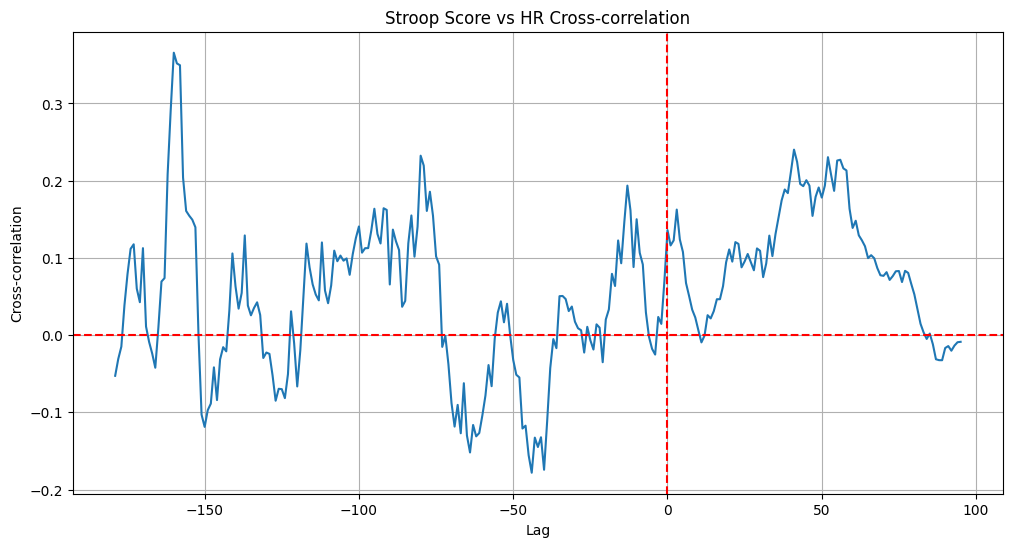

최대 상관계수: 0.366
해당 lag: -160


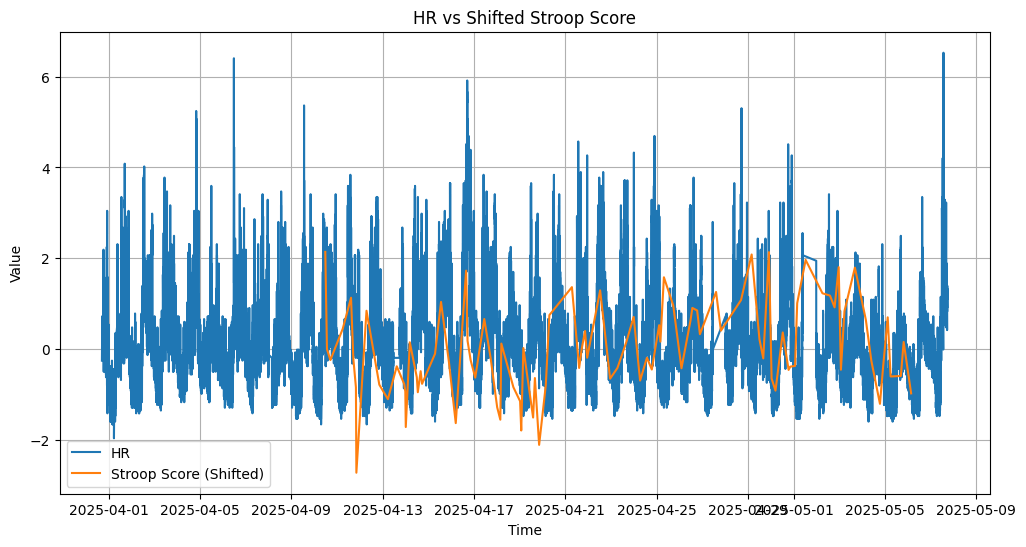

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd

# 데이터 로드

# 교차상관 분석을 위한 함수
def cross_correlation_analysis(series1, series2, max_lag=None):
    # 시계열 데이터 정규화
    series1_norm = (series1 - np.mean(series1)) / np.std(series1)
    series2_norm = (series2 - np.mean(series2)) / np.std(series2)
    
    # 교차상관 계산
    if max_lag is None:
        max_lag = len(series1) - 1
    
    # 정규화된 교차상관 계산
    correlation = signal.correlate(series1_norm, series2_norm, mode='full')
    correlation = correlation / (len(series1) * np.std(series1_norm) * np.std(series2_norm))
    lags = signal.correlation_lags(len(series1), len(series2), mode='full')
    
    # lag가 180 이하인 경우만 필터링
    mask = np.abs(lags) < 180
    lags = lags[mask]
    correlation = correlation[mask]
    
    # 결과를 데이터프레임으로 변환
    result_df = pd.DataFrame({
        'lag': lags,
        'correlation': correlation
    })
    
    return result_df

# 시각화 함수
def plot_cross_correlation(corr_df, title):
    plt.figure(figsize=(12, 6))
    plt.plot(corr_df['lag'], corr_df['correlation'])
    plt.axhline(y=0, color='r', linestyle='--')
    plt.axvline(x=0, color='r', linestyle='--')
    plt.title(title)
    plt.xlabel('Lag')
    plt.ylabel('Cross-correlation')
    plt.grid(True)
    plt.show()

# 예시: Stroop 점수와 HR의 교차상관 분석
# (실제 컬럼명은 데이터에 맞게 수정해주세요)
stroop_scores = jaeha_stroop_m['Stroop_score']  # Stroop 점수 컬럼
hr_values = jaeha_p['bpm']  # HR 컬럼

# 교차상관 분석 수행
corr_result = cross_correlation_analysis(stroop_scores, hr_values)

# 결과 시각화
plot_cross_correlation(corr_result, 'Stroop Score vs HR Cross-correlation')

# 최대 상관계수와 해당 lag 찾기
max_corr_idx = np.argmax(np.abs(corr_result['correlation']))
max_corr_lag = corr_result['lag'][max_corr_idx]
max_corr_value = corr_result['correlation'][max_corr_idx]

print(f"최대 상관계수: {max_corr_value:.3f}")
print(f"해당 lag: {max_corr_lag}")

# 시간 조정 후 시각화
jaeha_stroop_m_shifted = jaeha_stroop_m.copy()
jaeha_stroop_m_shifted['time'] = jaeha_stroop_m_shifted['time'] + pd.Timedelta(minutes=241)

plt.figure(figsize=(12, 6))
plt.plot(jaeha_p['HR_Time_KST'], jaeha_p['bpm_z'], label='HR')
plt.plot(jaeha_stroop_m_shifted['time'], jaeha_stroop_m['Stroop_score_z'], label='Stroop Score (Shifted)')
plt.title('HR vs Shifted Stroop Score')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

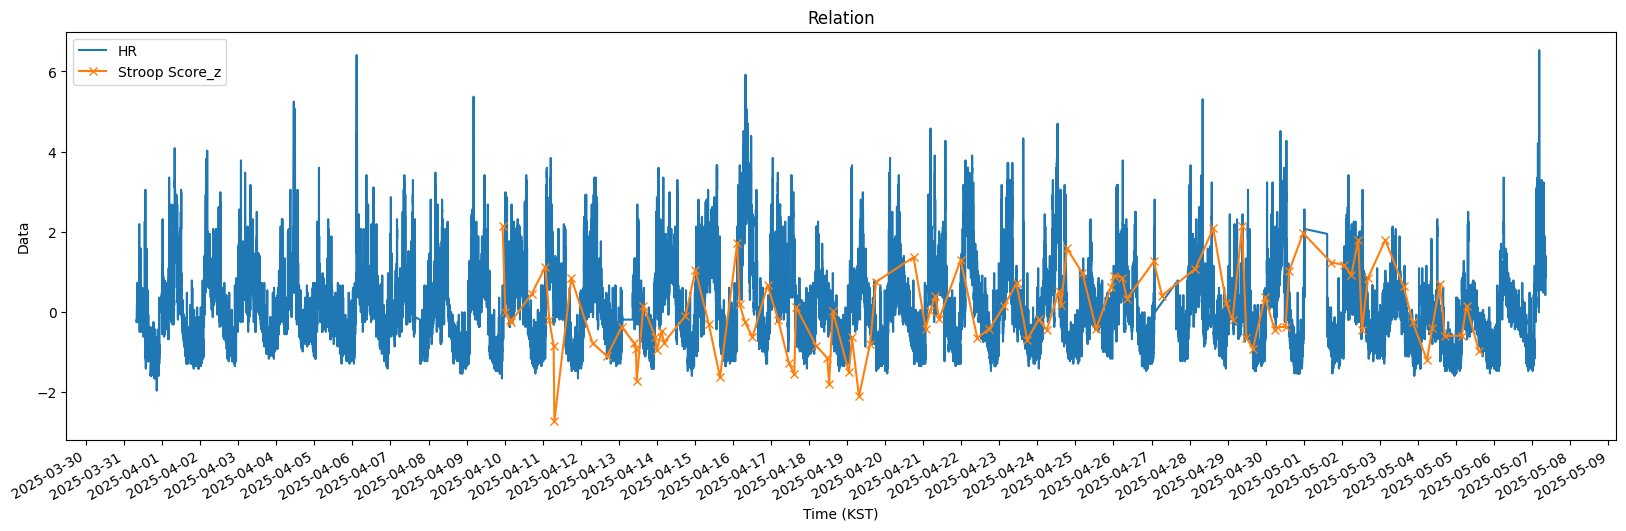

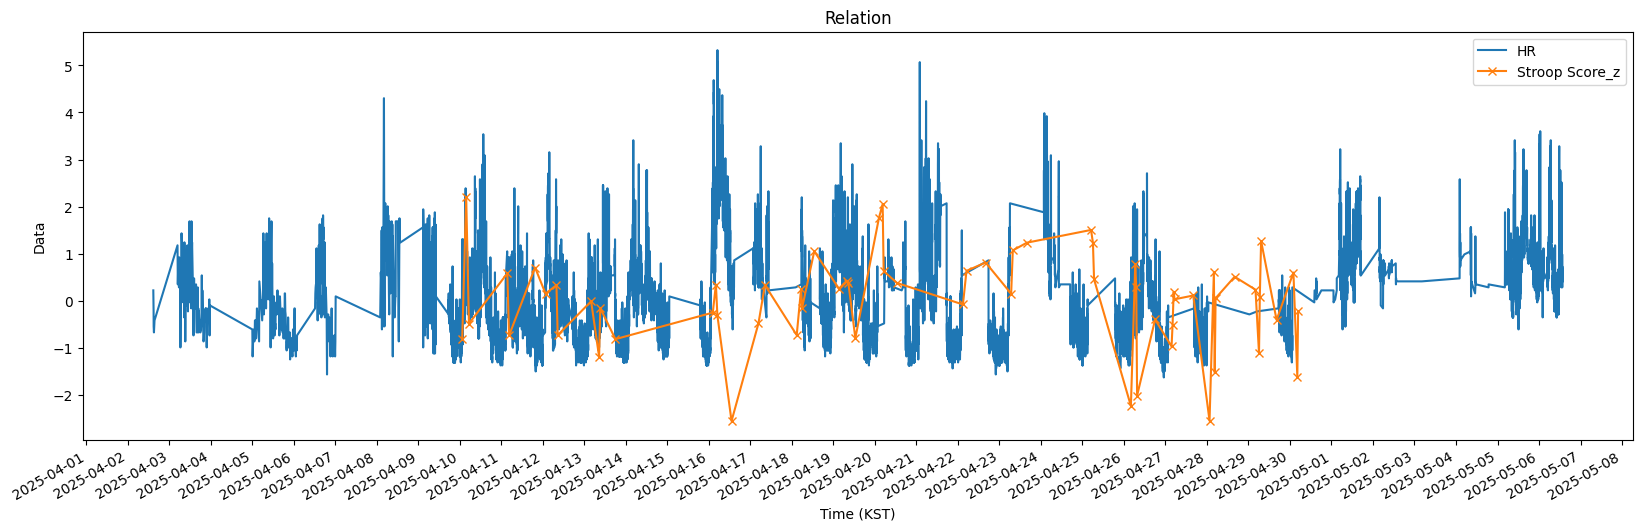

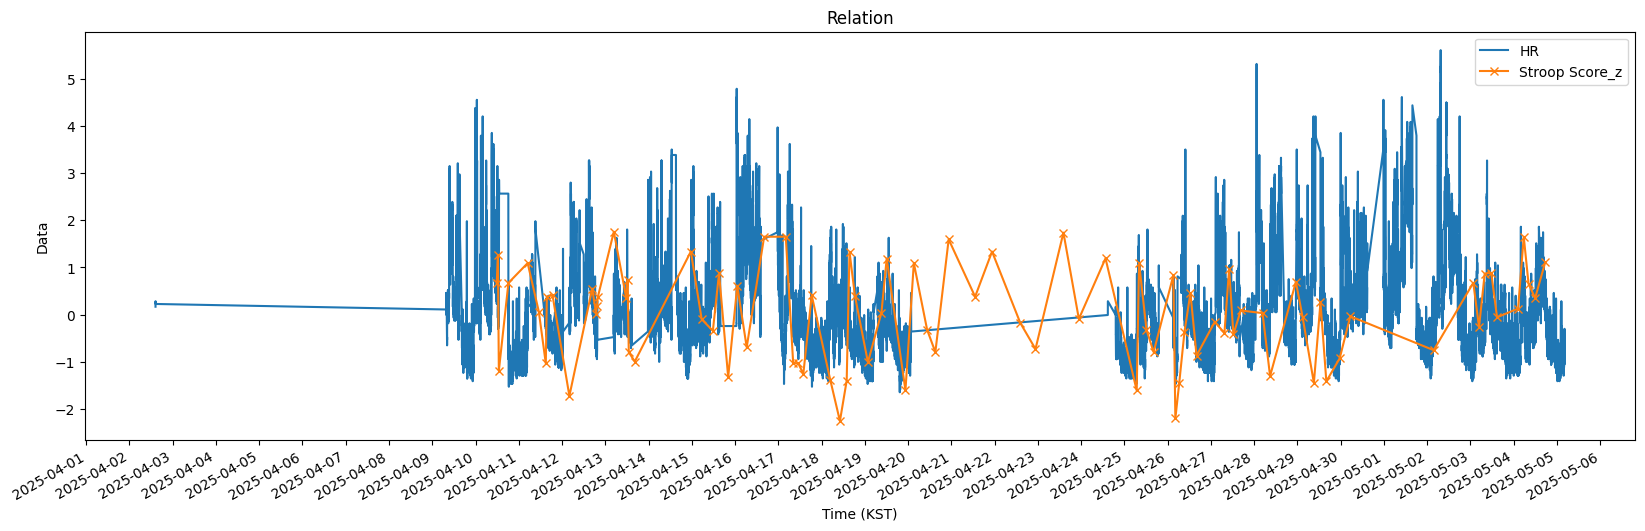

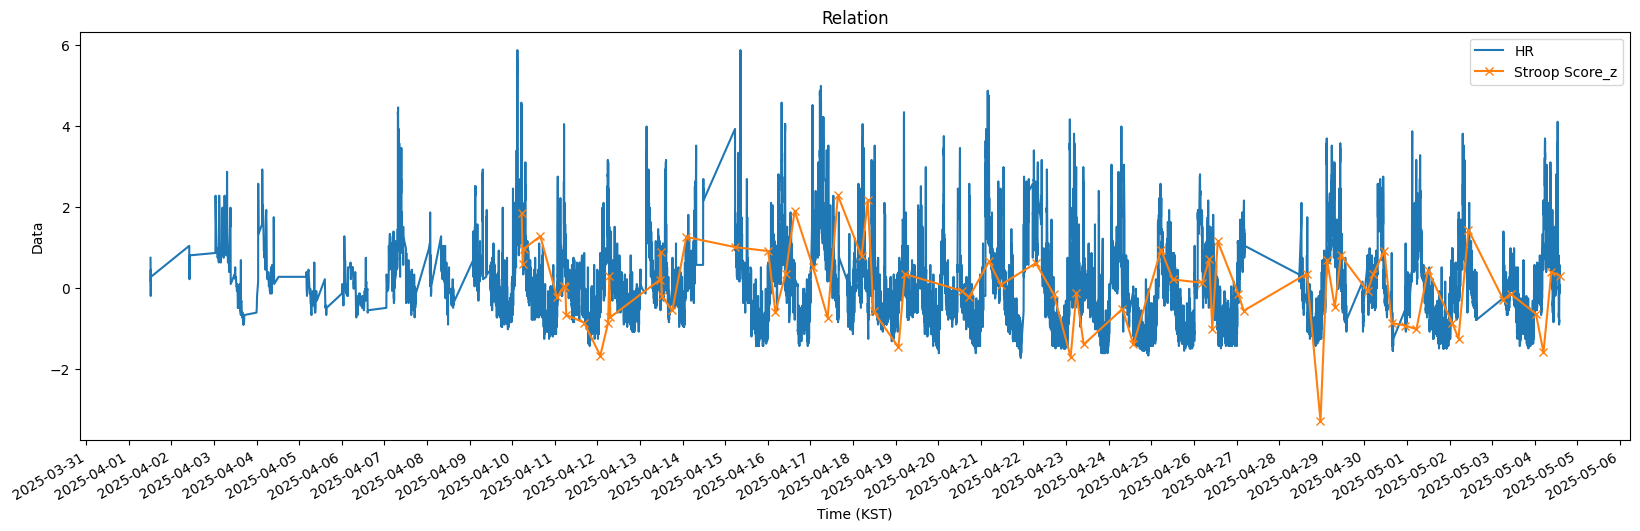

In [11]:
plot_multi(jaeha_p,jaeha_stroop_m,jaeha_c)
plot_multi(jiwoo_p,jiwoo_stroop_m,jiwoo_c)
plot_multi(dongho_p,dongho_stroop_m,dongho_c)
plot_multi(youngjoo_p,youngjoo_stroop_m,youngjoo_c)

In [12]:
import pandas as pd
import numpy as np

# 1) 집계 함수 정의

def hr_aggs(x):
    return {
        'hr_mean': x.mean() if len(x)>0 else np.nan,
        'hr_std':  x.std(ddof=0) if len(x)>1 else np.nan,
        'hr_min':  x.min() if len(x)>0 else np.nan,
        'hr_max':  x.max() if len(x)>0 else np.nan
    }

def stress_aggs(x):
    return {
        'str_mean': x.mean() if len(x)>0 else np.nan,
        'str_std':  x.std(ddof=0) if len(x)>1 else np.nan,
        'str_min':  x.min() if len(x)>0 else np.nan,
        'str_max':  x.max() if len(x)>0 else np.nan
    }

# 2) 최종 피처 생성 함수

def final_make(stroop, bio, caf):
    # 인구통계 정보는 반복 없이 한번만 추출
    demo = bio.loc[0, ['height', 'weight', 'sex', 'age', 'caffeine_freq', 'caffeine_size']]

    records = []
    for _, row in stroop.iterrows():
        test_time = row['time']            # Stroop 테스트 시각
        score     = row['Stroop_score_z']   # Stroop 점수

        # 30분 전 윈도우
        window_start = test_time - pd.Timedelta(minutes=30)
        window_end   = test_time

        # HR 집계
        hr_slice = bio.loc[
            bio['HR_Time_KST'].between(window_start, window_end), 'bpm_z']
        hr_feats = hr_aggs(hr_slice)

        # 스트레스 집계
        st_slice = bio.loc[
            bio['Stress_Time_KST'].between(window_start, window_end), 'stress_z']
        st_feats = stress_aggs(st_slice)

        # 수면: 날짜별 Duration (bio에 Sleep_date, Duration 칼럼이 있다고 가정)
        sleep_date = test_time.date()
        sleep_vals = bio.loc[bio['Sleep_date'] == sleep_date, 'Duration']
        sleep_hours = sleep_vals.max() if not sleep_vals.empty else np.nan

        # 카페인: 당일 테스트 이전 복용 여부 및 경과 시간
        caf_today    = caf[caf['Caffeine_time_KST'].dt.date == sleep_date]
        caf_before   = caf_today[caf_today['Caffeine_time_KST'] <= test_time]
        if not caf_before.empty:
            caffeine_flag   = 1
            last_time       = caf_before['Caffeine_time_KST'].max()
            elapsed_min     = (test_time - last_time).total_seconds() / 60.0
            caffeine        = caf_before['Caffeine'].sum()
            #print(caffeine)
        else:
            caffeine_flag   = 0
            elapsed_min     = -1
            caffeine        = 0

        # 레코드 조합 (scalar 값만 사용)
        rec = {
            'stroop_score':         score,
            'time':                 test_time,
            **hr_feats,
            **st_feats,
            'sleep_hours':          sleep_hours,
            'caffeine_flag':        caffeine_flag,
            'caffeine_elapsed_min': elapsed_min,
            'height':               demo['height'],
            'weight':               demo['weight'],
            'sex':                  demo['sex'],
            'age':                  demo['age'],
            'caffeine_freq':        demo['caffeine_freq'],
            'caffeine_size':        demo['caffeine_size'],
            'caffeine':             caffeine
        }
        records.append(rec)

    df_features = pd.DataFrame(records)
    #print(df_features.head())
    return df_features


In [13]:
jaeha_final = final_make(jaeha_stroop_m,jaeha_bio,jaeha_c)
jiwoo_final = final_make(jiwoo_stroop_m,jiwoo_bio,jiwoo_c)
dongho_final = final_make(dongho_stroop_m,dongho_bio,dongho_c)
youngjoo_final = final_make(youngjoo_stroop_m,youngjoo_bio,youngjoo_c)

import numpy as np
import numpy as np
import pandas as pd

def generate_series(df_clipped, df, value_col, time_col='time', window_minutes=30, freq='1min'):
    X = []
    window = pd.Timedelta(minutes=window_minutes)
    n_steps = window_minutes  # 1분 간격이니까 steps = minutes

    for t in df_clipped['time']:
        start_time = t - window
        end_time = t

        # 1. 원본에서 해당 window만 자르기
        ts = df[[time_col, value_col]].dropna().sort_values(time_col)
        ts_window = ts[(ts[time_col] >= start_time) & (ts[time_col] <= end_time)]

        # 2. 리샘플을 위한 전체 시간 프레임 생성
        time_index = pd.date_range(start=start_time, end=end_time, freq=freq)
        ts_window = ts_window.set_index(time_col).reindex(time_index).rename_axis(time_col)

        # 3. 선형 보간 후 결측은 0으로 대체
        ts_interp = ts_window.interpolate(method='time').fillna(0)

        # 4. 길이 고정 (부족하면 자르고, 초과해도 자름)
        values = ts_interp[value_col].values
        if len(values) != n_steps + 1:
            values = values[-(n_steps + 1):]  # 끝에서 n+1개 (start ~ end 포함)
        values = values[:-1]  # 마지막 시점은 제외 (t 시점 전까지만 사용)

        if len(values) < n_steps:
            # 앞쪽에 0을 패딩
            pad_width = n_steps - len(values)
            values = np.pad(values, (pad_width, 0))

        X.append(values)

    return np.stack(X)

def add_minute_of_day(df):
  # 1) 분 단위로 변환: 0~1439 정수
  df['minute_of_day'] = df['time'].dt.hour * 60 + df['time'].dt.minute

  # 2) (선택) 주기성을 반영하고 싶다면 사이클릭 인코딩
  # 하루가 1440분이므로 2π * minute/1440
  df['minute_sin'] = np.sin(2 * np.pi * df['minute_of_day'] / 1440)
  df['minute_cos'] = np.cos(2 * np.pi * df['minute_of_day'] / 1440)
  df = df.drop(['minute_of_day'],axis=1)
  return df

jaeha_final_clipped = jaeha_final.dropna()
jaeha_final_clipped = add_minute_of_day(jaeha_final_clipped)
jaeha_HR_series = generate_series(jaeha_final_clipped, jaeha_bio, 'bpm_z', 'HR_Time_KST', freq='1min')
#print(jaeha_HR_series)
#plt.plot(range(len(jaeha_HR_series[0])),jaeha_HR_series[0])
#plt.show()

jaeha_stress_series = generate_series(jaeha_final_clipped, jaeha_bio, 'stress_z', 'Stress_Time_KST', freq='1min')
#print(jaeha_stress_series)
#plt.plot(range(len(jaeha_stress_series[0])),jaeha_stress_series[0])
#plt.show()

#print(jaeha_HR_series.shape, jaeha_stress_series.shape)
jaeha_final_clipped.drop('time',axis=1,inplace=True)

conditions = [
    jaeha_final_clipped['stroop_score'] < -0.75,
    (jaeha_final_clipped['stroop_score'] >= -0.75) & (jaeha_final_clipped['stroop_score'] < -0.15),
    (jaeha_final_clipped['stroop_score'] >= -0.15) & (jaeha_final_clipped['stroop_score'] <= 0.15),
    (jaeha_final_clipped['stroop_score'] > 0.15) & (jaeha_final_clipped['stroop_score'] < 0.75),
    jaeha_final_clipped['stroop_score'] >= 0.75
]

choices = [0, 1, 2, 3, 4]

jaeha_final_clipped['stroop_score_cat_multi'] = np.select(conditions, choices)
jaeha_final_clipped['stroop_score_cat'] = (jaeha_final_clipped['stroop_score'] >=0).astype(int)
jaeha_final_reg = jaeha_final_clipped.drop(['stroop_score_cat','stroop_score_cat_multi'],axis=1)
jaeha_final_cat = jaeha_final_clipped.drop(['stroop_score','stroop_score_cat_multi'],axis=1)
jaeha_final_cat_multi = jaeha_final_clipped.drop(['stroop_score','stroop_score_cat'],axis=1)



jiwoo_final_clipped = jiwoo_final.dropna()
jiwoo_final_clipped = add_minute_of_day(jiwoo_final_clipped)
jiwoo_HR_series = generate_series(jiwoo_final_clipped, jiwoo_bio, 'bpm_z', 'HR_Time_KST', freq='1min')
#print(jiwoo_HR_series)
#plt.plot(range(len(jiwoo_HR_series[0])),jiwoo_HR_series[0])
#plt.show()

jiwoo_stress_series = generate_series(jiwoo_final_clipped, jiwoo_bio, 'stress_z', 'Stress_Time_KST', freq='1min')
#print(jiwoo_stress_series)
#plt.plot(range(len(jiwoo_stress_series[0])),jiwoo_stress_series[0])
#plt.show()

#print(jiwoo_HR_series.shape, jiwoo_stress_series.shape)
jiwoo_final_clipped.drop('time',axis=1,inplace=True)

conditions = [
    jiwoo_final_clipped['stroop_score'] < -0.75,
    (jiwoo_final_clipped['stroop_score'] >= -0.75) & (jiwoo_final_clipped['stroop_score'] < -0.15),
    (jiwoo_final_clipped['stroop_score'] >= -0.15) & (jiwoo_final_clipped['stroop_score'] <= 0.15),
    (jiwoo_final_clipped['stroop_score'] > 0.15) & (jiwoo_final_clipped['stroop_score'] < 0.75),
    jiwoo_final_clipped['stroop_score'] >= 0.75
]
choices = [0, 1, 2, 3, 4]
jiwoo_final_clipped['stroop_score_cat_multi'] = np.select(conditions, choices)
jiwoo_final_clipped['stroop_score_cat'] = (jiwoo_final_clipped['stroop_score'] >=0).astype(int)
jiwoo_final_reg = jiwoo_final_clipped.drop(['stroop_score_cat','stroop_score_cat_multi'],axis=1)
jiwoo_final_cat = jiwoo_final_clipped.drop(['stroop_score','stroop_score_cat_multi'],axis=1)
jiwoo_final_cat_multi = jiwoo_final_clipped.drop(['stroop_score','stroop_score_cat'],axis=1)




dongho_final_clipped = dongho_final.dropna()
dongho_final_clipped = add_minute_of_day(dongho_final_clipped)
dongho_HR_series = generate_series(dongho_final_clipped, dongho_bio, 'bpm_z', 'HR_Time_KST', freq='1min')
#print(dongho_HR_series)
#plt.plot(range(len(dongho_HR_series[0])),dongho_HR_series[0])
#plt.show()

dongho_stress_series = generate_series(dongho_final_clipped, dongho_bio, 'stress_z', 'Stress_Time_KST', freq='1min')
#print(dongho_stress_series)
#plt.plot(range(len(dongho_stress_series[0])),dongho_stress_series[0])
#plt.show()

#print(dongho_HR_series.shape, dongho_stress_series.shape)
dongho_final_clipped.drop('time',axis=1,inplace=True)

conditions = [
    dongho_final_clipped['stroop_score'] < -0.75,
    (dongho_final_clipped['stroop_score'] >= -0.75) & (dongho_final_clipped['stroop_score'] < -0.15),
    (dongho_final_clipped['stroop_score'] >= -0.15) & (dongho_final_clipped['stroop_score'] <= 0.15),
    (dongho_final_clipped['stroop_score'] > 0.15) & (dongho_final_clipped['stroop_score'] < 0.75),
    dongho_final_clipped['stroop_score'] >= 0.75
]
choices = [0, 1, 2, 3, 4]
dongho_final_clipped['stroop_score_cat_multi'] = np.select(conditions, choices)
dongho_final_clipped['stroop_score_cat'] = (dongho_final_clipped['stroop_score'] >=0).astype(int)


dongho_final_reg = dongho_final_clipped.drop(['stroop_score_cat','stroop_score_cat_multi'],axis=1)
dongho_final_cat = dongho_final_clipped.drop(['stroop_score','stroop_score_cat_multi'],axis=1)
dongho_final_cat_multi = dongho_final_clipped.drop(['stroop_score','stroop_score_cat'],axis=1)


youngjoo_final_clipped = youngjoo_final.dropna()
youngjoo_final_clipped = add_minute_of_day(youngjoo_final_clipped)
youngjoo_HR_series = generate_series(youngjoo_final_clipped, youngjoo_bio, 'bpm_z', 'HR_Time_KST', freq='1min')
#print(youngjoo_HR_series)
#plt.plot(range(len(youngjoo_HR_series[0])),youngjoo_HR_series[0])
#plt.show()

youngjoo_stress_series = generate_series(youngjoo_final_clipped, youngjoo_bio, 'stress_z', 'Stress_Time_KST', freq='1min')
#print(youngjoo_stress_series)
#plt.plot(range(len(youngjoo_stress_series[0])),youngjoo_stress_series[0])
#plt.show()

#print(youngjoo_HR_series.shape, youngjoo_stress_series.shape)
youngjoo_final_clipped.drop('time',axis=1,inplace=True)

conditions = [
    youngjoo_final_clipped['stroop_score'] < -0.75,
    (youngjoo_final_clipped['stroop_score'] >= -0.75) & (youngjoo_final_clipped['stroop_score'] < -0.15),
    (youngjoo_final_clipped['stroop_score'] >= -0.15) & (youngjoo_final_clipped['stroop_score'] <= 0.15),
    (youngjoo_final_clipped['stroop_score'] > 0.15) & (youngjoo_final_clipped['stroop_score'] < 0.75),
    youngjoo_final_clipped['stroop_score'] >= 0.75
]
choices = [0, 1, 2, 3, 4]
youngjoo_final_clipped['stroop_score_cat_multi'] = np.select(conditions, choices)
youngjoo_final_clipped['stroop_score_cat'] = (youngjoo_final_clipped['stroop_score'] >=0).astype(int)


youngjoo_final_reg = youngjoo_final_clipped.drop(['stroop_score_cat','stroop_score_cat_multi'],axis=1)
youngjoo_final_cat = youngjoo_final_clipped.drop(['stroop_score','stroop_score_cat_multi'],axis=1)
youngjoo_final_cat_multi = youngjoo_final_clipped.drop(['stroop_score','stroop_score_cat'],axis=1)


people_list = ['jaeha','jiwoo','dongho','youngjoo']
static_columns = ['hr_min','hr_mean','hr_max','hr_std','str_min','str_mean','str_max','str_std','height','weight','sex','age','caffeine_freq','caffeine_size','caffeine_flag','caffeine_elapsed_min','caffeine','sleep_hours','minute_sin','minute_cos']
#static_columns = ['hr_min','caffeine_flag','caffeine','minute_sin']

all_seq = []
all_static = []
all_y_multi = []
all_y_cat=[]
all_y_reg=[]

for person in people_list:
    seq = np.stack([globals()[f"{person}_HR_series"], globals()[f"{person}_stress_series"]], axis=-1)
    static = globals()[f"{person}_final_cat"][static_columns].to_numpy()
    y = globals()[f"{person}_final_cat_multi"]['stroop_score_cat_multi'].to_numpy()
    y_cat = globals()[f"{person}_final_cat"]['stroop_score_cat'].to_numpy()
    y_reg = globals()[f"{person}_final_reg"]['stroop_score'].to_numpy()

    # 샘플 수를 기준으로 반복하며 하나씩 쌓기
    all_seq.append(seq)
    all_static.append(static)
    all_y_multi.append(y)
    all_y_cat.append(y_cat)
    all_y_reg.append(y_reg)

# 병합
X_seq = np.concatenate(all_seq, axis=0)       # (샘플 총합, 30, 2)
X_static = np.concatenate(all_static, axis=0) # (샘플 총합, 10)
y_multi = np.concatenate(all_y_multi, axis=0)
y_cat = np.concatenate(all_y_cat, axis=0)
y_reg = np.concatenate(all_y_reg, axis=0)

def fill_na(df):
    cols_to_fill = [col for col in df.columns]
    df[cols_to_fill] = df[cols_to_fill].apply(lambda x: x.fillna(x.mean()))
    return df

#jaeha_final = fill_na(jaeha_final)
#jiwoo_final = fill_na(jiwoo_final)
#dongho_final = fill_na(dongho_final)
#youngjoo_final = fill_na(youngjoo_final)

merged_data_reg = pd.concat([jaeha_final_reg, jiwoo_final_reg, dongho_final_reg,youngjoo_final_reg], ignore_index=True) 
merged_data_cat = pd.concat([jaeha_final_cat, jiwoo_final_cat, dongho_final_cat,youngjoo_final_cat], ignore_index=True) 
merged_data_multi = pd.concat([jaeha_final_cat_multi, jiwoo_final_cat_multi, dongho_final_cat_multi, youngjoo_final_cat_multi], ignore_index=True) #다중 분류류

#merged_data = add_minute_of_day(merged_data)
merged_data_multi.to_csv('data.csv', index=False)

# X_seq, X_static, y_multi를 하나의 DataFrame으로 합치기
# X_seq는 30분 시계열 데이터이므로 각 시점과 특성을 컬럼으로 펼침
seq_columns = [f'seq_t{t}_f{f}' for t in range(30) for f in range(2)]
X_seq_flat = X_seq.reshape(X_seq.shape[0], -1)
seq_df = pd.DataFrame(X_seq_flat, columns=seq_columns)

# X_static 데이터를 DataFrame으로 변환
static_df = pd.DataFrame(X_static, columns=static_columns)

# y_multi를 DataFrame으로 변환
y_df = pd.DataFrame(y_multi, columns=['target'])

# 모든 데이터 합치기
combined_df = pd.concat([seq_df, static_df, y_df], axis=1)

# 저장
combined_df.to_csv('combined_data.csv', index=False)

C:\Users\613ja\AppData\Local\Temp\ipykernel_35184\173047564.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['minute_of_day'] = df['time'].dt.hour * 60 + df['time'].dt.minute
C:\Users\613ja\AppData\Local\Temp\ipykernel_35184\173047564.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['minute_sin'] = np.sin(2 * np.pi * df['minute_of_day'] / 1440)
C:\Users\613ja\AppData\Local\Temp\ipykernel_35184\173047564.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

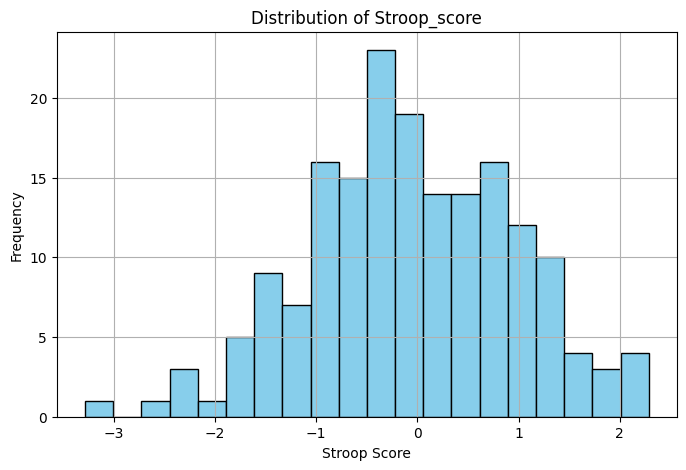

In [14]:
import matplotlib.pyplot as plt

# 히스토그램 시각화
plt.figure(figsize=(8, 5))
plt.hist(merged_data_reg['stroop_score'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Stroop_score')
plt.xlabel('Stroop Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Reshape

# 시계열 입력 (30분, 2개 지표)
seq_input = Input(shape=(30, 2))

# CNN 블록
cnn = Conv1D(64, kernel_size=5, activation='relu', padding='same')(seq_input)
cnn = MaxPooling1D(pool_size=2)(cnn)

# LSTM 블록
x = LSTM(64, return_sequences=True)(cnn)
x = LSTM(32)(x)
x = Dropout(0.3)(x)

# 정적 입력
static_input = Input(shape=(len(static_columns)-6,))
s = Dense(32, activation='relu')(static_input)
s = BatchNormalization()(s)
s = Dropout(0.3)(s)

# 병합
merged = Concatenate()([x,s])
dense = Dense(64, activation='relu')(merged)
#dense = Dense(32, activation='relu')(dense)
dense = Dropout(0.3)(dense)

# 다중분류 (향상/유지/하락 등)
output = Dense(5, activation='softmax')(dense) 
# 이진 분류류
#output = Dense(1, activation='sigmoid')(dense)

model = Model(inputs=[seq_input, static_input], outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # 다중 분류
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # 이진 분류

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 30, 2)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 30, 64)    │        704 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 15, 64)    │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 14)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 15, 64)    │     33,024 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │        480 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 32)        │     12,416 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 32)        │        128 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 32)        │          0 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 32)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64)        │          0 │ dropout[0][0],    │
│ (Concatenate)       │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      4,160 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 5)         │        325 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 51,237 (200.14 KB)

 Trainable params: 51,173 (199.89 KB)

 Non-trainable params: 64 (256.00 B)

In [16]:
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
synth_data = pd.read_csv('synth_combined_data_v2.csv')

# 시계열 데이터 컬럼 추출
seq_cols = [col for col in synth_data.columns if col.startswith('seq_t') and ('f0' in col or 'f1' in col)]

# f0, f1 시계열 데이터 분리
f0_cols = [col for col in seq_cols if 'f0' in col]
f1_cols = [col for col in seq_cols if 'f1' in col]

# 시계열 데이터 생성
f0_series = synth_data[f0_cols].values
f1_series = synth_data[f1_cols].values

# 시계열 데이터 스택
seq_data = np.stack([f0_series, f1_series], axis=-1)

# 타겟 데이터 5개 구간으로 나누기
target = synth_data['target']
target_bins = pd.qcut(target, q=5, labels=[0,1,2,3,4])
# 카테고리형에서 숫자형으로 변환
target_bins = target_bins.astype(int)


# 정적 데이터 컬럼 추출 (시계열, 타겟 제외)
static_cols = [col for col in synth_data.columns if not col.startswith('seq_t') and col != 'target']
static_data = synth_data[static_cols]
#static_data = static_data.drop(['height','weight'],axis=1)

# 정적 데이터 정규화
scaler = StandardScaler()
static_scaled = scaler.fit_transform(static_data)

print("시계열 데이터 형태:", seq_data.shape)
print("정적 데이터 형태:", static_scaled.shape) 
print("타겟 클래스 분포:\n", target_bins.value_counts())



시계열 데이터 형태: (177, 30, 2)
정적 데이터 형태: (177, 20)
타겟 클래스 분포:
 target
0    36
4    36
1    35
2    35
3    35
Name: count, dtype: int64


STIXSizeFourSym
STIXGeneral
DejaVu Serif
cmtt10
STIXNonUnicode
DejaVu Sans
DejaVu Serif
STIXGeneral
DejaVu Serif
DejaVu Sans Mono
STIXSizeThreeSym
STIXSizeOneSym
cmr10
STIXSizeOneSym
STIXSizeThreeSym
STIXNonUnicode
STIXNonUnicode
cmss10
DejaVu Sans Display
cmmi10
STIXNonUnicode
DejaVu Serif Display
STIXSizeTwoSym
STIXSizeFiveSym
cmex10
DejaVu Sans Mono
DejaVu Sans
DejaVu Sans Mono
STIXGeneral
DejaVu Sans
cmb10
STIXSizeFourSym
cmsy10
DejaVu Sans Mono
STIXGeneral
DejaVu Serif
STIXSizeTwoSym
DejaVu Sans
HCR Batang Ext
NewJumja
Lucida Calligraphy
Sylfaen
Britannic Bold
Consolas
Agency FB
Malgun Gothic
Han Santteut Dotum
Palace Script MT
Franklin Gothic Demi
Times New Roman
Colonna MT
Consolas
MV Boli
Goudy Old Style
Tempus Sans ITC
Ink Free
Trebuchet MS
Palatino Linotype
Tw Cen MT
Segoe UI Emoji
HYGothic-Medium
Lucida Sans Typewriter
Calibri
Segoe UI Variable
HyhwpEQ
Ami R
Franklin Gothic Demi
HYPost-Medium
Bodoni MT
Hancom Hoonminjeongeum_H
Leelawadee UI
Hancom Hoonminjeongeum_V
Microsoft

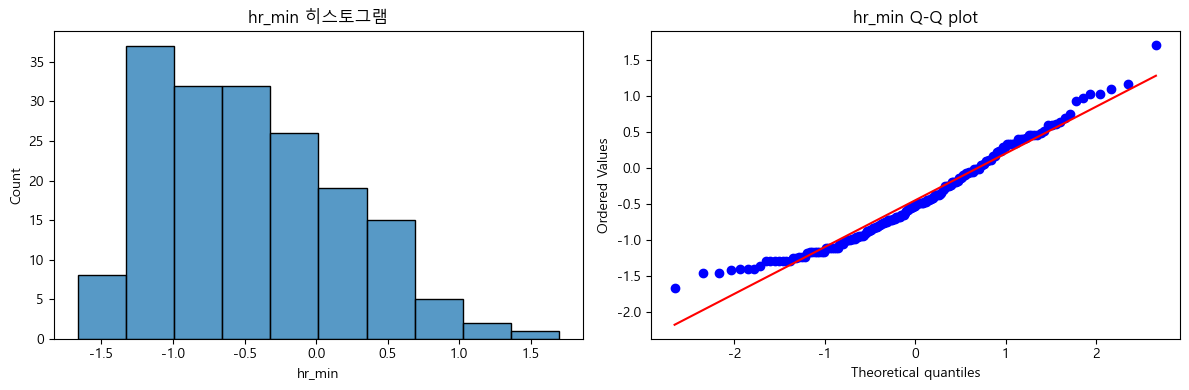


hr_mean:
통계량: 25.6089
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


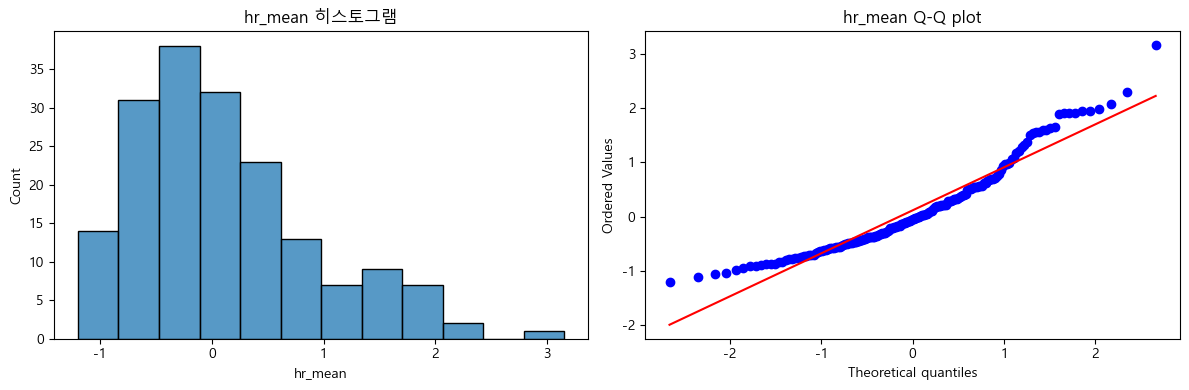


hr_max:
통계량: 38.9174
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


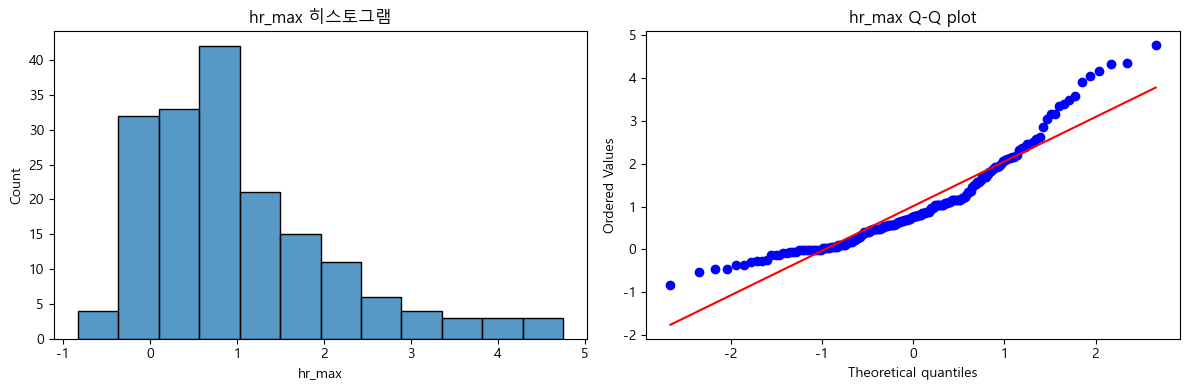


hr_std:
통계량: 69.8879
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


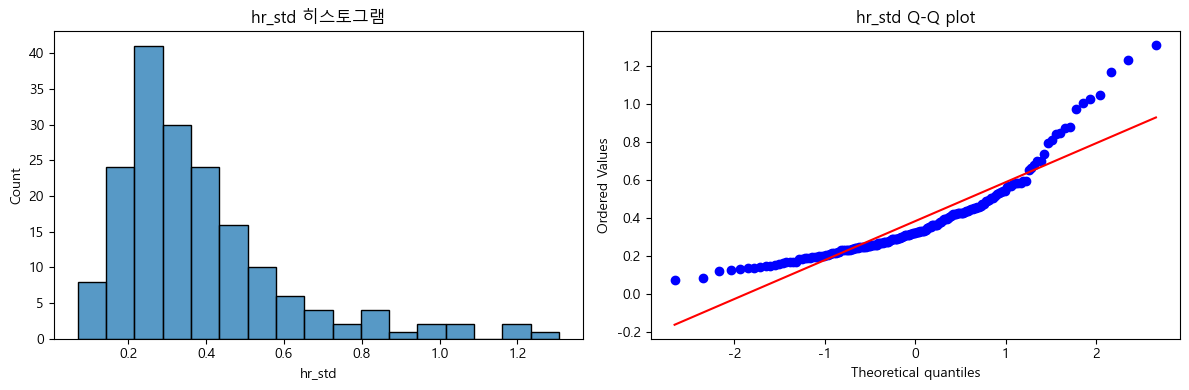


str_min:
통계량: 21.5829
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


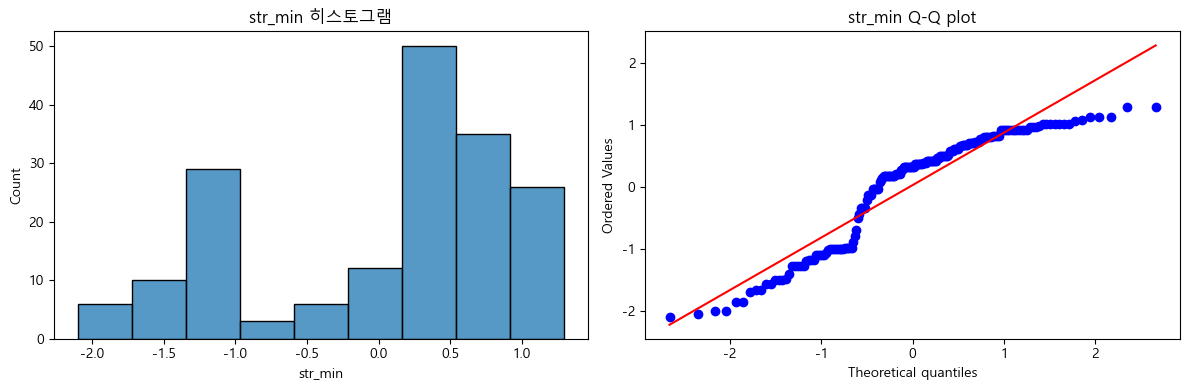


str_mean:
통계량: 22.4848
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


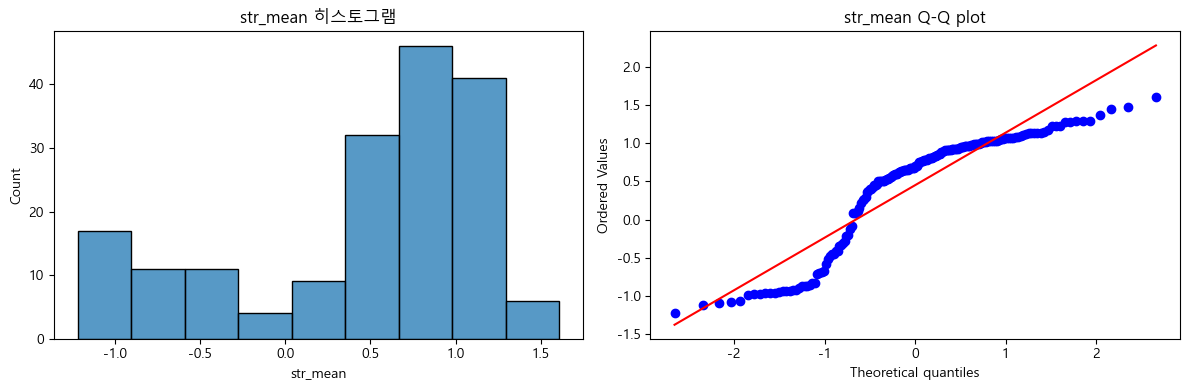


str_max:
통계량: 30.9601
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


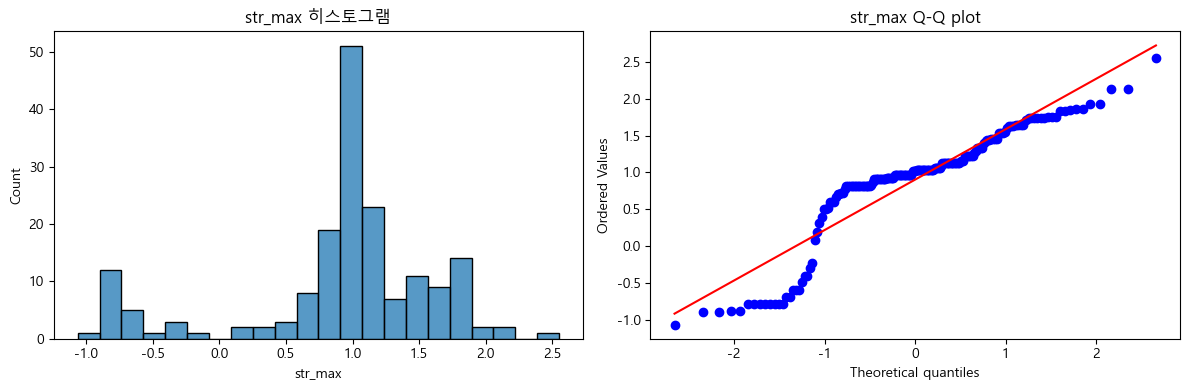


str_std:
통계량: 35.0773
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


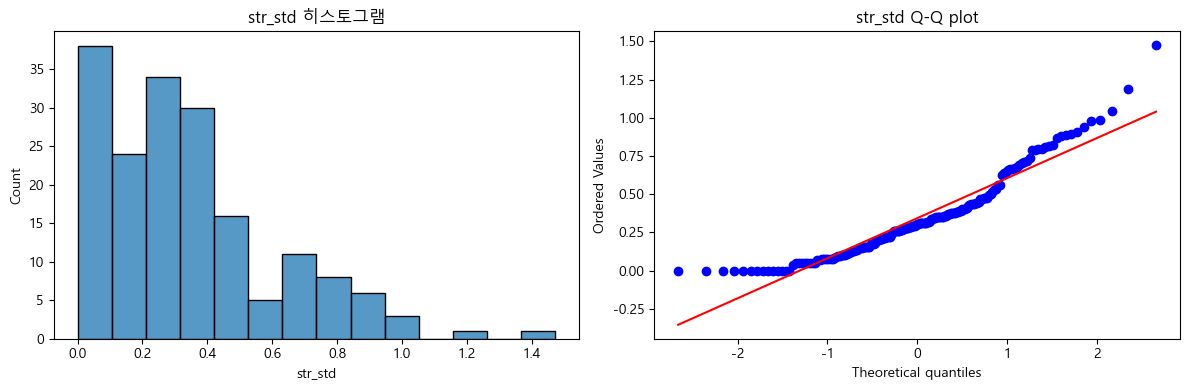


height:
통계량: 77.0053
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


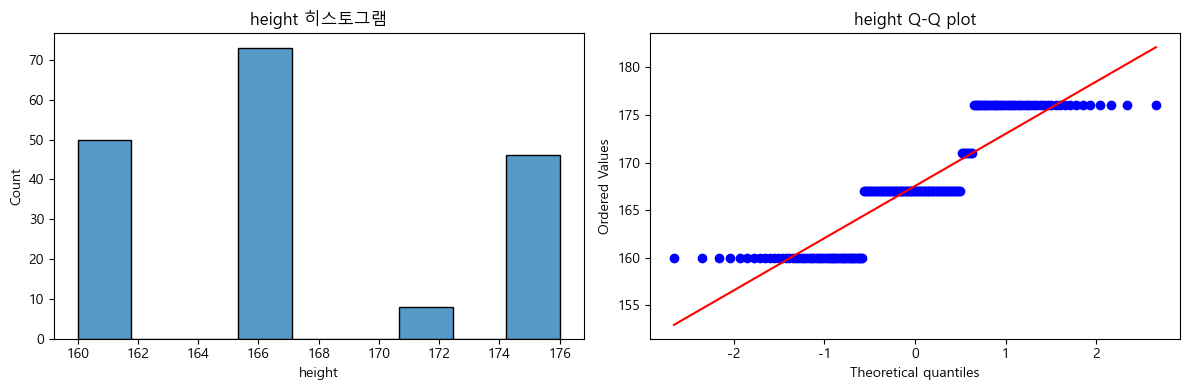


weight:
통계량: 55.1170
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


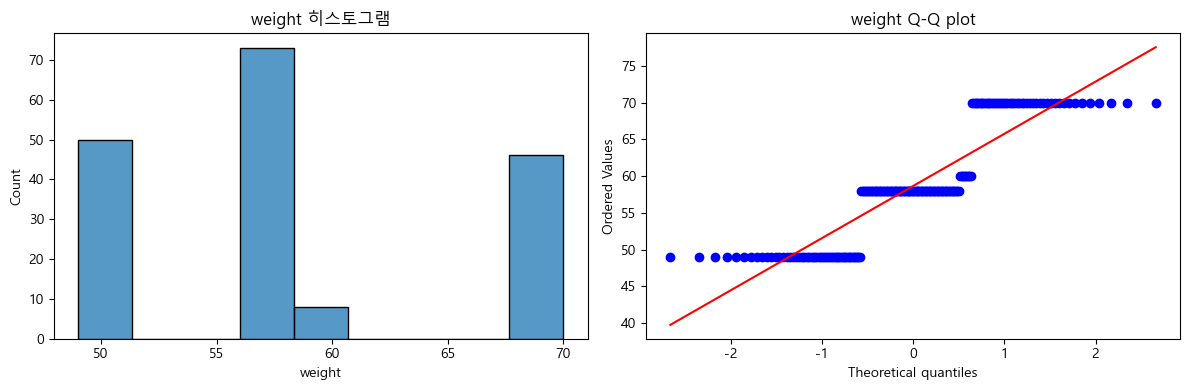


sex:
통계량: 854.7031
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


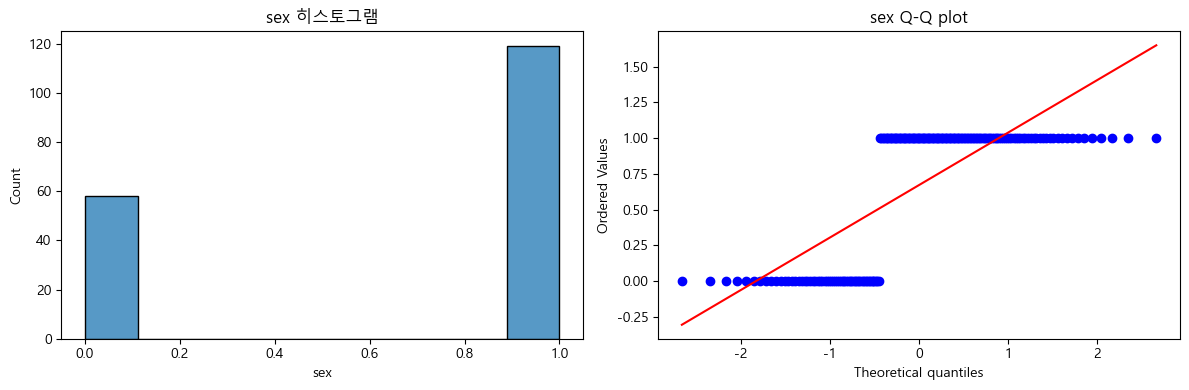


age:
통계량: 61.7163
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


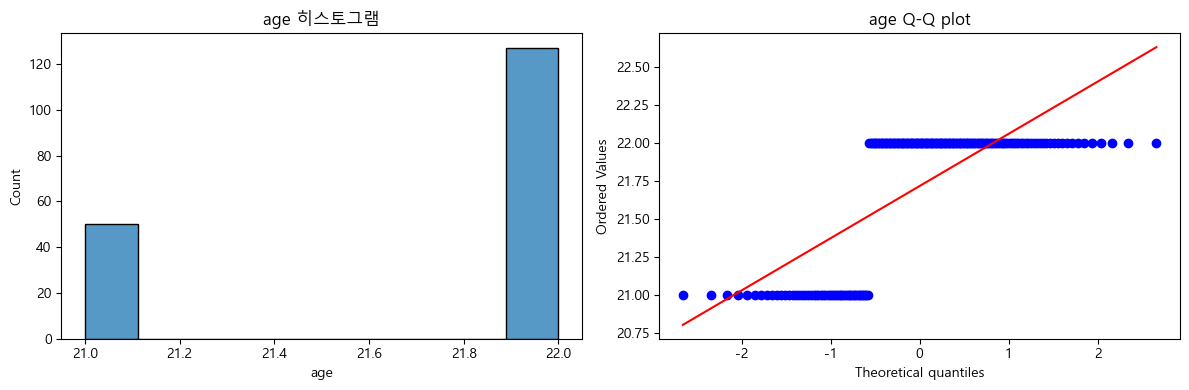


caffeine_freq:
통계량: 1902.9636
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


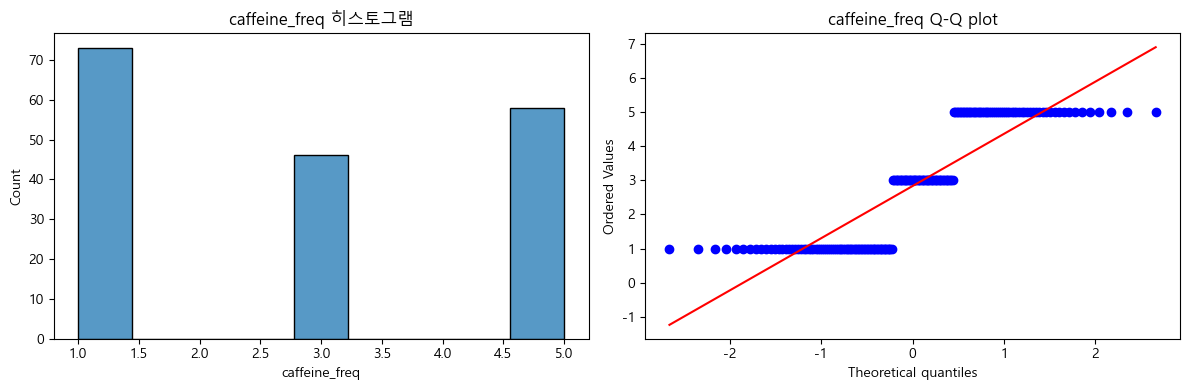


caffeine_size:
통계량: 1869.6847
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


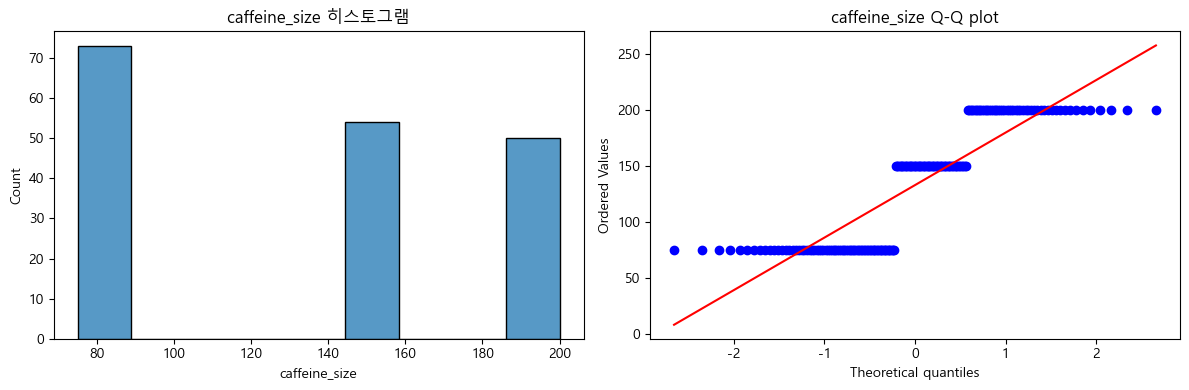


caffeine_flag:
통계량: 37.4328
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


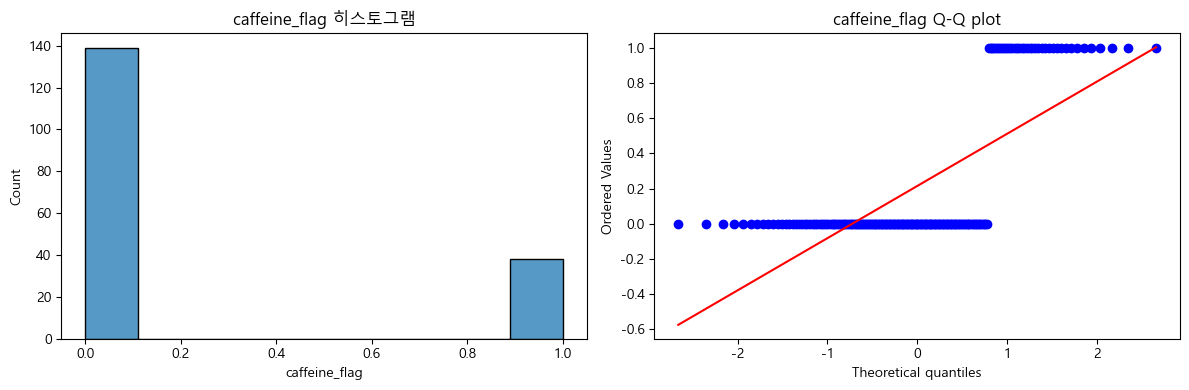


caffeine_elapsed_min:
통계량: 159.7653
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


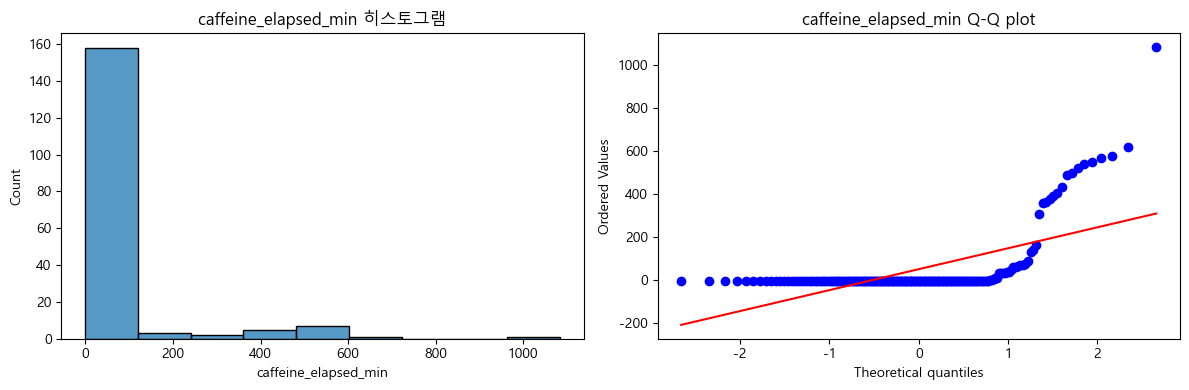


caffeine:
통계량: 72.0788
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


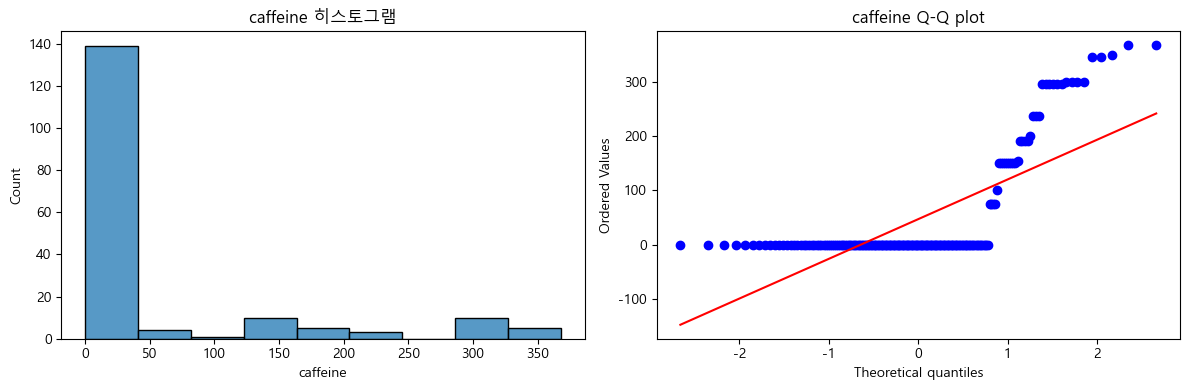


sleep_hours:
통계량: 2.9679
p-value: 0.2267
정규분포 여부: 정규분포를 따름


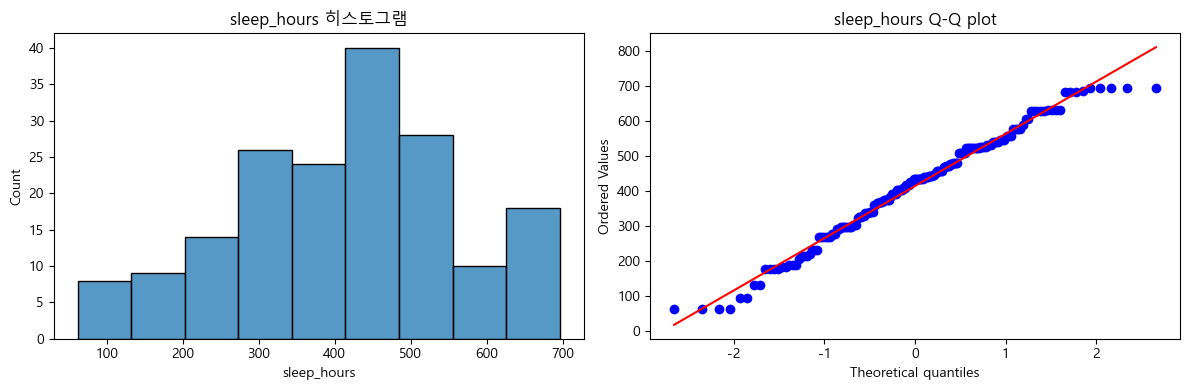


minute_sin:
통계량: 81.7112
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


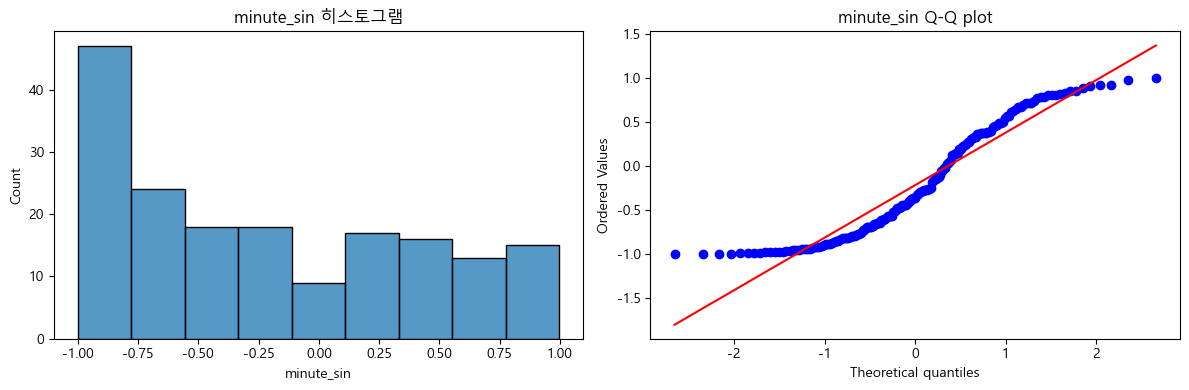


minute_cos:
통계량: 1816.7783
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


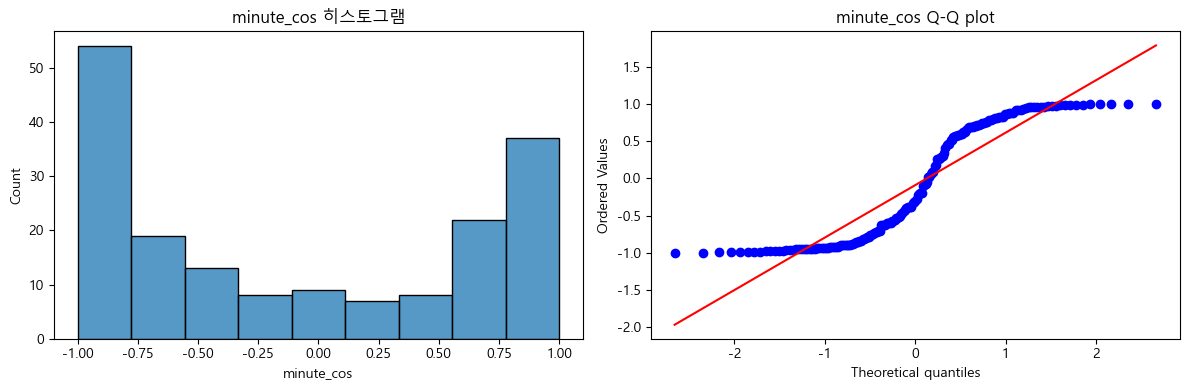


=== Target 정규성 검정 결과 ===

target_bins:
통계량: 156.2078
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


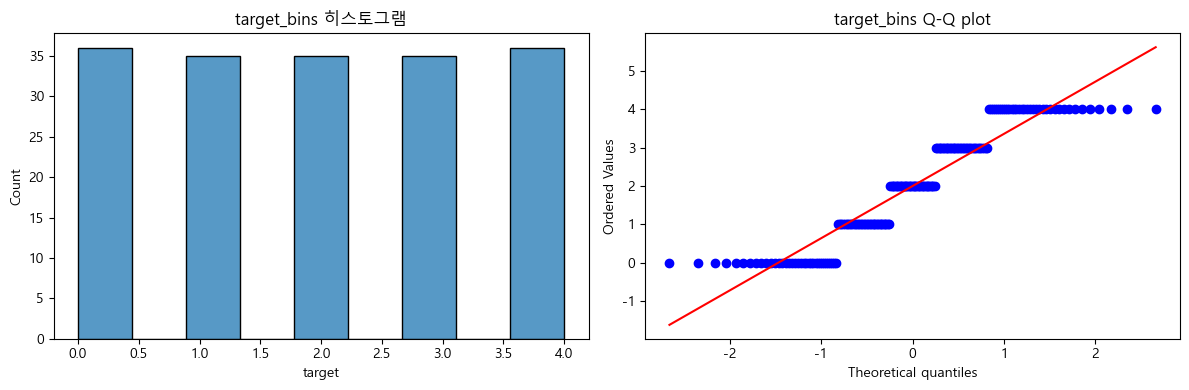


=== 로그 변환 후 정규성 검정 결과 ===

hr_min:
통계량: 8.0135
p-value: 0.0182
정규분포 여부: 정규분포를 따르지 않음


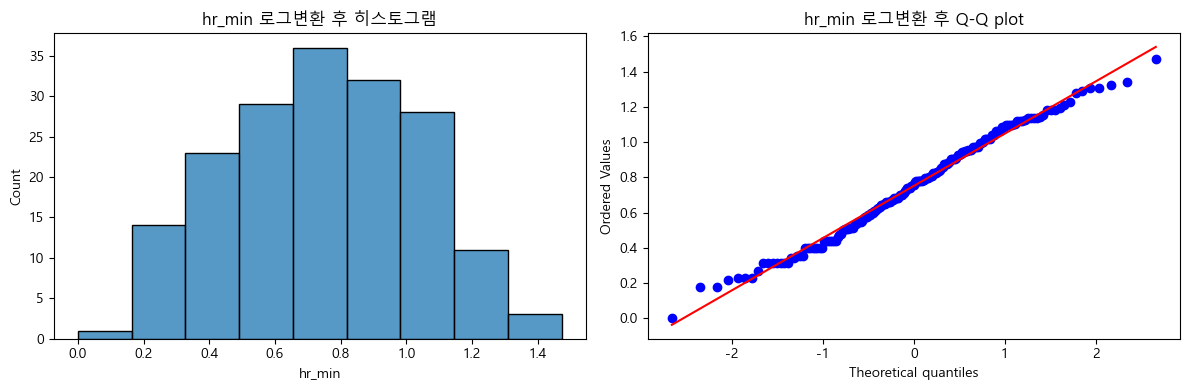


hr_mean:
통계량: 3.6853
p-value: 0.1584
정규분포 여부: 정규분포를 따름
hr_mean 컬럼에 로그 변환 적용됨


C:\Users\613ja\AppData\Local\Temp\ipykernel_35184\138836207.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  static_data[col] = static_data_log[col]


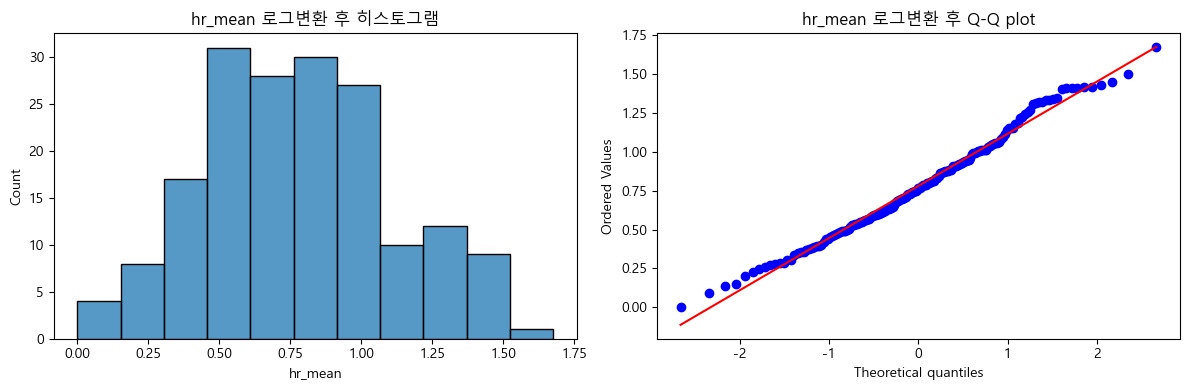


hr_max:
통계량: 3.3369
p-value: 0.1885
정규분포 여부: 정규분포를 따름
hr_max 컬럼에 로그 변환 적용됨


C:\Users\613ja\AppData\Local\Temp\ipykernel_35184\138836207.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  static_data[col] = static_data_log[col]


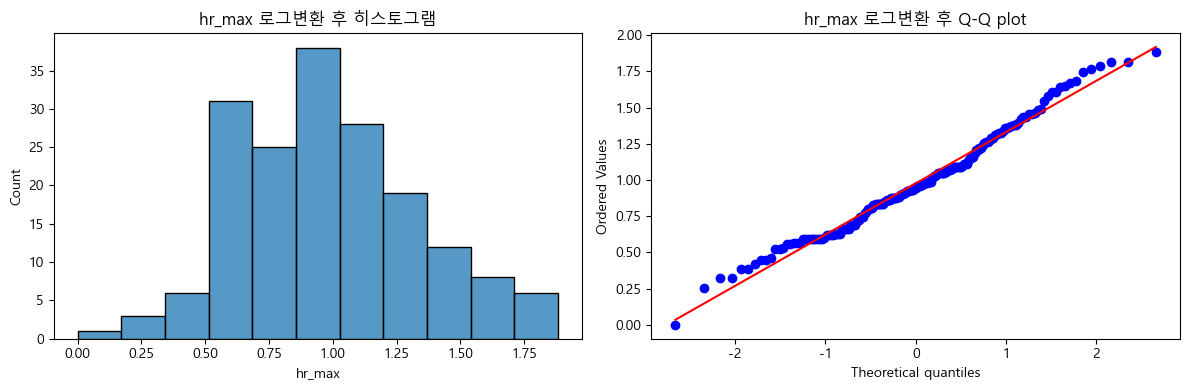


hr_std:
통계량: 1.2995
p-value: 0.5222
정규분포 여부: 정규분포를 따름
hr_std 컬럼에 로그 변환 적용됨


C:\Users\613ja\AppData\Local\Temp\ipykernel_35184\138836207.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  static_data[col] = static_data_log[col]


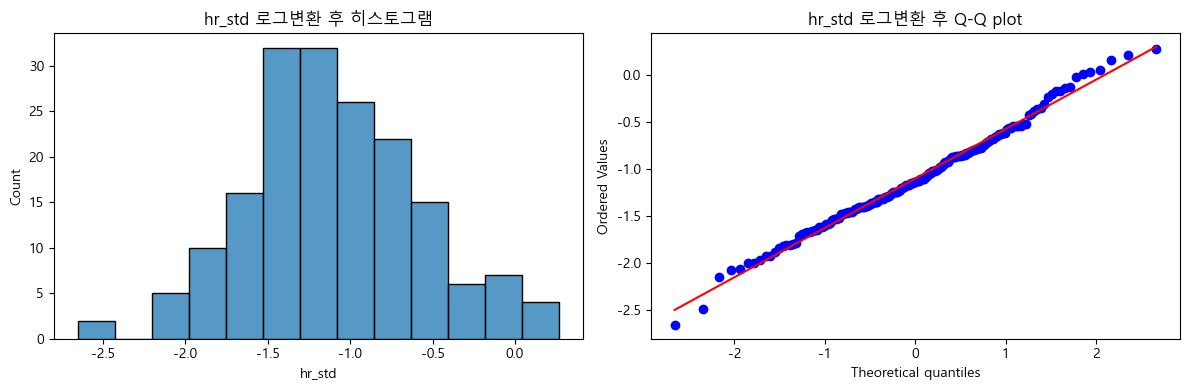


str_min:
통계량: 33.3171
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


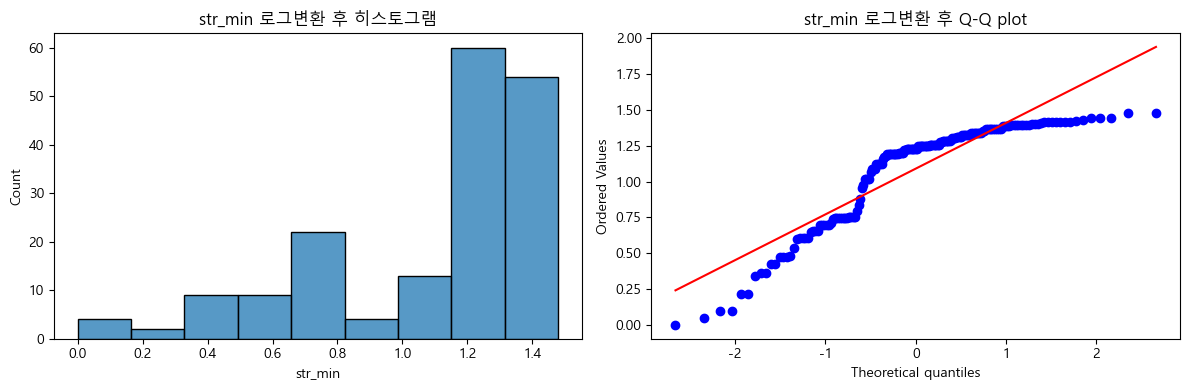


str_mean:
통계량: 31.9170
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


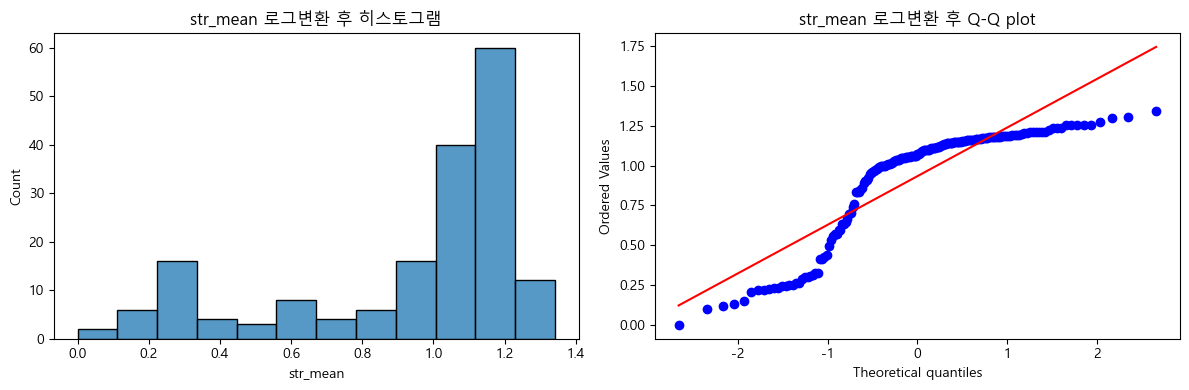


str_max:
통계량: 62.8937
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


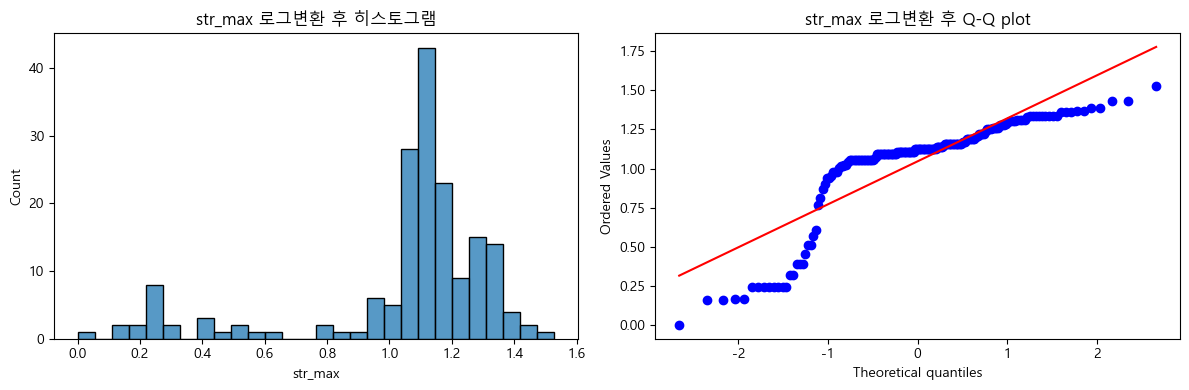


str_std:
통계량: 10.7364
p-value: 0.0047
정규분포 여부: 정규분포를 따르지 않음


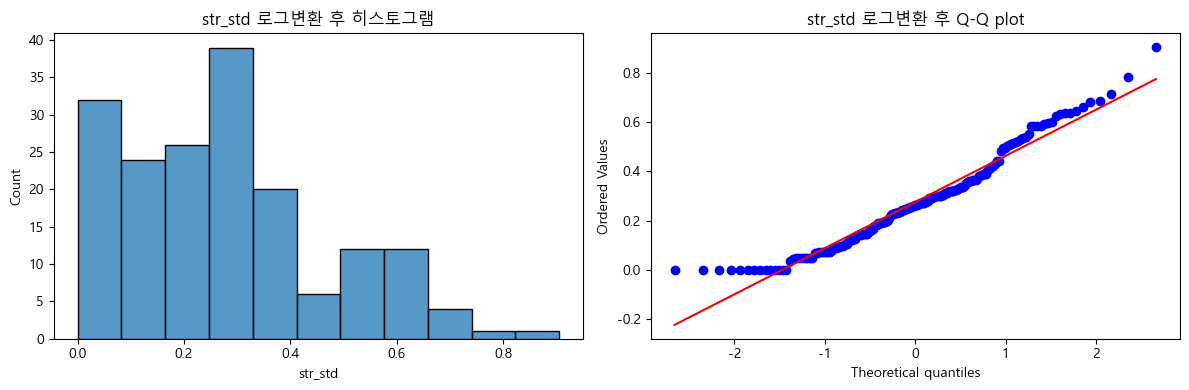


height:
통계량: 78.9527
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


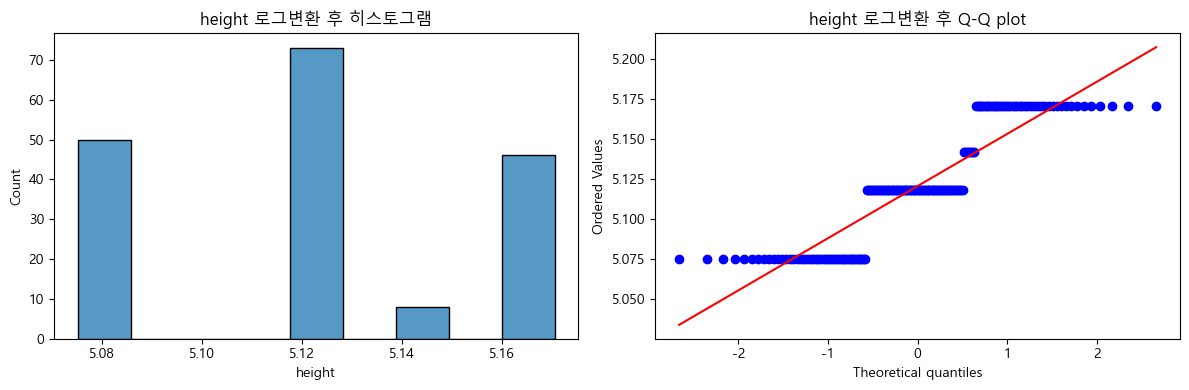


weight:
통계량: 61.4916
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


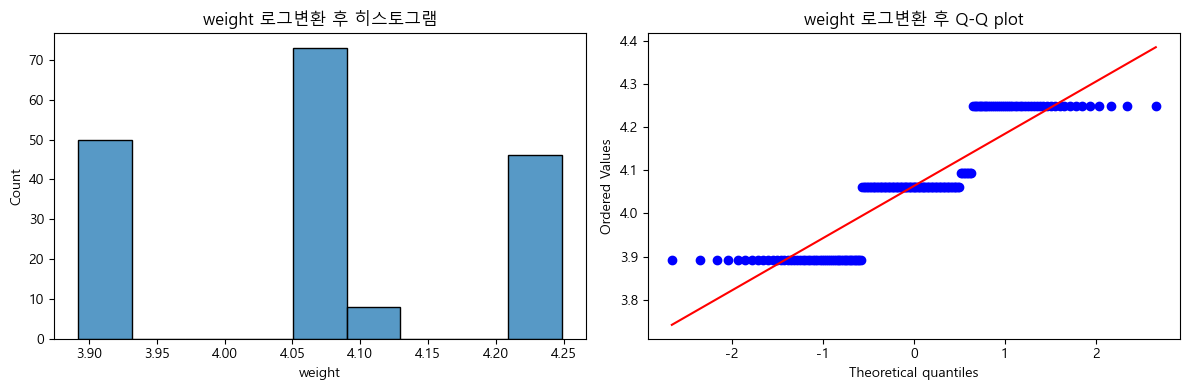


sex:
통계량: 854.7031
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


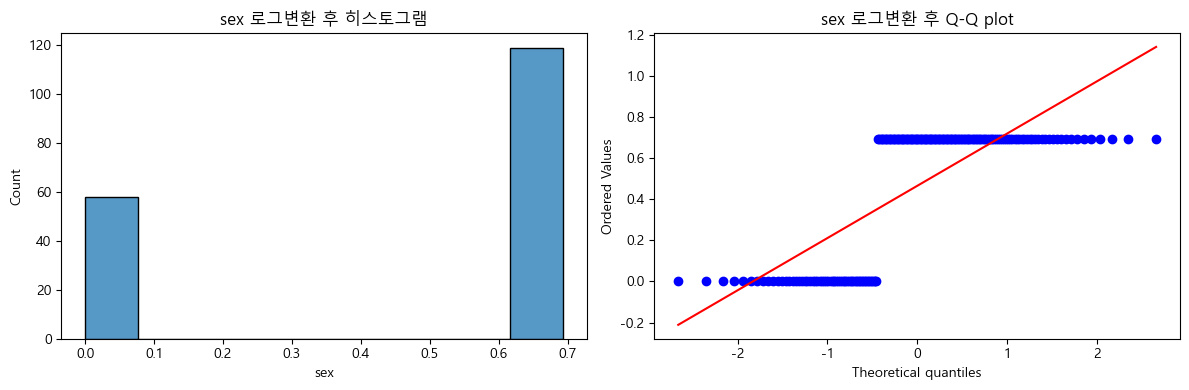


age:
통계량: 61.7163
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


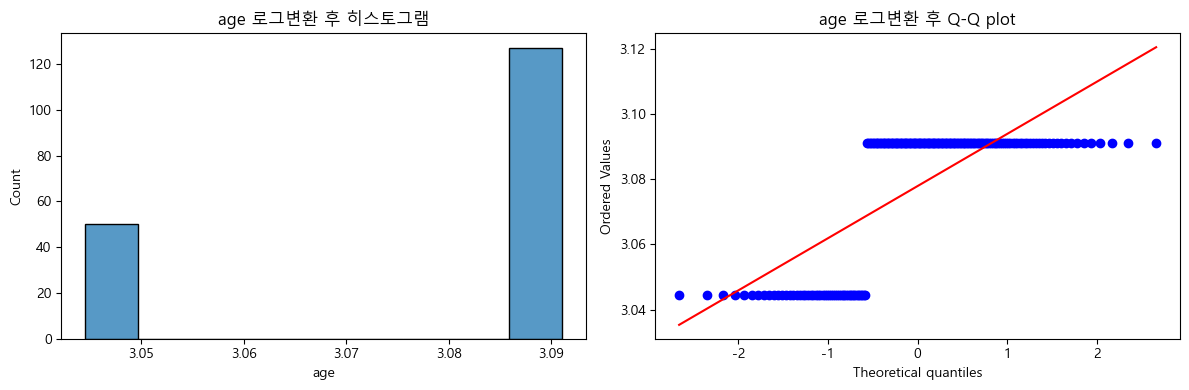


caffeine_freq:
통계량: 1334.8328
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


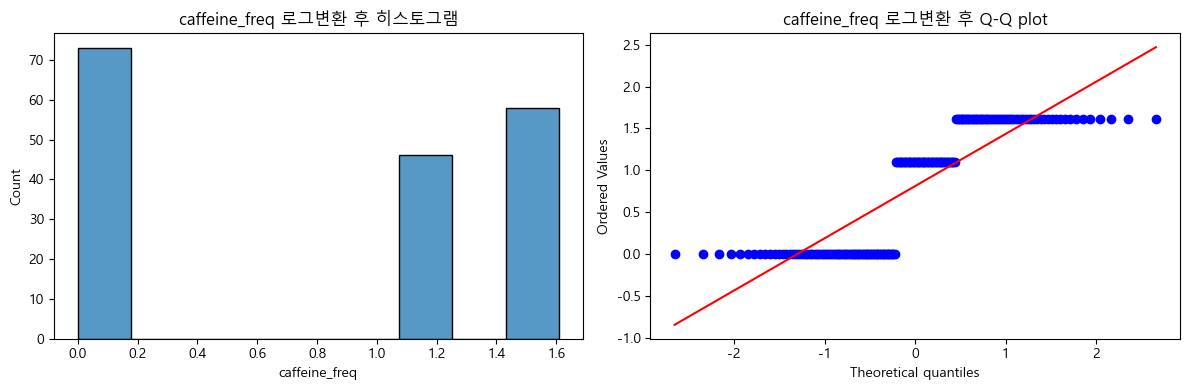


caffeine_size:
통계량: 1362.6173
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


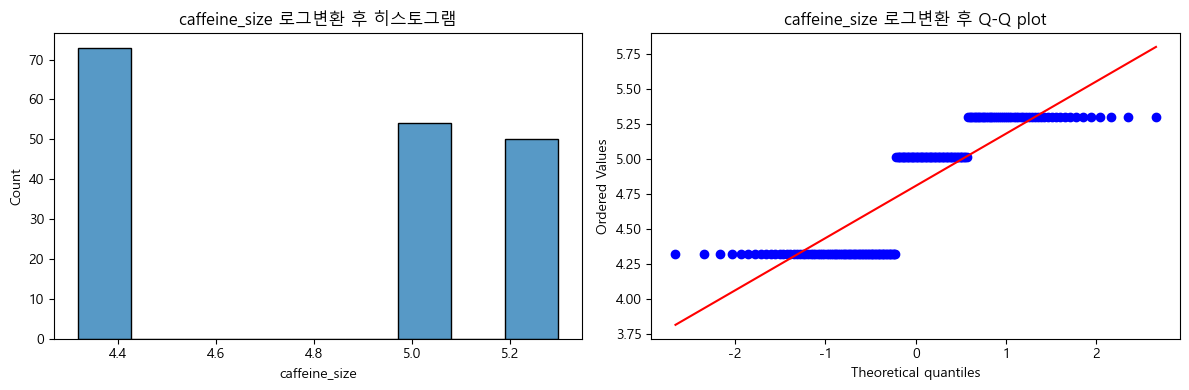


caffeine_flag:
통계량: 37.4328
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


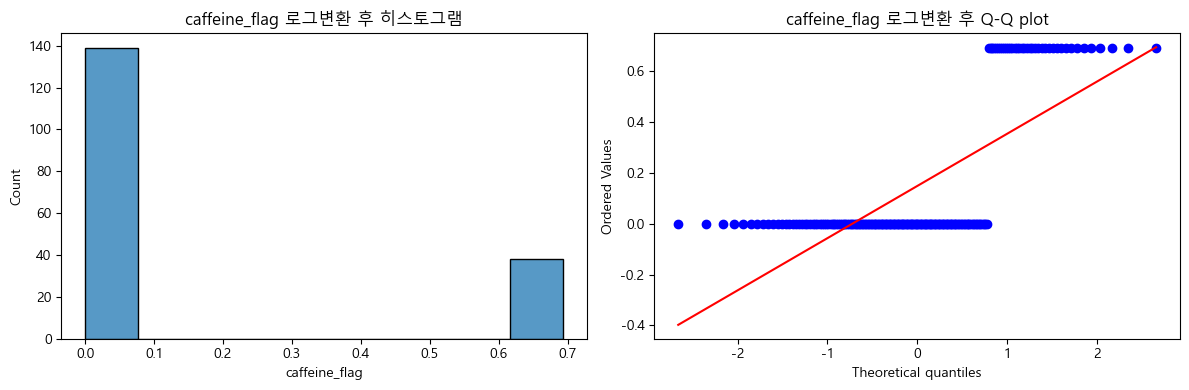


caffeine_elapsed_min:
통계량: 55.9819
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


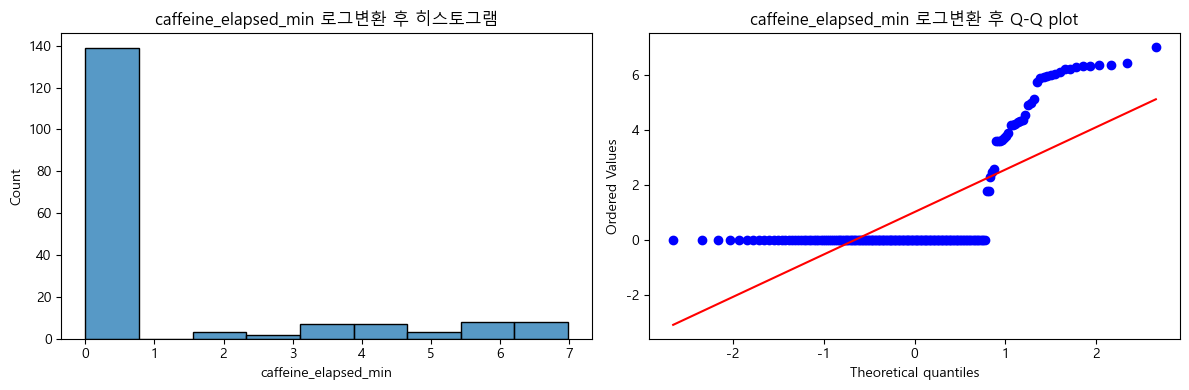


caffeine:
통계량: 38.9167
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


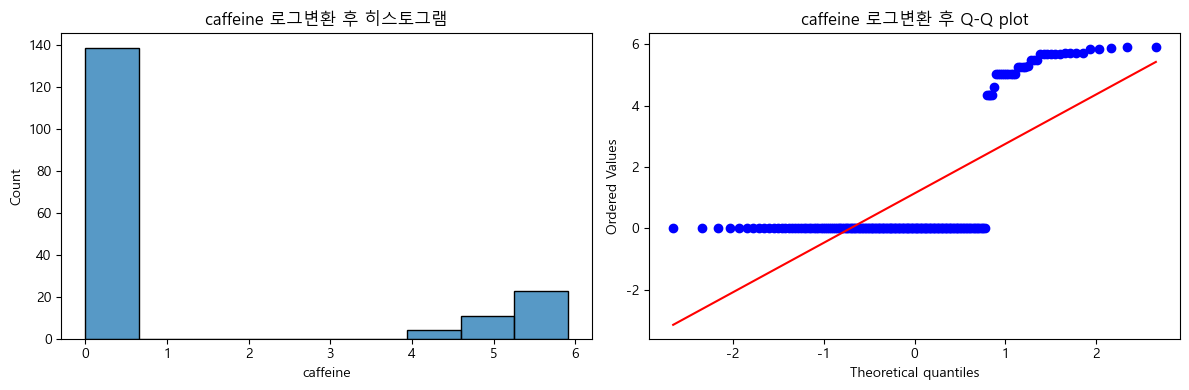


sleep_hours:
통계량: 2.9679
p-value: 0.2267
정규분포 여부: 정규분포를 따름
sleep_hours 컬럼에 로그 변환 적용됨


C:\Users\613ja\AppData\Local\Temp\ipykernel_35184\138836207.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  static_data[col] = static_data_log[col]


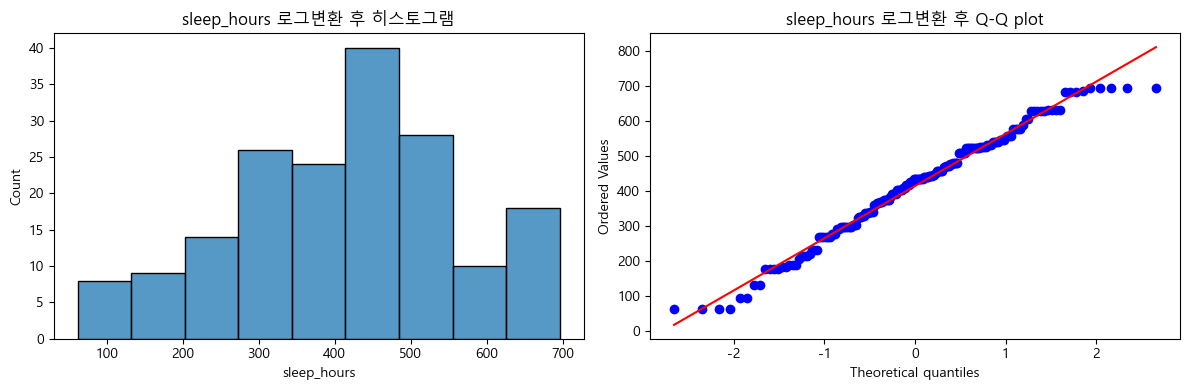


minute_sin:
통계량: 221.5838
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


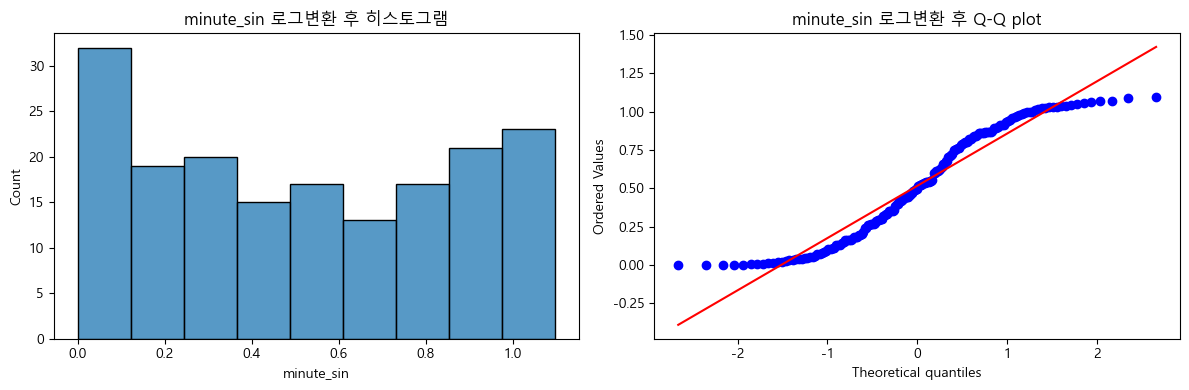


minute_cos:
통계량: 1726.3597
p-value: 0.0000
정규분포 여부: 정규분포를 따르지 않음


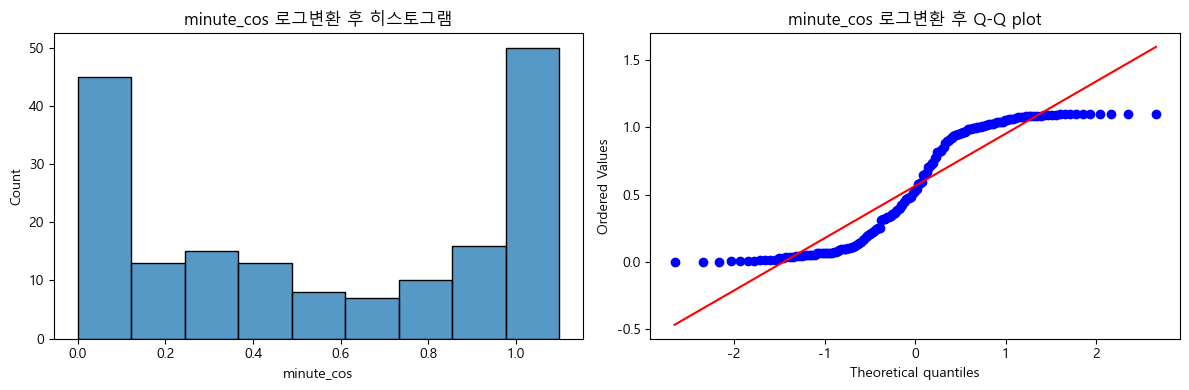

In [17]:
# 정규성 검정을 위한 라이브러리 임포트
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 1. 설치된 폰트 확인
for font in fm.fontManager.ttflist:
    print(font.name)

# 모델 평가

# 예측 (확률 → 예측 클래스)
#pred_probs = model.predict([X_seq_test, X_static_test])
#print(pred_probs)
#pred_labels = (pred_probs > 0.5).astype(int).flatten()
#print(pred_labels)
# 방법 1: 나눔고딕 사용
plt.rcParams['font.family'] = 'NanumGothic'
# 또는
plt.rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕

# 방법 2: 직접 폰트 경로 지정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕
font = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 정적 데이터의 정규성 검정
print("\n=== 정적 데이터 정규성 검정 결과 ===")
for col in static_data.columns:
    stat, p_value = stats.normaltest(static_data[col])
    print(f"\n{col}:")
    print(f"통계량: {stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"정규분포 여부: {'정규분포를 따름' if p_value > 0.05 else '정규분포를 따르지 않음'}")
    
    # 히스토그램과 Q-Q plot 그리기
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # 히스토그램
    sns.histplot(data=static_data[col], ax=ax1)
    ax1.set_title(f'{col} 히스토그램')
    
    # Q-Q plot
    stats.probplot(static_data[col], dist="norm", plot=ax2)
    ax2.set_title(f'{col} Q-Q plot')
    
    plt.tight_layout()
    plt.show()

# target_bins의 정규성 검정
print("\n=== Target 정규성 검정 결과 ===")
stat, p_value = stats.normaltest(target_bins)
print(f"\ntarget_bins:")
print(f"통계량: {stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"정규분포 여부: {'정규분포를 따름' if p_value > 0.05 else '정규분포를 따르지 않음'}")

# target_bins의 히스토그램과 Q-Q plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# 히스토그램
sns.histplot(data=target_bins, ax=ax1)
ax1.set_title('target_bins 히스토그램')

# Q-Q plot
stats.probplot(target_bins, dist="norm", plot=ax2)
ax2.set_title('target_bins Q-Q plot')

plt.tight_layout()
plt.show()

# 로그 변환을 위한 데이터 복사
static_data_log = static_data.copy()

# sleep_hours와 target을 제외한 모든 컬럼에 대해 로그 변환 수행
for col in static_data_log.columns:
    if col not in ['sleep_hours']:
        # 음수값이 있을 수 있으므로 최소값을 1로 이동시킨 후 로그 변환
        min_val = static_data_log[col].min()
        if min_val <= 0:
            static_data_log[col] = np.log(static_data_log[col] - min_val + 1)
        else:
            static_data_log[col] = np.log(static_data_log[col])

# 로그 변환 후 정규성 검정 및 정규분포를 따르는 피쳐만 원본 데이터에 적용
print("\n=== 로그 변환 후 정규성 검정 결과 ===")
for col in static_data_log.columns:
    stat, p_value = stats.normaltest(static_data_log[col])
    print(f"\n{col}:")
    print(f"통계량: {stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"정규분포 여부: {'정규분포를 따름' if p_value > 0.05 else '정규분포를 따르지 않음'}")
    
    # 정규분포를 따르는 경우 원본 데이터에 로그 변환값 적용
    if p_value > 0.05:
        static_data[col] = static_data_log[col]
        print(f"{col} 컬럼에 로그 변환 적용됨")
    
    # 히스토그램과 Q-Q plot 그리기
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # 히스토그램
    sns.histplot(data=static_data_log[col], ax=ax1)
    ax1.set_title(f'{col} 로그변환 후 히스토그램')
    
    # Q-Q plot
    stats.probplot(static_data_log[col], dist="norm", plot=ax2)
    ax2.set_title(f'{col} 로그변환 후 Q-Q plot')
    
    plt.tight_layout()
    plt.show()


In [21]:
#jaeha_static = jaeha_final_cat[['height','weight','sex','age','caffeine_freq','caffeine_size','caffeine_flag','caffeine_elapsed_min','caffeine','sleep_hours']].to_numpy()
#jaeha_static = jaeha_final_clipped[['caffeine','caffeine_elapsed_min','sleep_hours']].to_numpy()
jaeha_static = jaeha_final_cat_multi[static_columns].to_numpy()
jaeha_seq = np.stack([jaeha_HR_series,jaeha_stress_series],axis=-1)
jaeha_y = jaeha_final_cat_multi['stroop_score_cat_multi'].to_numpy()

jiwoo_static = jiwoo_final_cat_multi[static_columns].to_numpy()
jiwoo_seq = np.stack([jiwoo_HR_series,jiwoo_stress_series],axis=-1)
jiwoo_y = jiwoo_final_cat_multi['stroop_score_cat_multi'].to_numpy()

dongho_static = dongho_final_cat_multi[static_columns].to_numpy()
dongho_seq = np.stack([dongho_HR_series,dongho_stress_series],axis=-1)
dongho_y = dongho_final_cat_multi['stroop_score_cat_multi'].to_numpy()

youngjoo_static = youngjoo_final_cat_multi[static_columns].to_numpy()
youngjoo_seq = np.stack([youngjoo_HR_series,youngjoo_stress_series],axis=-1)
youngjoo_y = youngjoo_final_cat_multi['stroop_score_cat_multi'].to_numpy()

#print(jaeha_static.shape)
#print(jaeha_seq.shape)

merged_data_static = merged_data_multi[static_columns].to_numpy()
merged_y = merged_data_multi['stroop_score_cat_multi'].to_numpy

from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint



# 정규화할 static feature
scaler = StandardScaler()
X_static_scaled = scaler.fit_transform(X_static)
jaeha_static_scaled = scaler.fit_transform(jaeha_static)
jiwoo_static_scaled = scaler.fit_transform(jiwoo_static)
dongho_static_scaled = scaler.fit_transform(dongho_static)
youngjoo_static_scaled = scaler.fit_transform(youngjoo_static)
merged_satic_scaled = scaler.fit_transform(merged_data_static)
static_scaled = scaler.fit_transform(static_data.drop(['hr_min','hr_std','str_std','str_max','str_min','height'],axis=1))

from sklearn.model_selection import train_test_split
jaeha_seq_train, jaeha_seq_test, jaeha_static_train, jaeha_static_test, jaeha_y_train, jaeha_y_test = train_test_split((jaeha_seq), (jaeha_static), jaeha_y, test_size=0.2)
jiwoo_seq_train, jiwoo_seq_test, jiwoo_static_train, jiwoo_static_test, jiwoo_y_train, jiwoo_y_test = train_test_split((jiwoo_seq), (jiwoo_static), jiwoo_y, test_size=0.2)
dongho_seq_train, dongho_seq_test, dongho_static_train, dongho_static_test, dongho_y_train, dongho_y_test = train_test_split((dongho_seq), (dongho_static), dongho_y, test_size=0.2)
youngjoo_seq_train, youngjoo_seq_test, youngjoo_static_train, youngjoo_static_test, youngjoo_y_train, youngjoo_y_test = train_test_split((youngjoo_seq), (youngjoo_static), youngjoo_y, test_size=0.2)



X_seq_train, X_seq_test, X_static_train, X_static_test, y_train, y_test = train_test_split(seq_data, static_scaled, target_bins, test_size=0.2)

# 예: y_train이 정수 라벨 (0,1,2,3)
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(jaeha_y_train),
                                                  y=jaeha_y_train)

# dict 형태로 변환
class_weight_dict = dict(enumerate(class_weights))

# 모델 체크포인트 설정
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# StratifiedKFold 설정
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# 성능 지표를 저장할 리스트
accuracies = []
precisions = []
recalls = []
f1_scores = []
histories = []
confusion_matrices = []

# K-fold 교차 검증
for fold, (train_idx, val_idx) in enumerate(skf.split(X_seq, target_bins)):
    print(f'\nFold {fold + 1}/{n_splits}')
    
    # 데이터 분할
    X_seq_train_fold = X_seq[train_idx]
    X_static_train_fold = X_static[train_idx]
    y_train_fold = target_bins[train_idx]
    
    X_seq_val_fold = X_seq[val_idx]
    X_static_val_fold = X_static[val_idx]
    y_val_fold = target_bins[val_idx]
    
    # 모델 체크포인트 설정
    checkpoint_path = f"best_model_fold_{fold+1}.h5"
    model_checkpoint = ModelCheckpoint(checkpoint_path,
                                     monitor='val_loss',
                                     save_best_only=True,
                                     mode='min',
                                     verbose=1)
    
    early_stop = EarlyStopping(monitor='val_loss',
                              patience=50,
                              restore_best_weights=True,
                              verbose=1)
    
    # 모델 학습
    history = model.fit([X_seq_train_fold, X_static_train_fold],
                       y_train_fold,
                       epochs=2000,
                       batch_size=8,
                       validation_data=([X_seq_val_fold, X_static_val_fold], y_val_fold),
                       callbacks=[early_stop, model_checkpoint])
    
    # 최적의 모델 불러오기
    best_model = tf.keras.models.load_model(checkpoint_path)
    
    # 예측
    y_pred = best_model.predict([X_seq_val_fold, X_static_val_fold])
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # 성능 지표 계산

  print(SLP[-8:])

  df = pd.concat((SLP[['Sleep_Time_KST','Duration','Duration_z']],df),axis=1)
  print(df.head())
  plt.figure(figsize=(20, 6))
  # 그래프 그리기
  plt.plot(SLP['Sleep_Time_KST'], SLP['Duration_z'])
print("\n=== 평균 성능 지표 ===")
print(f"Accuracy: {np.mean(accuracies):.4f} (+/- {np.std(accuracies):.4f})")
print(f"Precision: {np.mean(precisions):.4f} (+/- {np.std(precisions):.4f})")
print(f"Recall: {np.mean(recalls):.4f} (+/- {np.std(recalls):.4f})")
print(f"F1-score: {np.mean(f1_scores):.4f} (+/- {np.std(f1_scores):.4f})")

# 평균 confusion matrix 시각화
plt.figure(figsize=(10, 8))
avg_conf_matrix = np.mean(confusion_matrices, axis=0)
sns.heatmap(avg_conf_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.title('Average Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


IndentationError: unexpected indent (944313369.py, line 4)

In [54]:
X_seq.shape

(177, 30, 2)

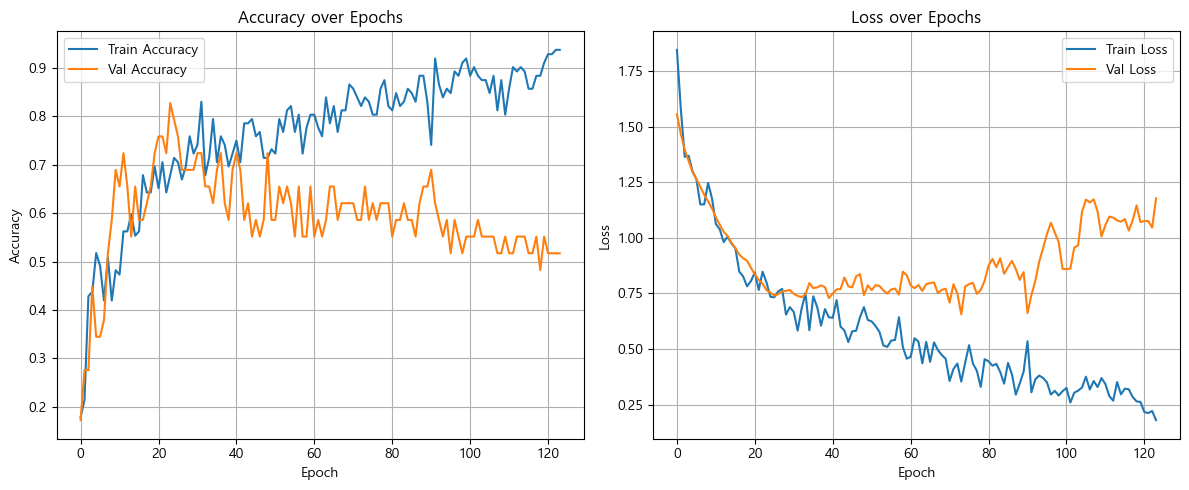

In [55]:
import matplotlib.pyplot as plt

# 히스토리에서 값 추출
val_accuracy = history.history.get('val_accuracy')
val_loss = history.history.get('val_loss')
accuracy = history.history.get('accuracy')
loss = history.history.get('loss')

# 그래프 그리기
plt.figure(figsize=(12, 5))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [56]:
import numpy as np

unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))


{0: 29, 1: 29, 2: 31, 3: 26, 4: 26}


In [57]:
best_model.evaluate([X_seq_test, X_static_test], y_test)
pred_prob = model.predict([X_seq_test, X_static_test])
#pred = (pred_prob > 0.5).astype(int).flatten()
pred = np.argmax(pred_prob,axis=1)
#print(pred_prob)
print(pred)
print(y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8843 - loss: 0.5528 
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 396ms/step
[4 4 3 4 1 0 0 4 4 0 1 3 1 4 0 1 0 2 1 1 3 3 2 3 3 0 3 0 1 4 4 2 3 4 4 4]
128    4
79     4
168    2
131    4
47     1
85     0
51     0
135    4
150    4
103    0
132    1
172    3
43     1
146    4
110    0
69     2
109    0
6      2
56     1
26     1
29     3
145    3
71     3
19     3
91     3
41     0
30     3
32     0
5      1
76     4
18     3
112    2
165    3
2      4
155    4
130    4
Name: target, dtype: int32


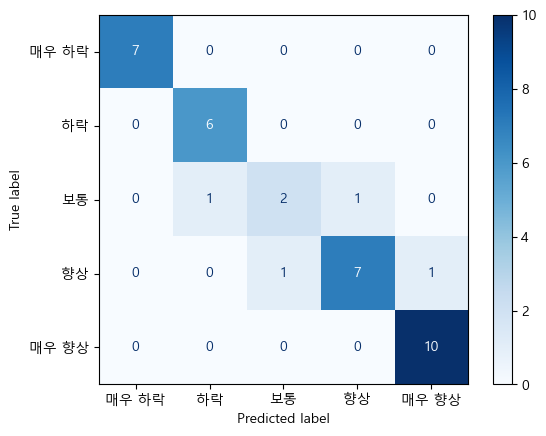

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1. 설치된 폰트 확인
#for font in fm.fontManager.ttflist:
    #print(font.name)

# 모델 평가

# 예측 (확률 → 예측 클래스)
#pred_probs = model.predict([X_seq_test, X_static_test])
#print(pred_probs)
#pred_labels = (pred_probs > 0.5).astype(int).flatten()
#print(pred_labels)
# 방법 1: 나눔고딕 사용
plt.rcParams['font.family'] = 'NanumGothic'
# 또는
plt.rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕

# 방법 2: 직접 폰트 경로 지정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕
font = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False
cm = confusion_matrix(y_test, pred)
labels = ['매우 하락', '하락','보통', '향상', '매우 향상']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.show()


In [62]:
from pycaret.classification import *

clf = setup(data = pd.concat((pd.DataFrame(static_scaled),target_bins),axis=1), target = 'target', session_id=123)

models = compare_models()

In [ ]:
jaeha_final = add_minute_of_day(jaeha_final)
jaeha_final

In [ ]:
from pycaret.regression import *

reg = setup(data = jiwoo_final_cat_multi, target = 'stroop_score', session_id=123)

models = compare_models()

           hr_min     hr_mean      hr_max      hr_std     str_min    str_mean  \
count  177.000000  177.000000  177.000000  177.000000  177.000000  177.000000   
mean    -0.451908    0.781391    0.977585   -1.100938    0.034378    0.452242   
std      0.654630    0.334830    0.353544    0.521435    0.885494    0.731879   
min     -1.666225    0.000000    0.000000   -2.653869   -2.097801   -1.218659   
25%     -0.993309    0.541349    0.690745   -1.429264   -0.980007    0.083235   
50%     -0.533971    0.765298    0.947031   -1.139226    0.321256    0.707633   
75%     -0.014522    1.006648    1.205325   -0.793451    0.708144    0.985209   
max      1.698355    1.676340    1.883340    0.267777    1.293881    1.608089   

          str_max     str_std      height      weight  ...         age  \
count  177.000000  177.000000  177.000000  177.000000  ...  177.000000   
mean     0.904151    0.343043  167.542373   58.666667  ...   21.717514   
std      0.725199    0.271534    5.960062    7.7

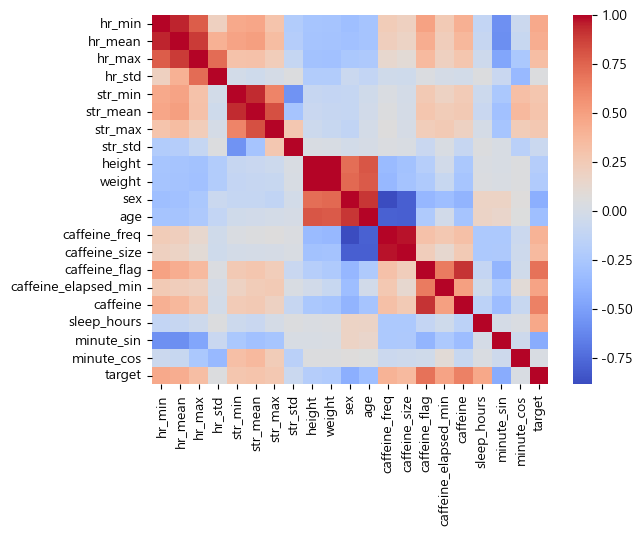

hr_min   hr_mean    hr_max    hr_std   str_min  \
hr_min                1.000000  0.943531  0.772796  0.197968  0.452110   
hr_mean               0.943531  1.000000  0.884754  0.407939  0.480680   
hr_max                0.772796  0.884754  1.000000  0.717522  0.301897   
hr_std                0.197968  0.407939  0.717522  1.000000 -0.016238   
str_min               0.452110  0.480680  0.301897 -0.016238  1.000000   
str_mean              0.465145  0.500090  0.313859 -0.041038  0.928987   
str_max               0.297831  0.340997  0.232877 -0.006431  0.621955   
str_std              -0.212203 -0.194003 -0.098021  0.047497 -0.561033   
height               -0.269499 -0.280641 -0.295097 -0.213542 -0.095410   
weight               -0.279166 -0.287804 -0.302246 -0.208599 -0.110249   
sex                  -0.311028 -0.295936 -0.250560 -0.069839 -0.097849   
age                  -0.278083 -0.276718 -0.235314 -0.112112 -0.033238   
caffeine_freq         0.236115  0.213773  0.137312 -0.033093  0.031219   
caffeine_size         0.199914  0.182081  0.101055 -0.039323 -0.013208   
caffeine_flag         0.485184  0.429676  0.355675  0.036153  0.259939   
caffeine_elapsed_min  0.255964  0.224576  0.198566 -0.005935  0.187271   
caffeine              0.415292  0.371166  0.280922 -0.020298  0.246724   
sleep_hours          -0.114981 -0.095732 -0.046952  0.046915 -0.053888   
minute_sin           -0.578313 -0.583911 -0.471947 -0.076012 -0.246772   
minute_cos           -0.064276 -0.087373 -0.244754 -0.353124  0.328896   
target                0.449211  0.430157  0.335985  0.043287  0.283685   

                      str_mean   str_max   str_std    height    weight  ...  \
hr_min                0.465145  0.297831 -0.212203 -0.269499 -0.279166  ...   
hr_mean               0.500090  0.340997 -0.194003 -0.280641 -0.287804  ...   
hr_max                0.313859  0.232877 -0.098021 -0.295097 -0.302246  ...   
hr_std               -0.041038 -0.006431  0.047497 -0.213542 -0.208599  ...   
str_min               0.928987  0.621955 -0.561033 -0.095410 -0.110249  ...   
str_mean              1.000000  0.816297 -0.277230 -0.075859 -0.093285  ...   
str_max               0.816297  1.000000  0.276309 -0.059021 -0.082599  ...   
str_std              -0.277230  0.276309  1.000000  0.023133  0.018454  ...   
height               -0.075859 -0.059021  0.023133  1.000000  0.995932  ...   
weight               -0.093285 -0.082599  0.018454  0.995932  1.000000  ...   
sex                  -0.102899 -0.121403 -0.022900  0.707761  0.734247  ...   
age                  -0.023799 -0.010668  0.002720  0.796289  0.782770  ...   
caffeine_freq         0.044540  0.064869  0.035625 -0.344070 -0.361107  ...   
caffeine_size        -0.004328  0.002512  0.027111 -0.288317 -0.285592  ...   
caffeine_flag         0.281847  0.231629 -0.078978 -0.191255 -0.222557  ...   
caffeine_elapsed_min  0.236835  0.253089  0.023209 -0.028107 -0.088091  ...   
caffeine              0.260316  0.196937 -0.095396 -0.245673 -0.269685  ...   
sleep_hours          -0.078877 -0.005992  0.046159  0.034904  0.035706  ...   
minute_sin           -0.299056 -0.270247  0.014304  0.017645  0.021856  ...   
minute_cos            0.365130  0.241544 -0.168325  0.044308  0.047808  ...   
target                0.298229  0.267430 -0.074111 -0.199858 -0.220452  ...   

                           age  caffeine_freq  caffeine_size  caffeine_flag  \
hr_min               -0.278083       0.236115       0.199914       0.485184   
hr_mean              -0.276718       0.213773       0.182081       0.429676   
hr_max               -0.235314       0.137312       0.101055       0.355675   
hr_std               -0.112112      -0.033093      -0.039323       0.036153   
str_min              -0.033238       0.031219      -0.013208       0.259939   
str_mean             -0.023799       0.044540      -0.004328       0.281847   
str_max              -0.010668       0.064869       0.002512       0.231629   
str_std               0.

In [39]:
import seaborn as sns

# 상관관계 분석 (숫자형 열들만)
X_static_df = pd.concat([pd.DataFrame(static_data,columns=static_columns),pd.DataFrame(target_bins)],axis=1)
print(X_static_df.describe())
correlation = X_static_df.corr(numeric_only=True)

# 상관관계 출력
sns.heatmap(correlation, cmap='coolwarm')
plt.show()
correlation

In [41]:
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def analyze_groups(df, target_col, alpha=0.05):
    """
    데이터프레임의 각 feature에 대해 target 변수의 그룹 간 ANOVA 및 Tukey HSD 분석을 수행합니다.
    
    Parameters:
    -----------
    df : pandas DataFrame
        분석할 데이터프레임
    target_col : str
        타겟 변수(그룹)의 컬럼명
    alpha : float, optional
        유의수준 (기본값: 0.05)
        
    Returns:
    --------
    dict
        각 feature별 분석 결과를 담은 딕셔너리
    """
    results = {}
    features = [col for col in df.columns if col != target_col]
    
    for feature in features:
        # 각 그룹별 데이터 추출
        groups = [df[feature][df[target_col] == i].values for i in range(len(df[target_col].unique()))]
        
        # one-way ANOVA 수행
        f_stat, p_val = stats.f_oneway(*groups)
        
        # Tukey HSD 검정 수행
        tukey = pairwise_tukeyhsd(endog=df[feature],
                                 groups=df[target_col],
                                 alpha=alpha)
        
        # 각 그룹의 평균과 표준편차 계산
        group_means = [np.mean(group) for group in groups]
        group_stds = [np.std(group) for group in groups]
        
        results[feature] = {
            'f_statistic': f_stat,
            'p_value': p_val,
            'group_means': group_means,
            'group_stds': group_stds,
            'tukey': tukey
        }

        # 결과 출력
        print(f"\n=== {feature} 분석 결과 ===")
        print(f"F-통계량: {f_stat:.4f}")
        print(f"p-값: {p_val:.4f}")
        
        print("\n그룹별 평균 (표준편차):")
        for i, (mean, std) in enumerate(zip(group_means, group_stds)):
            print(f"그룹 {i}: {mean:.4f} ({std:.4f})")
        
        print("\nTukey HSD 결과:")
        print(tukey)
        
        if p_val < alpha:
            print(f"\n*** 이 변수는 {target_col} 그룹 간 통계적으로 유의한 차이가 있습니다 ***")
        print("\n" + "="*50)
    
    return results

# 사용 예시:
# results = analyze_groups(X_static_df, 'stroop_score_cat_multi')

In [42]:
analyze_groups(X_static_df, 'target')


=== hr_min 분석 결과 ===
F-통계량: 13.3121
p-값: 0.0000

그룹별 평균 (표준편차):
그룹 0: -0.7522 (0.4764)
그룹 1: -0.6955 (0.5691)
그룹 2: -0.5526 (0.6380)
그룹 3: -0.3935 (0.5876)
그룹 4: 0.1263 (0.5714)

Tukey HSD 결과:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.0567 0.9939  -0.322 0.4354  False
     0      2   0.1995 0.5946 -0.1792 0.5782  False
     0      3   0.3587 0.0728   -0.02 0.7374  False
     0      4   0.8784    0.0  0.5024 1.2544   True
     1      2   0.1428   0.84 -0.2385 0.5242  False
     1      3    0.302 0.1911 -0.0794 0.6833  False
     1      4   0.8217    0.0   0.443 1.2004   True
     2      3   0.1591 0.7793 -0.2222 0.5405  False
     2      4   0.6789    0.0  0.3002 1.0576   True
     3      4   0.5198  0.002  0.1411 0.8985   True
---------------------------------------------------

*** 이 변수는 target 그룹 간 통계적으로 유의한 차이가 있습니다 ***


=== hr_mean 분석 결과 ===
F-통계량: 1

{'hr_min': {'f_statistic': 13.312136554279423,
  'p_value': 1.8009932576371865e-09,
  'group_means': [-0.7521641657407371,
   -0.6954521801764311,
   -0.5526263761379848,
   -0.3934955658355279,
   0.12625922856054686],
  'group_stds': [0.4764193376574284,
   0.5691088569663848,
   0.6379617836515514,
   0.5876214404104314,
   0.5714461973006569],
  'tukey': <statsmodels.sandbox.stats.multicomp.TukeyHSDResults at 0x17582d79060>},
 'hr_mean': {'f_statistic': 11.3421625394002,
  'p_value': 3.420698852354981e-08,
  'group_means': [0.6394875212304794,
   0.6518528435985577,
   0.7136189838287603,
   0.8564209850308451,
   1.0421760210769442],
  'group_stds': [0.2730411494319698,
   0.30008184896017026,
   0.36049839786172366,
   0.26904817213179427,
   0.27363697431345785],
  'tukey': <statsmodels.sandbox.stats.multicomp.TukeyHSDResults at 0x175835c4490>},
 'hr_max': {'f_statistic': 6.895331195282556,
  'p_value': 3.590990697768205e-05,
  'group_means': [0.870354929046057,
   0.87748847216

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [ ]:
merged['accuracy'] = (merged['Rights_1']+merged['Rights_2'])/60
merged['time_taken'] = ((merged['Max_time_1']+merged['Max_time_2'])/2 - (merged['Avg_time_1']+merged['Avg_time_2'])/2) / ((merged['Max_time_1']+merged['Max_time_2'])/2 - (merged['Min_time_1']+merged['Min_time_2'])/2)
#merged['time_taken'] = 1/((merged['Avg_time_1']+merged['Avg_time_2'])/2)
X = merged[['accuracy','time_taken']]
y = merged['bpm']

# 신경망 모델 정의
model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu'))  # 입력: 정확도와 소모시간
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # 출력: 심박수

# 모델 컴파일
model.compile(optimizer=Adam(), loss='mse')

# 모델 학습
model.fit(X, y, epochs=300, batch_size=32, validation_split=0.2)


In [ ]:
# 학습된 가중치 추출
weights = model.get_weights()

# 첫 번째 Dense 레이어의 가중치 (정확도와 소모시간에 대한 가중치)
layer_1_weights = weights[0]  # (2, 64) 크기
layer_1_bias = weights[1]  # (64,) 크기

# 첫 번째 Dense 레이어에서 정확도와 소모시간에 대한 가중치 추출
accuracy_weight = layer_1_weights[0, 0]  # 정확도에 대한 가중치
time_weight = layer_1_weights[1, 0]  # 소모시간에 대한 가중치

print(f'정확도에 대한 가중치: {accuracy_weight}')
print(f'소모시간에 대한 가중치: {time_weight}')
